In [4]:
import shap
from sklearn.neural_network import MLPClassifier
import numpy as np
def print_accuracy(f, X, y):
    accuracy = 100*np.sum(f(X) == y)/len(y)
    print("Accuracy = {0}%".format(accuracy))
    return accuracy

In [5]:
num_normal = np.arange(0, 15, 1)
num_overwhelmed = [3]*len(num_normal)
num_shortcut = [1, 2, 3]
num_shortcut = np.repeat(np.array(num_shortcut), 5)

In [6]:
import shap
from sklearn.neural_network import MLPClassifier
from FeaturePoison import insert_feature_noise

In [7]:
X, y = shap.datasets.iris()
stg_results = {
    '# features': [],
    "accuracy": []
}

In [8]:
from stg import STG
for t in range(10):
    accs = []
    for i in range(len(num_normal)): 
        X_train, X_test, Y_train, Y_test = insert_feature_noise(X, y, num_random_noise=num_normal[i],
            num_overwhelemed=num_overwhelmed[i], num_shortcut=num_shortcut[i])
        X_train = X_train.to_numpy().astype(np.float32)
        X_test = X_test.to_numpy().astype(np.float32)
        clf = STG(task_type='classification',
                input_dim=X_train.shape[1],
                output_dim=3,
                hidden_dims=(16, 16),
                activation='ReLU', optimizer='SGD', learning_rate=0.1,
                batch_size=X_train.shape[0], feature_selection=True, 
                sigma=0.5, lam=0.1, random_state=1, device="cpu")
        clf.fit(X_train, Y_train, nr_epochs=1000,
            print_interval=100, 
            valid_X=X_test, 
            valid_y=Y_test)
        acc = print_accuracy(clf.predict, X_test, Y_test)
        stg_results["accuracy"].append(acc)
        total_feature = 2*num_normal[i] + num_overwhelmed[i] + num_shortcut[i]
        stg_results['# features'].append(total_feature)
        num_gate = np.count_nonzero(clf.get_gates(mode='prob'))
        print(f"{acc}%, {num_gate}/{total_feature + 4} features")


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 100: loss=1.133566 valid_loss=1.085879
Epoch: 200: loss=0.765084 valid_loss=0.677843
Epoch: 300: loss=0.363273 valid_loss=0.269407
Epoch: 400: loss=0.261523 valid_loss=0.121529
Epoch: 500: loss=0.191832 valid_loss=0.074987
Epoch: 600: loss=0.400192 valid_loss=0.088916
Epoch: 700: loss=0.152795 valid_loss=0.047971
Epoch: 800: loss=0.154857 valid_loss=0.050353
Epoch: 900: loss=0.137464 valid_loss=0.034855
Epoch: 1000: loss=0.131917 valid_loss=0.031622
Accuracy = 100.0%
100.0%, 5/8 features
Epoch: 100: loss=1.176074 valid_loss=1.119501



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 200: loss=1.170214 valid_loss=1.111194
Epoch: 300: loss=0.998562 valid_loss=0.998719
Epoch: 400: loss=0.523353 valid_loss=0.579712
Epoch: 500: loss=0.310882 valid_loss=0.321728
Epoch: 600: loss=0.246531 valid_loss=0.167505
Epoch: 700: loss=0.191787 valid_loss=0.141882
Epoch: 800: loss=0.175927 valid_loss=0.101692
Epoch: 900: loss=0.189078 valid_loss=0.119423
Epoch: 1000: loss=0.156575 valid_loss=0.068605
Accuracy = 100.0%
100.0%, 8/10 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 100: loss=1.158779 valid_loss=1.111201
Epoch: 200: loss=0.964535 valid_loss=0.949152
Epoch: 300: loss=0.512112 valid_loss=0.513560
Epoch: 400: loss=0.383921 valid_loss=0.254993
Epoch: 500: loss=0.259825 valid_loss=0.253071
Epoch: 600: loss=0.193670 valid_loss=0.128653
Epoch: 700: loss=0.199495 valid_loss=0.099764
Epoch: 800: loss=0.162096 valid_loss=0.079187
Epoch: 900: loss=0.156504 valid_loss=0.071846
Epoch: 1000: loss=0.151670 valid_loss=0.063647
Accuracy = 100.0%
100.0%, 12/12 features
Epoch: 100: loss=1.177913 valid_loss=1.119025
Epoch: 200: loss=1.131998 valid_loss=1.087696



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 300: loss=0.628811 valid_loss=0.619433
Epoch: 400: loss=0.417981 valid_loss=0.377064
Epoch: 500: loss=0.284442 valid_loss=0.220847
Epoch: 600: loss=0.212726 valid_loss=0.136172
Epoch: 700: loss=0.182384 valid_loss=0.106939
Epoch: 800: loss=0.169524 valid_loss=0.085205
Epoch: 900: loss=0.166900 valid_loss=0.078400
Epoch: 1000: loss=0.182481 valid_loss=0.093633
Accuracy = 100.0%
100.0%, 14/14 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 100: loss=1.147425 valid_loss=1.088701
Epoch: 200: loss=0.600021 valid_loss=0.598437
Epoch: 300: loss=0.444577 valid_loss=0.294937
Epoch: 400: loss=0.250380 valid_loss=0.194738
Epoch: 500: loss=0.208651 valid_loss=0.125236
Epoch: 600: loss=0.192829 valid_loss=0.089159
Epoch: 700: loss=0.163230 valid_loss=0.077077
Epoch: 800: loss=0.159120 valid_loss=0.068253
Epoch: 900: loss=0.164673 valid_loss=0.070367
Epoch: 1000: loss=0.155772 valid_loss=0.055227
Accuracy = 100.0%
100.0%, 16/16 features
Epoch: 100: loss=1.169481 valid_loss=1.102681
Epoch: 200: loss=0.769365 valid_loss=0.758566



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 300: loss=0.381866 valid_loss=0.295065
Epoch: 400: loss=0.230322 valid_loss=0.174832
Epoch: 500: loss=0.257380 valid_loss=0.127879
Epoch: 600: loss=0.231503 valid_loss=0.083673
Epoch: 700: loss=0.166629 valid_loss=0.062984
Epoch: 800: loss=0.206171 valid_loss=0.091044
Epoch: 900: loss=0.162621 valid_loss=0.051034
Epoch: 1000: loss=0.157165 valid_loss=0.049504
Accuracy = 96.66666666666667%
96.66666666666667%, 19/19 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 100: loss=1.089987 valid_loss=1.054755
Epoch: 200: loss=0.619358 valid_loss=0.552077
Epoch: 300: loss=0.347305 valid_loss=0.496141
Epoch: 400: loss=0.400260 valid_loss=0.401208
Epoch: 500: loss=0.205967 valid_loss=0.109310
Epoch: 600: loss=0.172228 valid_loss=0.102420
Epoch: 700: loss=0.152602 valid_loss=0.070264
Epoch: 800: loss=0.149959 valid_loss=0.056604
Epoch: 900: loss=0.123287 valid_loss=0.050780
Epoch: 1000: loss=0.113677 valid_loss=0.044653
Accuracy = 100.0%
100.0%, 21/21 features
Epoch: 100: loss=1.177386 valid_loss=1.118917
Epoch: 200: loss=1.164655 valid_loss=1.112162



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 300: loss=1.020325 valid_loss=0.974296
Epoch: 400: loss=0.481447 valid_loss=0.599078
Epoch: 500: loss=0.293896 valid_loss=0.263769
Epoch: 600: loss=0.240918 valid_loss=0.138779
Epoch: 700: loss=0.176457 valid_loss=0.109593
Epoch: 800: loss=0.170387 valid_loss=0.093931
Epoch: 900: loss=0.158907 valid_loss=0.072621
Epoch: 1000: loss=0.196556 valid_loss=0.070183
Accuracy = 96.66666666666667%
96.66666666666667%, 23/23 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 100: loss=1.173985 valid_loss=1.115159
Epoch: 200: loss=1.156203 valid_loss=1.066777
Epoch: 300: loss=0.578520 valid_loss=0.645041
Epoch: 400: loss=0.325339 valid_loss=0.229454
Epoch: 500: loss=0.259215 valid_loss=0.305543
Epoch: 600: loss=0.234433 valid_loss=0.265007
Epoch: 700: loss=0.165104 valid_loss=0.117380
Epoch: 800: loss=0.162411 valid_loss=0.087292
Epoch: 900: loss=0.148134 valid_loss=0.060065
Epoch: 1000: loss=0.143200 valid_loss=0.059674
Accuracy = 96.66666666666667%
96.66666666666667%, 25/25 features
Epoch: 100: loss=1.147725 valid_loss=1.103868
Epoch: 200: loss=0.798400 valid_loss=0.820311



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 300: loss=0.425967 valid_loss=0.405856
Epoch: 400: loss=0.490233 valid_loss=0.240464
Epoch: 500: loss=0.211959 valid_loss=0.182419
Epoch: 600: loss=0.202313 valid_loss=0.148844
Epoch: 700: loss=0.183114 valid_loss=0.111080
Epoch: 800: loss=0.163924 valid_loss=0.092996
Epoch: 900: loss=0.166435 valid_loss=0.095743
Epoch: 1000: loss=0.171313 valid_loss=0.071445
Accuracy = 96.66666666666667%
96.66666666666667%, 27/27 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 100: loss=1.168273 valid_loss=1.100886
Epoch: 200: loss=0.774567 valid_loss=0.709750
Epoch: 300: loss=0.401700 valid_loss=0.365463
Epoch: 400: loss=0.227414 valid_loss=0.184477
Epoch: 500: loss=0.229155 valid_loss=0.147816
Epoch: 600: loss=0.221326 valid_loss=0.077347
Epoch: 700: loss=0.151725 valid_loss=0.070266
Epoch: 800: loss=0.219923 valid_loss=0.089771
Epoch: 900: loss=0.138178 valid_loss=0.054921
Epoch: 1000: loss=0.126896 valid_loss=0.045226
Accuracy = 100.0%
100.0%, 30/30 features
Epoch: 100: loss=1.166536 valid_loss=1.103501
Epoch: 200: loss=0.917752 valid_loss=0.842867



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 300: loss=0.513960 valid_loss=0.413880
Epoch: 400: loss=0.335211 valid_loss=0.428129
Epoch: 500: loss=0.262340 valid_loss=0.207472
Epoch: 600: loss=0.221976 valid_loss=0.125725
Epoch: 700: loss=0.181173 valid_loss=0.128018
Epoch: 800: loss=0.156133 valid_loss=0.103475
Epoch: 900: loss=0.169962 valid_loss=0.108895
Epoch: 1000: loss=0.279127 valid_loss=0.133212
Accuracy = 93.33333333333333%
93.33333333333333%, 32/32 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 100: loss=1.168101 valid_loss=1.110348
Epoch: 200: loss=0.831717 valid_loss=0.815111
Epoch: 300: loss=0.387099 valid_loss=0.309647
Epoch: 400: loss=0.261859 valid_loss=0.158610
Epoch: 500: loss=0.334300 valid_loss=0.575675
Epoch: 600: loss=0.246232 valid_loss=0.101257
Epoch: 700: loss=0.163640 valid_loss=0.070939
Epoch: 800: loss=0.162369 valid_loss=0.061161
Epoch: 900: loss=0.151043 valid_loss=0.052368
Epoch: 1000: loss=0.152221 valid_loss=0.073838
Accuracy = 96.66666666666667%
96.66666666666667%, 34/34 features
Epoch: 100: loss=1.160808 valid_loss=1.113113
Epoch: 200: loss=1.089078 valid_loss=0.959416



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 300: loss=0.588829 valid_loss=0.590830
Epoch: 400: loss=0.469029 valid_loss=0.489878
Epoch: 500: loss=0.375248 valid_loss=0.364958
Epoch: 600: loss=0.307939 valid_loss=0.263737
Epoch: 700: loss=0.231513 valid_loss=0.222531
Epoch: 800: loss=0.214039 valid_loss=0.137845
Epoch: 900: loss=0.532264 valid_loss=0.152213
Epoch: 1000: loss=0.194960 valid_loss=0.120117
Accuracy = 100.0%
100.0%, 36/36 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 100: loss=1.155871 valid_loss=1.111439
Epoch: 200: loss=1.064121 valid_loss=0.912503
Epoch: 300: loss=0.415162 valid_loss=0.433704
Epoch: 400: loss=0.266339 valid_loss=0.199397
Epoch: 500: loss=0.360661 valid_loss=0.431531
Epoch: 600: loss=0.191903 valid_loss=0.127900
Epoch: 700: loss=0.173551 valid_loss=0.105225
Epoch: 800: loss=0.163907 valid_loss=0.181052
Epoch: 900: loss=0.199313 valid_loss=0.111589
Epoch: 1000: loss=0.149905 valid_loss=0.083614
Accuracy = 96.66666666666667%
96.66666666666667%, 38/38 features
Epoch: 100: loss=1.168460 valid_loss=1.114314
Epoch: 200: loss=1.054796 valid_loss=1.019567



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 300: loss=0.550914 valid_loss=0.541234
Epoch: 400: loss=0.427523 valid_loss=0.371536
Epoch: 500: loss=0.301384 valid_loss=0.252974
Epoch: 600: loss=0.232565 valid_loss=0.164380
Epoch: 700: loss=0.177722 valid_loss=0.095275
Epoch: 800: loss=0.215150 valid_loss=0.081899
Epoch: 900: loss=0.148586 valid_loss=0.053672
Epoch: 1000: loss=0.148586 valid_loss=0.046522
Accuracy = 100.0%
100.0%, 5/8 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 100: loss=1.140759 valid_loss=1.094593
Epoch: 200: loss=1.085443 valid_loss=0.769926
Epoch: 300: loss=0.378230 valid_loss=0.390275
Epoch: 400: loss=0.255654 valid_loss=0.161614
Epoch: 500: loss=0.207842 valid_loss=0.112246
Epoch: 600: loss=0.170954 valid_loss=0.091882
Epoch: 700: loss=0.162254 valid_loss=0.079529
Epoch: 800: loss=0.151933 valid_loss=0.062425
Epoch: 900: loss=0.154895 valid_loss=0.072779
Epoch: 1000: loss=0.142812 valid_loss=0.057905
Accuracy = 96.66666666666667%
96.66666666666667%, 7/10 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 100: loss=1.151526 valid_loss=1.107347
Epoch: 200: loss=0.812484 valid_loss=0.848366
Epoch: 300: loss=0.544964 valid_loss=0.540719
Epoch: 400: loss=0.407892 valid_loss=0.412458
Epoch: 500: loss=0.354194 valid_loss=0.344002
Epoch: 600: loss=0.233024 valid_loss=0.262877
Epoch: 700: loss=0.194552 valid_loss=0.139425
Epoch: 800: loss=0.175725 valid_loss=0.107502
Epoch: 900: loss=0.169941 valid_loss=0.090710
Epoch: 1000: loss=0.158304 valid_loss=0.082107
Accuracy = 96.66666666666667%
96.66666666666667%, 10/12 features
Epoch: 100: loss=1.162916 valid_loss=1.113326
Epoch: 200: loss=0.987188 valid_loss=0.993838



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 300: loss=0.487048 valid_loss=0.472704
Epoch: 400: loss=0.492197 valid_loss=0.300865
Epoch: 500: loss=0.228633 valid_loss=0.190638
Epoch: 600: loss=0.200662 valid_loss=0.134298
Epoch: 700: loss=0.189169 valid_loss=0.102513
Epoch: 800: loss=0.174070 valid_loss=0.090688
Epoch: 900: loss=0.162677 valid_loss=0.068895
Epoch: 1000: loss=0.143224 valid_loss=0.060601
Accuracy = 100.0%
100.0%, 14/14 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 100: loss=1.174480 valid_loss=1.117647
Epoch: 200: loss=1.132812 valid_loss=1.087208
Epoch: 300: loss=0.640548 valid_loss=0.626665
Epoch: 400: loss=0.386679 valid_loss=0.331832
Epoch: 500: loss=0.310611 valid_loss=0.324615
Epoch: 600: loss=0.217221 valid_loss=0.121792
Epoch: 700: loss=0.175037 valid_loss=0.090972
Epoch: 800: loss=0.157548 valid_loss=0.071122
Epoch: 900: loss=0.147728 valid_loss=0.057723
Epoch: 1000: loss=0.150402 valid_loss=0.057054
Accuracy = 96.66666666666667%
96.66666666666667%, 16/16 features
Epoch: 100: loss=1.178042 valid_loss=1.117188
Epoch: 200: loss=1.144259 valid_loss=1.079513



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 300: loss=0.526874 valid_loss=0.522141
Epoch: 400: loss=0.295868 valid_loss=0.222173
Epoch: 500: loss=0.281875 valid_loss=0.135526
Epoch: 600: loss=0.181700 valid_loss=0.111474
Epoch: 700: loss=0.168111 valid_loss=0.100178
Epoch: 800: loss=0.155908 valid_loss=0.115365
Epoch: 900: loss=0.163635 valid_loss=0.095633
Epoch: 1000: loss=0.156912 valid_loss=0.097197
Accuracy = 93.33333333333333%
93.33333333333333%, 19/19 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 100: loss=1.165159 valid_loss=1.106201
Epoch: 200: loss=0.885885 valid_loss=0.861220
Epoch: 300: loss=0.719242 valid_loss=0.430113
Epoch: 400: loss=0.299382 valid_loss=0.281358
Epoch: 500: loss=0.368944 valid_loss=0.221106
Epoch: 600: loss=0.239474 valid_loss=0.139665
Epoch: 700: loss=0.151897 valid_loss=0.101792
Epoch: 800: loss=0.162018 valid_loss=0.072650
Epoch: 900: loss=0.180092 valid_loss=0.059283
Epoch: 1000: loss=0.132930 valid_loss=0.051916
Accuracy = 100.0%
100.0%, 21/21 features
Epoch: 100: loss=1.177635 valid_loss=1.117648
Epoch: 200: loss=1.158254 valid_loss=1.093801



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 300: loss=0.680596 valid_loss=0.709671
Epoch: 400: loss=0.360059 valid_loss=0.320843
Epoch: 500: loss=0.251362 valid_loss=0.171108
Epoch: 600: loss=0.206552 valid_loss=0.122199
Epoch: 700: loss=0.187871 valid_loss=0.106940
Epoch: 800: loss=0.180297 valid_loss=0.098852
Epoch: 900: loss=0.147299 valid_loss=0.056286
Epoch: 1000: loss=0.146514 valid_loss=0.049764
Accuracy = 100.0%
100.0%, 23/23 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 100: loss=1.171301 valid_loss=1.115871
Epoch: 200: loss=1.019820 valid_loss=1.039240
Epoch: 300: loss=0.598783 valid_loss=0.577039
Epoch: 400: loss=0.301609 valid_loss=0.292071
Epoch: 500: loss=0.338012 valid_loss=0.177707
Epoch: 600: loss=0.275050 valid_loss=0.206523
Epoch: 700: loss=0.181821 valid_loss=0.143446
Epoch: 800: loss=0.159709 valid_loss=0.111375
Epoch: 900: loss=0.142635 valid_loss=0.098282
Epoch: 1000: loss=0.137293 valid_loss=0.085924
Accuracy = 96.66666666666667%
96.66666666666667%, 25/25 features
Epoch: 100: loss=1.157407 valid_loss=1.110065
Epoch: 200: loss=0.820560 valid_loss=0.859947



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 300: loss=0.470923 valid_loss=0.390778
Epoch: 400: loss=0.283094 valid_loss=0.179580
Epoch: 500: loss=0.220726 valid_loss=0.127029
Epoch: 600: loss=0.308987 valid_loss=0.156881
Epoch: 700: loss=0.237094 valid_loss=0.066916
Epoch: 800: loss=0.156508 valid_loss=0.049181
Epoch: 900: loss=0.151264 valid_loss=0.039476
Epoch: 1000: loss=0.138685 valid_loss=0.033028
Accuracy = 100.0%
100.0%, 27/27 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 100: loss=1.145285 valid_loss=1.108354
Epoch: 200: loss=0.811239 valid_loss=0.937957
Epoch: 300: loss=0.400165 valid_loss=0.367892
Epoch: 400: loss=0.269000 valid_loss=0.297562
Epoch: 500: loss=0.207905 valid_loss=0.181133
Epoch: 600: loss=0.179058 valid_loss=0.165546
Epoch: 700: loss=0.186420 valid_loss=0.196482
Epoch: 800: loss=0.139616 valid_loss=0.155934
Epoch: 900: loss=0.158161 valid_loss=0.148566
Epoch: 1000: loss=0.133755 valid_loss=0.154865
Accuracy = 96.66666666666667%
96.66666666666667%, 30/30 features
Epoch: 100: loss=1.175438 valid_loss=1.119621
Epoch: 200: loss=1.159335 valid_loss=1.102214



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 300: loss=0.725989 valid_loss=0.720517
Epoch: 400: loss=0.383303 valid_loss=0.428618
Epoch: 500: loss=0.236105 valid_loss=0.209099
Epoch: 600: loss=0.264553 valid_loss=0.182835
Epoch: 700: loss=0.161462 valid_loss=0.105768
Epoch: 800: loss=0.142459 valid_loss=0.078152
Epoch: 900: loss=0.138074 valid_loss=0.071285
Epoch: 1000: loss=0.194874 valid_loss=0.072969
Accuracy = 96.66666666666667%
96.66666666666667%, 32/32 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 100: loss=1.155883 valid_loss=1.105669
Epoch: 200: loss=0.833033 valid_loss=0.849676
Epoch: 300: loss=0.466553 valid_loss=0.364617
Epoch: 400: loss=0.252893 valid_loss=0.232040
Epoch: 500: loss=0.219813 valid_loss=0.196149
Epoch: 600: loss=0.281722 valid_loss=0.199067
Epoch: 700: loss=0.160071 valid_loss=0.119123
Epoch: 800: loss=0.150021 valid_loss=0.099550
Epoch: 900: loss=0.155787 valid_loss=0.153400
Epoch: 1000: loss=0.151036 valid_loss=0.076297
Accuracy = 96.66666666666667%
96.66666666666667%, 34/34 features
Epoch: 100: loss=1.169994 valid_loss=1.113849



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 200: loss=0.943081 valid_loss=0.933863
Epoch: 300: loss=0.681099 valid_loss=0.671732
Epoch: 400: loss=0.393129 valid_loss=0.393888
Epoch: 500: loss=0.270883 valid_loss=0.261246
Epoch: 600: loss=0.238617 valid_loss=0.250416
Epoch: 700: loss=0.406583 valid_loss=1.528657
Epoch: 800: loss=0.179065 valid_loss=0.111191
Epoch: 900: loss=0.160839 valid_loss=0.080808
Epoch: 1000: loss=0.164395 valid_loss=0.067478
Accuracy = 100.0%
100.0%, 36/36 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 100: loss=1.161787 valid_loss=1.116936
Epoch: 200: loss=0.970109 valid_loss=1.007610
Epoch: 300: loss=0.471740 valid_loss=0.487776
Epoch: 400: loss=0.338038 valid_loss=0.411033
Epoch: 500: loss=0.254501 valid_loss=0.185871
Epoch: 600: loss=0.174173 valid_loss=0.185803
Epoch: 700: loss=2.779272 valid_loss=0.543373
Epoch: 800: loss=0.149998 valid_loss=0.123180
Epoch: 900: loss=0.160750 valid_loss=0.138846
Epoch: 1000: loss=0.129019 valid_loss=0.116643
Accuracy = 96.66666666666667%
96.66666666666667%, 38/38 features
Epoch: 100: loss=1.145519 valid_loss=1.099855
Epoch: 200: loss=0.858913 valid_loss=0.712071



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 300: loss=0.383766 valid_loss=0.270660
Epoch: 400: loss=0.220921 valid_loss=0.123802
Epoch: 500: loss=0.212366 valid_loss=0.069763
Epoch: 600: loss=0.164130 valid_loss=0.051567
Epoch: 700: loss=0.146957 valid_loss=0.042178
Epoch: 800: loss=0.139858 valid_loss=0.036532
Epoch: 900: loss=0.132635 valid_loss=0.031100
Epoch: 1000: loss=0.134798 valid_loss=0.030298
Accuracy = 100.0%
100.0%, 5/8 features
Epoch: 100: loss=1.175901 valid_loss=1.111486



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 200: loss=1.022286 valid_loss=0.997354
Epoch: 300: loss=0.569333 valid_loss=0.794108
Epoch: 400: loss=0.356707 valid_loss=0.383097
Epoch: 500: loss=0.247775 valid_loss=0.265405
Epoch: 600: loss=0.201241 valid_loss=0.139778
Epoch: 700: loss=0.189758 valid_loss=0.096809
Epoch: 800: loss=0.176962 valid_loss=0.077097
Epoch: 900: loss=0.159805 valid_loss=0.063513
Epoch: 1000: loss=0.153508 valid_loss=0.058863
Accuracy = 96.66666666666667%
96.66666666666667%, 7/10 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 100: loss=1.169076 valid_loss=1.098238
Epoch: 200: loss=0.805125 valid_loss=0.765565
Epoch: 300: loss=0.469745 valid_loss=0.445086
Epoch: 400: loss=0.272773 valid_loss=0.260575
Epoch: 500: loss=0.632887 valid_loss=0.142391
Epoch: 600: loss=0.187395 valid_loss=0.102575
Epoch: 700: loss=0.171082 valid_loss=0.093616
Epoch: 800: loss=0.156222 valid_loss=0.076816
Epoch: 900: loss=0.146779 valid_loss=0.062444
Epoch: 1000: loss=0.139662 valid_loss=0.069187
Accuracy = 96.66666666666667%
96.66666666666667%, 9/12 features
Epoch: 100: loss=1.159857 valid_loss=1.100164
Epoch: 200: loss=0.858784 valid_loss=0.814138



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 300: loss=0.791825 valid_loss=0.584190
Epoch: 400: loss=0.320180 valid_loss=0.254841
Epoch: 500: loss=0.234145 valid_loss=0.158408
Epoch: 600: loss=0.197233 valid_loss=0.123955
Epoch: 700: loss=0.176579 valid_loss=0.127174
Epoch: 800: loss=0.167430 valid_loss=0.071609
Epoch: 900: loss=0.152602 valid_loss=0.059388
Epoch: 1000: loss=0.150842 valid_loss=0.054307
Accuracy = 100.0%
100.0%, 12/14 features
Epoch: 100: loss=1.173049 valid_loss=1.116072



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 200: loss=1.104517 valid_loss=1.070833
Epoch: 300: loss=1.344929 valid_loss=0.853841
Epoch: 400: loss=0.357086 valid_loss=0.304401
Epoch: 500: loss=0.271696 valid_loss=0.277835
Epoch: 600: loss=0.221444 valid_loss=0.112729
Epoch: 700: loss=0.180053 valid_loss=0.095865
Epoch: 800: loss=0.214915 valid_loss=0.096437
Epoch: 900: loss=0.158336 valid_loss=0.071108
Epoch: 1000: loss=0.153704 valid_loss=0.081298
Accuracy = 100.0%
100.0%, 16/16 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 100: loss=1.144358 valid_loss=1.063775
Epoch: 200: loss=0.490576 valid_loss=0.475711
Epoch: 300: loss=0.404494 valid_loss=0.248225
Epoch: 400: loss=0.214025 valid_loss=0.191748
Epoch: 500: loss=0.181857 valid_loss=0.101166
Epoch: 600: loss=0.205327 valid_loss=0.090228
Epoch: 700: loss=0.177179 valid_loss=0.079643
Epoch: 800: loss=0.166506 valid_loss=0.068242
Epoch: 900: loss=0.165486 valid_loss=0.072840
Epoch: 1000: loss=0.164503 valid_loss=0.068499
Accuracy = 96.66666666666667%
96.66666666666667%, 19/19 features
Epoch: 100: loss=1.149670 valid_loss=1.094493
Epoch: 200: loss=0.658442 valid_loss=0.637326



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 300: loss=0.384992 valid_loss=0.308144
Epoch: 400: loss=0.314831 valid_loss=0.388797
Epoch: 500: loss=0.218324 valid_loss=0.134859
Epoch: 600: loss=0.251666 valid_loss=0.247270
Epoch: 700: loss=0.173374 valid_loss=0.103536
Epoch: 800: loss=0.171099 valid_loss=0.085260
Epoch: 900: loss=0.164163 valid_loss=0.063260
Epoch: 1000: loss=0.155398 valid_loss=0.062492
Accuracy = 96.66666666666667%
96.66666666666667%, 21/21 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 100: loss=1.175623 valid_loss=1.117975
Epoch: 200: loss=1.142852 valid_loss=1.097504
Epoch: 300: loss=0.784272 valid_loss=0.711203
Epoch: 400: loss=0.337129 valid_loss=0.304644
Epoch: 500: loss=0.222139 valid_loss=0.201522
Epoch: 600: loss=0.180334 valid_loss=0.137944
Epoch: 700: loss=0.163312 valid_loss=0.134686
Epoch: 800: loss=0.148208 valid_loss=0.114386
Epoch: 900: loss=0.168651 valid_loss=0.149499
Epoch: 1000: loss=0.128330 valid_loss=0.144943
Accuracy = 93.33333333333333%
93.33333333333333%, 23/23 features
Epoch: 100: loss=1.174574 valid_loss=1.104240
Epoch: 200: loss=1.032436 valid_loss=0.929375



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 300: loss=0.548592 valid_loss=0.623348
Epoch: 400: loss=0.298206 valid_loss=0.209373
Epoch: 500: loss=0.207607 valid_loss=0.170990
Epoch: 600: loss=0.212713 valid_loss=0.089510
Epoch: 700: loss=0.170828 valid_loss=0.079343
Epoch: 800: loss=0.140118 valid_loss=0.061390
Epoch: 900: loss=0.208475 valid_loss=0.127944
Epoch: 1000: loss=0.131364 valid_loss=0.046779
Accuracy = 96.66666666666667%
96.66666666666667%, 25/25 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 100: loss=1.170233 valid_loss=1.111609
Epoch: 200: loss=1.064563 valid_loss=1.052043
Epoch: 300: loss=0.588803 valid_loss=0.525663
Epoch: 400: loss=0.270532 valid_loss=0.207735
Epoch: 500: loss=0.210869 valid_loss=0.131097
Epoch: 600: loss=0.189825 valid_loss=0.088404
Epoch: 700: loss=0.170282 valid_loss=0.085232
Epoch: 800: loss=0.157557 valid_loss=0.063241
Epoch: 900: loss=0.155914 valid_loss=0.084786
Epoch: 1000: loss=0.154227 valid_loss=0.042013
Accuracy = 100.0%
100.0%, 27/27 features
Epoch: 100: loss=1.158770 valid_loss=1.091496
Epoch: 200: loss=0.730337 valid_loss=0.667463



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 300: loss=0.659412 valid_loss=0.268557
Epoch: 400: loss=0.234822 valid_loss=0.160814
Epoch: 500: loss=0.202985 valid_loss=0.176868
Epoch: 600: loss=0.302094 valid_loss=0.134404
Epoch: 700: loss=0.168704 valid_loss=0.087557
Epoch: 800: loss=0.168492 valid_loss=0.105658
Epoch: 900: loss=0.154979 valid_loss=0.050505
Epoch: 1000: loss=0.182775 valid_loss=0.097276
Accuracy = 93.33333333333333%
93.33333333333333%, 30/30 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 100: loss=1.163057 valid_loss=1.108203
Epoch: 200: loss=0.907687 valid_loss=0.777971
Epoch: 300: loss=0.464949 valid_loss=0.445237
Epoch: 400: loss=0.338909 valid_loss=0.215623
Epoch: 500: loss=0.389995 valid_loss=0.420227
Epoch: 600: loss=0.203024 valid_loss=0.117082
Epoch: 700: loss=0.176116 valid_loss=0.144585
Epoch: 800: loss=0.414423 valid_loss=0.135884
Epoch: 900: loss=0.153192 valid_loss=0.085628
Epoch: 1000: loss=0.135883 valid_loss=0.070575
Accuracy = 100.0%
100.0%, 32/32 features
Epoch: 100: loss=1.128385 valid_loss=1.083242
Epoch: 200: loss=0.620247 valid_loss=0.670252



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 300: loss=0.374769 valid_loss=0.254015
Epoch: 400: loss=0.222023 valid_loss=0.157518
Epoch: 500: loss=0.231122 valid_loss=0.120857
Epoch: 600: loss=0.174244 valid_loss=0.131771
Epoch: 700: loss=0.159653 valid_loss=0.090885
Epoch: 800: loss=0.170986 valid_loss=0.070249
Epoch: 900: loss=0.189470 valid_loss=0.067340
Epoch: 1000: loss=0.148655 valid_loss=0.065754
Accuracy = 96.66666666666667%
96.66666666666667%, 34/34 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 100: loss=1.176625 valid_loss=1.119598
Epoch: 200: loss=1.156091 valid_loss=1.108404
Epoch: 300: loss=1.001483 valid_loss=0.893944
Epoch: 400: loss=0.608928 valid_loss=0.549114
Epoch: 500: loss=0.259485 valid_loss=0.203621
Epoch: 600: loss=0.254941 valid_loss=0.099135
Epoch: 700: loss=0.177955 valid_loss=0.086155
Epoch: 800: loss=0.198165 valid_loss=0.068365
Epoch: 900: loss=0.339283 valid_loss=0.187567
Epoch: 1000: loss=0.131046 valid_loss=0.044045
Accuracy = 100.0%
100.0%, 36/36 features
Epoch: 100: loss=1.157938 valid_loss=1.117591
Epoch: 200: loss=0.871410 valid_loss=0.898765



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 300: loss=0.772611 valid_loss=0.556232
Epoch: 400: loss=0.538601 valid_loss=0.512279
Epoch: 500: loss=0.213435 valid_loss=0.200490
Epoch: 600: loss=0.218794 valid_loss=0.164756
Epoch: 700: loss=0.202412 valid_loss=0.094011
Epoch: 800: loss=0.149444 valid_loss=0.090412
Epoch: 900: loss=0.147614 valid_loss=0.103068
Epoch: 1000: loss=0.153388 valid_loss=0.067574
Accuracy = 100.0%
100.0%, 38/38 features
Epoch: 100: loss=1.155798 valid_loss=1.077180



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 200: loss=0.626665 valid_loss=0.596707
Epoch: 300: loss=0.380425 valid_loss=0.286258
Epoch: 400: loss=0.236058 valid_loss=0.151198
Epoch: 500: loss=0.199511 valid_loss=0.081203
Epoch: 600: loss=0.175946 valid_loss=0.061195
Epoch: 700: loss=0.147242 valid_loss=0.041869
Epoch: 800: loss=0.139366 valid_loss=0.035082
Epoch: 900: loss=0.133648 valid_loss=0.031098
Epoch: 1000: loss=0.131206 valid_loss=0.032078
Accuracy = 100.0%
100.0%, 5/8 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 100: loss=1.170919 valid_loss=1.118602
Epoch: 200: loss=1.128275 valid_loss=1.083337
Epoch: 300: loss=0.678708 valid_loss=0.689971
Epoch: 400: loss=0.514694 valid_loss=0.468947
Epoch: 500: loss=0.284133 valid_loss=0.239305
Epoch: 600: loss=0.255193 valid_loss=0.169375
Epoch: 700: loss=0.214255 valid_loss=0.114507
Epoch: 800: loss=0.174092 valid_loss=0.094880
Epoch: 900: loss=0.162875 valid_loss=0.082835
Epoch: 1000: loss=0.159418 valid_loss=0.074926
Accuracy = 96.66666666666667%
96.66666666666667%, 6/10 features
Epoch: 100: loss=1.154752 valid_loss=1.099419
Epoch: 200: loss=0.894300 valid_loss=0.842219



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 300: loss=0.432703 valid_loss=0.482066
Epoch: 400: loss=0.290658 valid_loss=0.394762
Epoch: 500: loss=0.247825 valid_loss=0.244638
Epoch: 600: loss=0.180476 valid_loss=0.101061
Epoch: 700: loss=0.201297 valid_loss=0.083218
Epoch: 800: loss=0.163521 valid_loss=0.063303
Epoch: 900: loss=0.156498 valid_loss=0.065135
Epoch: 1000: loss=0.289065 valid_loss=0.237962
Accuracy = 83.33333333333333%
83.33333333333333%, 12/12 features
Epoch: 100: loss=1.155702 valid_loss=1.102076



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 200: loss=0.809896 valid_loss=0.813112
Epoch: 300: loss=0.434604 valid_loss=0.405519
Epoch: 400: loss=0.312101 valid_loss=0.314709
Epoch: 500: loss=0.227199 valid_loss=0.185899
Epoch: 600: loss=0.201097 valid_loss=0.116284
Epoch: 700: loss=0.170134 valid_loss=0.096731
Epoch: 800: loss=0.163444 valid_loss=0.077664
Epoch: 900: loss=0.157780 valid_loss=0.069728
Epoch: 1000: loss=0.157062 valid_loss=0.065439
Accuracy = 100.0%
100.0%, 14/14 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 100: loss=1.172916 valid_loss=1.115698
Epoch: 200: loss=1.127623 valid_loss=1.069232
Epoch: 300: loss=0.628992 valid_loss=0.628163
Epoch: 400: loss=0.366201 valid_loss=0.327816
Epoch: 500: loss=0.266603 valid_loss=0.227222
Epoch: 600: loss=0.285972 valid_loss=0.152259
Epoch: 700: loss=0.201961 valid_loss=0.185449
Epoch: 800: loss=0.177710 valid_loss=0.176309
Epoch: 900: loss=0.168310 valid_loss=0.098708
Epoch: 1000: loss=0.176357 valid_loss=0.095388
Accuracy = 100.0%
100.0%, 16/16 features
Epoch: 100: loss=1.175164 valid_loss=1.117345
Epoch: 200: loss=1.143646 valid_loss=1.095926



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 300: loss=0.646224 valid_loss=0.757652
Epoch: 400: loss=0.527812 valid_loss=0.325373
Epoch: 500: loss=0.281283 valid_loss=0.257738
Epoch: 600: loss=0.194473 valid_loss=0.120889
Epoch: 700: loss=0.204492 valid_loss=0.103368
Epoch: 800: loss=0.243612 valid_loss=0.087767
Epoch: 900: loss=0.190833 valid_loss=0.161281
Epoch: 1000: loss=0.141079 valid_loss=0.088870
Accuracy = 96.66666666666667%
96.66666666666667%, 19/19 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 100: loss=1.111741 valid_loss=1.068678
Epoch: 200: loss=0.620881 valid_loss=0.620620
Epoch: 300: loss=0.540084 valid_loss=0.500810
Epoch: 400: loss=0.255303 valid_loss=0.183959
Epoch: 500: loss=0.221983 valid_loss=0.153187
Epoch: 600: loss=0.191982 valid_loss=0.119637
Epoch: 700: loss=0.200073 valid_loss=0.117804
Epoch: 800: loss=0.145038 valid_loss=0.079723
Epoch: 900: loss=0.226068 valid_loss=0.119607
Epoch: 1000: loss=0.135192 valid_loss=0.058717
Accuracy = 96.66666666666667%
96.66666666666667%, 21/21 features
Epoch: 100: loss=1.167295 valid_loss=1.119829
Epoch: 200: loss=1.040520 valid_loss=1.023070



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 300: loss=0.555422 valid_loss=0.515472
Epoch: 400: loss=0.418843 valid_loss=0.368818
Epoch: 500: loss=0.243921 valid_loss=0.193199
Epoch: 600: loss=0.196791 valid_loss=0.190172
Epoch: 700: loss=0.173174 valid_loss=0.111239
Epoch: 800: loss=0.183612 valid_loss=0.158217
Epoch: 900: loss=0.180454 valid_loss=0.083933
Epoch: 1000: loss=0.197676 valid_loss=0.068150
Accuracy = 100.0%
100.0%, 23/23 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 100: loss=1.168936 valid_loss=1.109411
Epoch: 200: loss=0.949435 valid_loss=0.961112
Epoch: 300: loss=0.596508 valid_loss=0.351698
Epoch: 400: loss=0.279351 valid_loss=0.214689
Epoch: 500: loss=0.211274 valid_loss=0.133369
Epoch: 600: loss=0.170179 valid_loss=0.153439
Epoch: 700: loss=0.202155 valid_loss=0.097696
Epoch: 800: loss=0.165818 valid_loss=0.098272
Epoch: 900: loss=0.157240 valid_loss=0.064770
Epoch: 1000: loss=0.201155 valid_loss=0.101874
Accuracy = 93.33333333333333%
93.33333333333333%, 25/25 features
Epoch: 100: loss=1.178831 valid_loss=1.116351
Epoch: 200: loss=1.102180 valid_loss=1.064675



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 300: loss=0.528866 valid_loss=0.484498
Epoch: 400: loss=0.326534 valid_loss=0.311135
Epoch: 500: loss=0.223439 valid_loss=0.166147
Epoch: 600: loss=0.214904 valid_loss=0.117540
Epoch: 700: loss=0.208710 valid_loss=0.104948
Epoch: 800: loss=0.209931 valid_loss=0.123238
Epoch: 900: loss=0.152454 valid_loss=0.060848
Epoch: 1000: loss=0.146720 valid_loss=0.072423
Accuracy = 93.33333333333333%
93.33333333333333%, 27/27 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 100: loss=1.150423 valid_loss=1.103983
Epoch: 200: loss=0.977069 valid_loss=0.916176
Epoch: 300: loss=0.724662 valid_loss=0.621752
Epoch: 400: loss=0.390476 valid_loss=0.317910
Epoch: 500: loss=0.237164 valid_loss=0.154257
Epoch: 600: loss=0.210018 valid_loss=0.105974
Epoch: 700: loss=0.160466 valid_loss=0.072908
Epoch: 800: loss=0.172242 valid_loss=0.056864
Epoch: 900: loss=0.160423 valid_loss=0.051766
Epoch: 1000: loss=0.143846 valid_loss=0.045518
Accuracy = 100.0%
100.0%, 30/30 features
Epoch: 100: loss=1.175759 valid_loss=1.115436
Epoch: 200: loss=1.121286 valid_loss=1.070904



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 300: loss=0.575575 valid_loss=0.581539
Epoch: 400: loss=0.354264 valid_loss=0.326972
Epoch: 500: loss=0.251974 valid_loss=0.214179
Epoch: 600: loss=0.190821 valid_loss=0.131466
Epoch: 700: loss=0.180150 valid_loss=0.100585
Epoch: 800: loss=0.468320 valid_loss=0.105448
Epoch: 900: loss=0.148794 valid_loss=0.080568
Epoch: 1000: loss=0.210477 valid_loss=0.078220
Accuracy = 100.0%
100.0%, 32/32 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 100: loss=1.133748 valid_loss=1.092751
Epoch: 200: loss=0.920839 valid_loss=0.746179
Epoch: 300: loss=0.409861 valid_loss=0.321662
Epoch: 400: loss=0.249781 valid_loss=0.261538
Epoch: 500: loss=0.234575 valid_loss=0.155973
Epoch: 600: loss=0.184981 valid_loss=0.156889
Epoch: 700: loss=0.203409 valid_loss=0.077499
Epoch: 800: loss=0.197209 valid_loss=0.117682
Epoch: 900: loss=0.462363 valid_loss=0.117159
Epoch: 1000: loss=0.159706 valid_loss=0.072279
Accuracy = 96.66666666666667%
96.66666666666667%, 34/34 features
Epoch: 100: loss=1.178563 valid_loss=1.121212
Epoch: 200: loss=1.169752 valid_loss=1.116745



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 300: loss=1.096519 valid_loss=1.077808
Epoch: 400: loss=0.659820 valid_loss=0.654174
Epoch: 500: loss=0.311643 valid_loss=0.279349
Epoch: 600: loss=0.221461 valid_loss=0.153515
Epoch: 700: loss=0.184576 valid_loss=0.119503
Epoch: 800: loss=0.160008 valid_loss=0.139332
Epoch: 900: loss=0.148938 valid_loss=0.125617
Epoch: 1000: loss=0.132100 valid_loss=0.066212
Accuracy = 100.0%
100.0%, 36/36 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 100: loss=1.173319 valid_loss=1.112012
Epoch: 200: loss=1.114748 valid_loss=1.047597
Epoch: 300: loss=0.618648 valid_loss=0.561935
Epoch: 400: loss=0.535785 valid_loss=0.374968
Epoch: 500: loss=0.224481 valid_loss=0.193584
Epoch: 600: loss=0.235806 valid_loss=0.182835
Epoch: 700: loss=0.173830 valid_loss=0.088734
Epoch: 800: loss=0.164977 valid_loss=0.054893
Epoch: 900: loss=0.171444 valid_loss=0.069163
Epoch: 1000: loss=0.197741 valid_loss=0.049732
Accuracy = 100.0%
100.0%, 38/38 features
Epoch: 100: loss=1.156661 valid_loss=1.102123
Epoch: 200: loss=0.717753 valid_loss=0.720493



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 300: loss=0.380097 valid_loss=0.369952
Epoch: 400: loss=0.238353 valid_loss=0.158957
Epoch: 500: loss=0.185934 valid_loss=0.087875
Epoch: 600: loss=0.165506 valid_loss=0.064947
Epoch: 700: loss=0.152668 valid_loss=0.049294
Epoch: 800: loss=0.141896 valid_loss=0.040070
Epoch: 900: loss=0.149691 valid_loss=0.043038
Epoch: 1000: loss=0.130417 valid_loss=0.035230
Accuracy = 96.66666666666667%
96.66666666666667%, 5/8 features
Epoch: 100: loss=1.171834 valid_loss=1.109001



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 200: loss=0.946983 valid_loss=0.943580
Epoch: 300: loss=0.537101 valid_loss=0.661629
Epoch: 400: loss=0.394717 valid_loss=0.645782
Epoch: 500: loss=0.280509 valid_loss=0.229874
Epoch: 600: loss=0.233065 valid_loss=0.168315
Epoch: 700: loss=0.196382 valid_loss=0.137188
Epoch: 800: loss=0.189409 valid_loss=0.118198
Epoch: 900: loss=0.162008 valid_loss=0.105885
Epoch: 1000: loss=0.163286 valid_loss=0.096420
Accuracy = 100.0%
100.0%, 6/10 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 100: loss=1.172078 valid_loss=1.111642
Epoch: 200: loss=0.958119 valid_loss=0.946740
Epoch: 300: loss=0.460886 valid_loss=0.519025
Epoch: 400: loss=0.304855 valid_loss=0.265718
Epoch: 500: loss=0.220820 valid_loss=0.156884
Epoch: 600: loss=0.187643 valid_loss=0.104408
Epoch: 700: loss=0.171793 valid_loss=0.086915
Epoch: 800: loss=0.158931 valid_loss=0.076131
Epoch: 900: loss=0.154897 valid_loss=0.069858
Epoch: 1000: loss=0.149343 valid_loss=0.072126
Accuracy = 96.66666666666667%
96.66666666666667%, 11/12 features
Epoch: 100: loss=1.175903 valid_loss=1.118286
Epoch: 200: loss=1.140754 valid_loss=1.104624



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 300: loss=0.861436 valid_loss=0.796978
Epoch: 400: loss=0.439938 valid_loss=0.431614
Epoch: 500: loss=0.334906 valid_loss=0.219193
Epoch: 600: loss=0.218216 valid_loss=0.151060
Epoch: 700: loss=0.191894 valid_loss=0.114881
Epoch: 800: loss=0.231776 valid_loss=0.123350
Epoch: 900: loss=0.176743 valid_loss=0.108925
Epoch: 1000: loss=0.140922 valid_loss=0.067793
Accuracy = 96.66666666666667%
96.66666666666667%, 13/14 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 100: loss=1.173945 valid_loss=1.118814
Epoch: 200: loss=1.115992 valid_loss=1.089341
Epoch: 300: loss=0.792251 valid_loss=0.731933
Epoch: 400: loss=0.491708 valid_loss=0.497940
Epoch: 500: loss=0.367699 valid_loss=0.326579
Epoch: 600: loss=0.264735 valid_loss=0.236861
Epoch: 700: loss=0.237146 valid_loss=0.152885
Epoch: 800: loss=0.186374 valid_loss=0.111228
Epoch: 900: loss=0.161576 valid_loss=0.096334
Epoch: 1000: loss=0.170393 valid_loss=0.103488
Accuracy = 100.0%
100.0%, 16/16 features
Epoch: 100: loss=1.151380 valid_loss=1.038268
Epoch: 200: loss=0.806154 valid_loss=0.507234



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 300: loss=0.274649 valid_loss=0.196811
Epoch: 400: loss=0.349750 valid_loss=0.511156
Epoch: 500: loss=0.182258 valid_loss=0.093590
Epoch: 600: loss=0.184625 valid_loss=0.092422
Epoch: 700: loss=0.146606 valid_loss=0.075141
Epoch: 800: loss=0.145424 valid_loss=0.098625
Epoch: 900: loss=0.162423 valid_loss=0.064102
Epoch: 1000: loss=0.129399 valid_loss=0.066707
Accuracy = 96.66666666666667%
96.66666666666667%, 19/19 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 100: loss=1.173427 valid_loss=1.108269
Epoch: 200: loss=1.010252 valid_loss=0.893976
Epoch: 300: loss=0.496130 valid_loss=0.407696
Epoch: 400: loss=0.420934 valid_loss=0.361429
Epoch: 500: loss=0.269116 valid_loss=0.174397
Epoch: 600: loss=0.208872 valid_loss=0.107616
Epoch: 700: loss=0.195898 valid_loss=0.119492
Epoch: 800: loss=0.227460 valid_loss=0.084817
Epoch: 900: loss=0.161088 valid_loss=0.073484
Epoch: 1000: loss=0.149097 valid_loss=0.045984
Accuracy = 100.0%
100.0%, 21/21 features
Epoch: 100: loss=1.175478 valid_loss=1.116547
Epoch: 200: loss=1.159062 valid_loss=1.094490



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 300: loss=0.788139 valid_loss=0.702376
Epoch: 400: loss=0.363694 valid_loss=0.296236
Epoch: 500: loss=0.225843 valid_loss=0.235999
Epoch: 600: loss=0.225556 valid_loss=0.183561
Epoch: 700: loss=0.256018 valid_loss=0.148696
Epoch: 800: loss=0.153829 valid_loss=0.071908
Epoch: 900: loss=0.143729 valid_loss=0.058715
Epoch: 1000: loss=0.153446 valid_loss=0.069233
Accuracy = 96.66666666666667%
96.66666666666667%, 23/23 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 100: loss=1.158837 valid_loss=1.102251
Epoch: 200: loss=0.820101 valid_loss=0.800102
Epoch: 300: loss=0.535873 valid_loss=0.563189
Epoch: 400: loss=0.392018 valid_loss=0.387656
Epoch: 500: loss=0.320067 valid_loss=0.329156
Epoch: 600: loss=0.242466 valid_loss=0.143809
Epoch: 700: loss=0.220985 valid_loss=0.123583
Epoch: 800: loss=0.222540 valid_loss=0.097513
Epoch: 900: loss=0.152362 valid_loss=0.081583
Epoch: 1000: loss=0.180849 valid_loss=0.073780
Accuracy = 96.66666666666667%
96.66666666666667%, 25/25 features
Epoch: 100: loss=1.177298 valid_loss=1.121768
Epoch: 200: loss=1.156210 valid_loss=1.112478



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 300: loss=0.986723 valid_loss=0.952080
Epoch: 400: loss=0.530261 valid_loss=0.364168
Epoch: 500: loss=0.295839 valid_loss=0.209687
Epoch: 600: loss=0.262462 valid_loss=0.160117
Epoch: 700: loss=0.238149 valid_loss=0.106906
Epoch: 800: loss=0.170573 valid_loss=0.100023
Epoch: 900: loss=0.221082 valid_loss=0.090287
Epoch: 1000: loss=0.178051 valid_loss=0.151591
Accuracy = 93.33333333333333%
93.33333333333333%, 27/27 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 100: loss=1.162887 valid_loss=1.113845
Epoch: 200: loss=0.970345 valid_loss=0.990311
Epoch: 300: loss=0.668548 valid_loss=0.646187
Epoch: 400: loss=0.368126 valid_loss=0.370912
Epoch: 500: loss=0.318238 valid_loss=0.201771
Epoch: 600: loss=0.302359 valid_loss=0.190076
Epoch: 700: loss=0.188931 valid_loss=0.132694
Epoch: 800: loss=0.188442 valid_loss=0.102936
Epoch: 900: loss=0.163169 valid_loss=0.090878
Epoch: 1000: loss=0.159177 valid_loss=0.088238
Accuracy = 100.0%
100.0%, 30/30 features
Epoch: 100: loss=1.155893 valid_loss=1.111026



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 200: loss=0.861386 valid_loss=0.829025
Epoch: 300: loss=0.385127 valid_loss=0.391946
Epoch: 400: loss=0.348830 valid_loss=0.258134
Epoch: 500: loss=0.196407 valid_loss=0.128100
Epoch: 600: loss=0.195747 valid_loss=0.132675
Epoch: 700: loss=0.237448 valid_loss=0.127234
Epoch: 800: loss=0.146471 valid_loss=0.064496
Epoch: 900: loss=0.131083 valid_loss=0.053024
Epoch: 1000: loss=0.194153 valid_loss=0.043460
Accuracy = 100.0%
100.0%, 32/32 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 100: loss=1.146258 valid_loss=1.110140
Epoch: 200: loss=0.830068 valid_loss=0.833943
Epoch: 300: loss=0.444983 valid_loss=0.452097
Epoch: 400: loss=0.277765 valid_loss=0.267241
Epoch: 500: loss=0.245808 valid_loss=0.201657
Epoch: 600: loss=0.188771 valid_loss=0.218006
Epoch: 700: loss=0.181506 valid_loss=0.157371
Epoch: 800: loss=0.155367 valid_loss=0.144491
Epoch: 900: loss=0.154998 valid_loss=0.146917
Epoch: 1000: loss=0.158699 valid_loss=0.151467
Accuracy = 90.0%
90.0%, 34/34 features
Epoch: 100: loss=1.131627 valid_loss=1.074313



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 200: loss=0.673956 valid_loss=0.544133
Epoch: 300: loss=0.379055 valid_loss=0.434023
Epoch: 400: loss=0.259251 valid_loss=0.299727
Epoch: 500: loss=0.170677 valid_loss=0.137195
Epoch: 600: loss=0.162855 valid_loss=0.112950
Epoch: 700: loss=0.195406 valid_loss=0.086154
Epoch: 800: loss=0.128615 valid_loss=0.058769
Epoch: 900: loss=0.131465 valid_loss=0.059292
Epoch: 1000: loss=0.127898 valid_loss=0.057829
Accuracy = 100.0%
100.0%, 36/36 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 100: loss=1.169200 valid_loss=1.113927
Epoch: 200: loss=1.038036 valid_loss=1.007386
Epoch: 300: loss=0.497895 valid_loss=0.491182
Epoch: 400: loss=0.305726 valid_loss=0.450753
Epoch: 500: loss=0.260472 valid_loss=0.189392
Epoch: 600: loss=0.202430 valid_loss=0.130862
Epoch: 700: loss=0.186393 valid_loss=0.123997
Epoch: 800: loss=0.165508 valid_loss=0.083365
Epoch: 900: loss=0.148202 valid_loss=0.071402
Epoch: 1000: loss=0.150006 valid_loss=0.090377
Accuracy = 96.66666666666667%
96.66666666666667%, 38/38 features
Epoch: 100: loss=1.129566 valid_loss=1.079098
Epoch: 200: loss=0.772151 valid_loss=0.576054



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 300: loss=0.411824 valid_loss=0.276597
Epoch: 400: loss=0.219518 valid_loss=0.113328
Epoch: 500: loss=0.406797 valid_loss=0.071394
Epoch: 600: loss=0.162105 valid_loss=0.050558
Epoch: 700: loss=0.154832 valid_loss=0.045161
Epoch: 800: loss=0.145787 valid_loss=0.034744
Epoch: 900: loss=0.141222 valid_loss=0.031056
Epoch: 1000: loss=0.145092 valid_loss=0.027747
Accuracy = 100.0%
100.0%, 5/8 features
Epoch: 100: loss=1.142182 valid_loss=1.085624



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 200: loss=0.644626 valid_loss=0.659481
Epoch: 300: loss=0.394006 valid_loss=0.332238
Epoch: 400: loss=0.322205 valid_loss=0.205662
Epoch: 500: loss=0.197501 valid_loss=0.154735
Epoch: 600: loss=0.174837 valid_loss=0.094640
Epoch: 700: loss=0.183379 valid_loss=0.083693
Epoch: 800: loss=0.156040 valid_loss=0.069962
Epoch: 900: loss=0.172672 valid_loss=0.070651
Epoch: 1000: loss=0.156214 valid_loss=0.066031
Accuracy = 96.66666666666667%
96.66666666666667%, 7/10 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 100: loss=1.175689 valid_loss=1.080812
Epoch: 200: loss=0.699834 valid_loss=0.629894
Epoch: 300: loss=0.351387 valid_loss=0.343572
Epoch: 400: loss=0.262974 valid_loss=0.192028
Epoch: 500: loss=0.278971 valid_loss=0.206376
Epoch: 600: loss=0.170562 valid_loss=0.083532
Epoch: 700: loss=0.161126 valid_loss=0.069321
Epoch: 800: loss=0.292615 valid_loss=0.137348
Epoch: 900: loss=0.152128 valid_loss=0.054150
Epoch: 1000: loss=0.137319 valid_loss=0.044491
Accuracy = 100.0%
100.0%, 11/12 features
Epoch: 100: loss=1.169773 valid_loss=1.112282
Epoch: 200: loss=1.056988 valid_loss=1.009485



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 300: loss=0.482529 valid_loss=0.458936
Epoch: 400: loss=0.352564 valid_loss=0.315358
Epoch: 500: loss=0.512219 valid_loss=0.782363
Epoch: 600: loss=0.219845 valid_loss=0.168028
Epoch: 700: loss=0.203987 valid_loss=0.091438
Epoch: 800: loss=0.168262 valid_loss=0.072997
Epoch: 900: loss=0.152036 valid_loss=0.061872
Epoch: 1000: loss=0.197584 valid_loss=0.080022
Accuracy = 96.66666666666667%
96.66666666666667%, 14/14 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 100: loss=1.160978 valid_loss=1.095844
Epoch: 200: loss=0.771791 valid_loss=0.751201
Epoch: 300: loss=0.553564 valid_loss=0.482005
Epoch: 400: loss=0.325596 valid_loss=0.296368
Epoch: 500: loss=0.241157 valid_loss=0.181360
Epoch: 600: loss=0.190620 valid_loss=0.139523
Epoch: 700: loss=0.177477 valid_loss=0.097070
Epoch: 800: loss=0.183386 valid_loss=0.081896
Epoch: 900: loss=0.192680 valid_loss=0.162894
Epoch: 1000: loss=0.203001 valid_loss=0.299906
Accuracy = 76.66666666666667%
76.66666666666667%, 16/16 features
Epoch: 100: loss=1.157784 valid_loss=1.103892
Epoch: 200: loss=0.894415 valid_loss=0.826664



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 300: loss=0.529210 valid_loss=0.507775
Epoch: 400: loss=0.436542 valid_loss=0.356725
Epoch: 500: loss=0.293739 valid_loss=0.273828
Epoch: 600: loss=0.346353 valid_loss=0.149810
Epoch: 700: loss=0.200643 valid_loss=0.158841
Epoch: 800: loss=0.192110 valid_loss=0.082029
Epoch: 900: loss=0.155048 valid_loss=0.072644
Epoch: 1000: loss=0.147602 valid_loss=0.061834
Accuracy = 100.0%
100.0%, 19/19 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 100: loss=1.102866 valid_loss=1.051698
Epoch: 200: loss=0.636877 valid_loss=0.719552
Epoch: 300: loss=0.486496 valid_loss=0.421981
Epoch: 400: loss=0.252202 valid_loss=0.163263
Epoch: 500: loss=0.470414 valid_loss=0.115405
Epoch: 600: loss=0.195751 valid_loss=0.090978
Epoch: 700: loss=0.172132 valid_loss=0.080754
Epoch: 800: loss=0.162609 valid_loss=0.063407
Epoch: 900: loss=0.151858 valid_loss=0.082657
Epoch: 1000: loss=0.158191 valid_loss=0.080117
Accuracy = 96.66666666666667%
96.66666666666667%, 21/21 features
Epoch: 100: loss=1.175727 valid_loss=1.116209
Epoch: 200: loss=1.114598 valid_loss=1.074540



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 300: loss=0.620913 valid_loss=0.585142
Epoch: 400: loss=0.294064 valid_loss=0.339255
Epoch: 500: loss=0.249191 valid_loss=0.147508
Epoch: 600: loss=0.178157 valid_loss=0.107072
Epoch: 700: loss=0.167284 valid_loss=0.095422
Epoch: 800: loss=0.146032 valid_loss=0.078381
Epoch: 900: loss=0.141360 valid_loss=0.085027
Epoch: 1000: loss=0.228934 valid_loss=0.088492
Accuracy = 93.33333333333333%
93.33333333333333%, 23/23 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 100: loss=1.153684 valid_loss=1.102353
Epoch: 200: loss=0.800334 valid_loss=0.763921
Epoch: 300: loss=0.639827 valid_loss=0.342821
Epoch: 400: loss=0.347504 valid_loss=0.324438
Epoch: 500: loss=0.304516 valid_loss=0.141153
Epoch: 600: loss=0.184749 valid_loss=0.125819
Epoch: 700: loss=0.158000 valid_loss=0.101080
Epoch: 800: loss=0.256163 valid_loss=0.088390
Epoch: 900: loss=0.158076 valid_loss=0.069575
Epoch: 1000: loss=0.148458 valid_loss=0.056143
Accuracy = 96.66666666666667%
96.66666666666667%, 25/25 features
Epoch: 100: loss=1.175731 valid_loss=1.120444
Epoch: 200: loss=1.160295 valid_loss=1.113140



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 300: loss=1.068426 valid_loss=0.977677
Epoch: 400: loss=0.448470 valid_loss=0.383723
Epoch: 500: loss=0.289142 valid_loss=0.483093
Epoch: 600: loss=0.197604 valid_loss=0.159717
Epoch: 700: loss=0.191739 valid_loss=0.105574
Epoch: 800: loss=0.157496 valid_loss=0.107555
Epoch: 900: loss=0.178027 valid_loss=0.126985
Epoch: 1000: loss=0.129726 valid_loss=0.107709
Accuracy = 96.66666666666667%
96.66666666666667%, 27/27 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 100: loss=1.175022 valid_loss=1.115053
Epoch: 200: loss=1.143995 valid_loss=1.081182
Epoch: 300: loss=0.770216 valid_loss=0.754130
Epoch: 400: loss=0.398122 valid_loss=0.419580
Epoch: 500: loss=0.270595 valid_loss=0.284878
Epoch: 600: loss=0.227647 valid_loss=0.169216
Epoch: 700: loss=0.169891 valid_loss=0.112479
Epoch: 800: loss=0.185045 valid_loss=0.077406
Epoch: 900: loss=0.154202 valid_loss=0.052864
Epoch: 1000: loss=0.136802 valid_loss=0.081960
Accuracy = 96.66666666666667%
96.66666666666667%, 30/30 features
Epoch: 100: loss=1.175954 valid_loss=1.117773
Epoch: 200: loss=1.065915 valid_loss=1.032059



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 300: loss=0.465768 valid_loss=0.415972
Epoch: 400: loss=0.370588 valid_loss=0.223394
Epoch: 500: loss=0.218753 valid_loss=0.159542
Epoch: 600: loss=0.238236 valid_loss=0.129417
Epoch: 700: loss=0.171184 valid_loss=0.094789
Epoch: 800: loss=0.177989 valid_loss=0.073154
Epoch: 900: loss=0.150245 valid_loss=0.063897
Epoch: 1000: loss=0.131501 valid_loss=0.049321
Accuracy = 100.0%
100.0%, 32/32 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 100: loss=1.167502 valid_loss=1.116459
Epoch: 200: loss=0.954813 valid_loss=0.989411
Epoch: 300: loss=0.507348 valid_loss=0.419390
Epoch: 400: loss=0.275732 valid_loss=0.303169
Epoch: 500: loss=0.252789 valid_loss=0.160205
Epoch: 600: loss=0.172425 valid_loss=0.133702
Epoch: 700: loss=0.182281 valid_loss=0.111246
Epoch: 800: loss=0.157199 valid_loss=0.118977
Epoch: 900: loss=0.158902 valid_loss=0.089516
Epoch: 1000: loss=0.145513 valid_loss=0.091340
Accuracy = 100.0%
100.0%, 34/34 features
Epoch: 100: loss=1.172757 valid_loss=1.120193
Epoch: 200: loss=1.088161 valid_loss=1.058596



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 300: loss=0.590332 valid_loss=0.653580
Epoch: 400: loss=0.302057 valid_loss=0.322731
Epoch: 500: loss=0.229636 valid_loss=0.169188
Epoch: 600: loss=0.337084 valid_loss=0.146254
Epoch: 700: loss=0.190109 valid_loss=0.113281
Epoch: 800: loss=0.151194 valid_loss=0.077455
Epoch: 900: loss=0.158823 valid_loss=0.076581
Epoch: 1000: loss=0.142979 valid_loss=0.063540
Accuracy = 96.66666666666667%
96.66666666666667%, 36/36 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 100: loss=1.173420 valid_loss=1.114992
Epoch: 200: loss=1.115086 valid_loss=1.069154
Epoch: 300: loss=0.574245 valid_loss=0.582263
Epoch: 400: loss=0.305900 valid_loss=0.338382
Epoch: 500: loss=0.246669 valid_loss=0.207433
Epoch: 600: loss=0.191973 valid_loss=0.186960
Epoch: 700: loss=0.504895 valid_loss=0.507653
Epoch: 800: loss=0.191769 valid_loss=0.117772
Epoch: 900: loss=0.148693 valid_loss=0.081721
Epoch: 1000: loss=0.136637 valid_loss=0.075805
Accuracy = 100.0%
100.0%, 38/38 features
Epoch: 100: loss=1.125604 valid_loss=1.045964
Epoch: 200: loss=0.586152 valid_loss=0.517362



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 300: loss=0.328042 valid_loss=0.272095
Epoch: 400: loss=0.338852 valid_loss=0.115103
Epoch: 500: loss=0.179249 valid_loss=0.064662
Epoch: 600: loss=0.164794 valid_loss=0.049002
Epoch: 700: loss=0.162367 valid_loss=0.048496
Epoch: 800: loss=0.146502 valid_loss=0.036020
Epoch: 900: loss=0.134500 valid_loss=0.032273
Epoch: 1000: loss=0.128167 valid_loss=0.030323
Accuracy = 100.0%
100.0%, 4/8 features
Epoch: 100: loss=1.167283 valid_loss=1.108916



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 200: loss=0.896296 valid_loss=0.882923
Epoch: 300: loss=0.472567 valid_loss=0.481996
Epoch: 400: loss=0.325197 valid_loss=0.268663
Epoch: 500: loss=0.246061 valid_loss=0.169125
Epoch: 600: loss=0.279241 valid_loss=0.112485
Epoch: 700: loss=0.185245 valid_loss=0.099085
Epoch: 800: loss=0.162119 valid_loss=0.081674
Epoch: 900: loss=0.164005 valid_loss=0.068319
Epoch: 1000: loss=0.150471 valid_loss=0.070365
Accuracy = 100.0%
100.0%, 7/10 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 100: loss=1.170859 valid_loss=1.112378
Epoch: 200: loss=1.095732 valid_loss=1.050233
Epoch: 300: loss=0.610864 valid_loss=0.669519
Epoch: 400: loss=0.382695 valid_loss=0.394761
Epoch: 500: loss=0.269806 valid_loss=0.280997
Epoch: 600: loss=0.235451 valid_loss=0.142313
Epoch: 700: loss=0.190323 valid_loss=0.100601
Epoch: 800: loss=0.177195 valid_loss=0.083509
Epoch: 900: loss=0.157219 valid_loss=0.071370
Epoch: 1000: loss=0.160090 valid_loss=0.063898
Accuracy = 100.0%
100.0%, 10/12 features
Epoch: 100: loss=1.177301 valid_loss=1.120784
Epoch: 200: loss=1.173127 valid_loss=1.116208



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 300: loss=1.124049 valid_loss=1.077354
Epoch: 400: loss=0.608436 valid_loss=0.578732
Epoch: 500: loss=0.495128 valid_loss=0.450406
Epoch: 600: loss=0.292413 valid_loss=0.197112
Epoch: 700: loss=0.208379 valid_loss=0.173531
Epoch: 800: loss=0.188660 valid_loss=0.143318
Epoch: 900: loss=0.164730 valid_loss=0.095379
Epoch: 1000: loss=0.155171 valid_loss=0.082696
Accuracy = 96.66666666666667%
96.66666666666667%, 14/14 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 100: loss=1.146290 valid_loss=1.101207
Epoch: 200: loss=0.693039 valid_loss=0.685457
Epoch: 300: loss=0.418238 valid_loss=0.345978
Epoch: 400: loss=0.260169 valid_loss=0.309266
Epoch: 500: loss=0.211991 valid_loss=0.141114
Epoch: 600: loss=0.176412 valid_loss=0.097776
Epoch: 700: loss=0.202052 valid_loss=0.082775
Epoch: 800: loss=0.160355 valid_loss=0.069756
Epoch: 900: loss=0.136427 valid_loss=0.076153
Epoch: 1000: loss=0.162792 valid_loss=0.058980
Accuracy = 100.0%
100.0%, 16/16 features
Epoch: 100: loss=1.163410 valid_loss=1.112658
Epoch: 200: loss=0.978410 valid_loss=0.948642



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 300: loss=0.409451 valid_loss=0.333788
Epoch: 400: loss=0.246802 valid_loss=0.152152
Epoch: 500: loss=0.216834 valid_loss=0.102069
Epoch: 600: loss=0.185651 valid_loss=0.096014
Epoch: 700: loss=0.158129 valid_loss=0.077959
Epoch: 800: loss=0.171486 valid_loss=0.060030
Epoch: 900: loss=0.142887 valid_loss=0.050458
Epoch: 1000: loss=0.165005 valid_loss=0.116134
Accuracy = 93.33333333333333%
93.33333333333333%, 19/19 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 100: loss=1.178076 valid_loss=1.112847
Epoch: 200: loss=1.020378 valid_loss=1.001573
Epoch: 300: loss=0.530219 valid_loss=0.470251
Epoch: 400: loss=0.345347 valid_loss=0.337271
Epoch: 500: loss=0.392679 valid_loss=0.310467
Epoch: 600: loss=0.203478 valid_loss=0.111949
Epoch: 700: loss=0.171825 valid_loss=0.087420
Epoch: 800: loss=0.163990 valid_loss=0.071631
Epoch: 900: loss=0.150968 valid_loss=0.092620
Epoch: 1000: loss=0.144995 valid_loss=0.054792
Accuracy = 100.0%
100.0%, 21/21 features
Epoch: 100: loss=1.149758 valid_loss=1.092179
Epoch: 200: loss=0.946764 valid_loss=0.770248



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 300: loss=0.604981 valid_loss=0.634020
Epoch: 400: loss=0.338814 valid_loss=0.244666
Epoch: 500: loss=0.214165 valid_loss=0.180883
Epoch: 600: loss=0.195141 valid_loss=0.149372
Epoch: 700: loss=0.164542 valid_loss=0.079204
Epoch: 800: loss=0.190517 valid_loss=0.067239
Epoch: 900: loss=0.128595 valid_loss=0.047244
Epoch: 1000: loss=0.162969 valid_loss=0.050888
Accuracy = 96.66666666666667%
96.66666666666667%, 23/23 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 100: loss=1.174030 valid_loss=1.117586
Epoch: 200: loss=1.162679 valid_loss=1.102019
Epoch: 300: loss=0.862692 valid_loss=0.769956
Epoch: 400: loss=0.511068 valid_loss=0.419992
Epoch: 500: loss=0.269329 valid_loss=0.179788
Epoch: 600: loss=0.322532 valid_loss=0.133185
Epoch: 700: loss=0.167092 valid_loss=0.106106
Epoch: 800: loss=0.170787 valid_loss=0.128655
Epoch: 900: loss=0.148293 valid_loss=0.080457
Epoch: 1000: loss=0.149708 valid_loss=0.078063
Accuracy = 96.66666666666667%
96.66666666666667%, 25/25 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 100: loss=1.161355 valid_loss=1.116713
Epoch: 200: loss=0.928944 valid_loss=0.982447
Epoch: 300: loss=0.449769 valid_loss=0.369403
Epoch: 400: loss=0.307751 valid_loss=0.216847
Epoch: 500: loss=0.193931 valid_loss=0.174899
Epoch: 600: loss=0.198083 valid_loss=0.100683
Epoch: 700: loss=0.240715 valid_loss=0.103174
Epoch: 800: loss=0.282857 valid_loss=0.126482
Epoch: 900: loss=0.172296 valid_loss=0.085137
Epoch: 1000: loss=0.128772 valid_loss=0.073460
Accuracy = 96.66666666666667%
96.66666666666667%, 27/27 features
Epoch: 100: loss=1.177492 valid_loss=1.117941
Epoch: 200: loss=1.147198 valid_loss=1.102714



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 300: loss=0.782918 valid_loss=0.679359
Epoch: 400: loss=0.394548 valid_loss=0.348789
Epoch: 500: loss=0.208517 valid_loss=0.164338
Epoch: 600: loss=0.184211 valid_loss=0.142752
Epoch: 700: loss=0.173974 valid_loss=0.112592
Epoch: 800: loss=0.153024 valid_loss=0.101972
Epoch: 900: loss=0.186567 valid_loss=0.138518
Epoch: 1000: loss=0.144728 valid_loss=0.067332
Accuracy = 96.66666666666667%
96.66666666666667%, 30/30 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 100: loss=1.173205 valid_loss=1.116617
Epoch: 200: loss=1.105474 valid_loss=1.069333
Epoch: 300: loss=0.760178 valid_loss=0.734295
Epoch: 400: loss=0.365167 valid_loss=0.369579
Epoch: 500: loss=0.260127 valid_loss=0.222290
Epoch: 600: loss=0.194438 valid_loss=0.136732
Epoch: 700: loss=0.180314 valid_loss=0.116903
Epoch: 800: loss=0.175680 valid_loss=0.096047
Epoch: 900: loss=0.206926 valid_loss=0.137387
Epoch: 1000: loss=0.188006 valid_loss=0.074375
Accuracy = 96.66666666666667%
96.66666666666667%, 32/32 features
Epoch: 100: loss=1.172357 valid_loss=1.115263



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 200: loss=1.098950 valid_loss=1.055321
Epoch: 300: loss=0.670618 valid_loss=0.671140
Epoch: 400: loss=0.433709 valid_loss=0.445072
Epoch: 500: loss=0.299405 valid_loss=0.231451
Epoch: 600: loss=0.360037 valid_loss=0.168563
Epoch: 700: loss=0.184102 valid_loss=0.134932
Epoch: 800: loss=0.177048 valid_loss=0.319469
Epoch: 900: loss=0.170947 valid_loss=0.215137
Epoch: 1000: loss=0.286958 valid_loss=0.170909
Accuracy = 90.0%
90.0%, 34/34 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 100: loss=1.163928 valid_loss=1.116268
Epoch: 200: loss=1.132281 valid_loss=1.070140
Epoch: 300: loss=0.666694 valid_loss=0.542490
Epoch: 400: loss=0.346056 valid_loss=0.199496
Epoch: 500: loss=0.232032 valid_loss=0.128837
Epoch: 600: loss=0.186948 valid_loss=0.096467
Epoch: 700: loss=0.205325 valid_loss=0.076876
Epoch: 800: loss=0.152790 valid_loss=0.090442
Epoch: 900: loss=0.136801 valid_loss=0.062808
Epoch: 1000: loss=0.137427 valid_loss=0.048882
Accuracy = 100.0%
100.0%, 36/36 features
Epoch: 100: loss=1.168650 valid_loss=1.079811



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 200: loss=0.645148 valid_loss=0.601215
Epoch: 300: loss=0.458492 valid_loss=0.392132
Epoch: 400: loss=0.251676 valid_loss=0.173408
Epoch: 500: loss=0.217990 valid_loss=0.126597
Epoch: 600: loss=0.549260 valid_loss=0.110193
Epoch: 700: loss=0.174785 valid_loss=0.084113
Epoch: 800: loss=0.140817 valid_loss=0.057949
Epoch: 900: loss=0.166050 valid_loss=0.072726
Epoch: 1000: loss=0.129601 valid_loss=0.038371
Accuracy = 100.0%
100.0%, 38/38 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 100: loss=1.105042 valid_loss=1.095059
Epoch: 200: loss=0.715804 valid_loss=0.731950
Epoch: 300: loss=0.512842 valid_loss=0.454989
Epoch: 400: loss=0.349577 valid_loss=0.269408
Epoch: 500: loss=0.222444 valid_loss=0.174482
Epoch: 600: loss=0.235983 valid_loss=0.101794
Epoch: 700: loss=0.157962 valid_loss=0.058544
Epoch: 800: loss=0.143688 valid_loss=0.045525
Epoch: 900: loss=0.136443 valid_loss=0.039219
Epoch: 1000: loss=0.143622 valid_loss=0.044317
Accuracy = 96.66666666666667%
96.66666666666667%, 5/8 features
Epoch: 100: loss=1.168734 valid_loss=1.109909
Epoch: 200: loss=0.973559 valid_loss=0.984494



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 300: loss=0.615234 valid_loss=0.590840
Epoch: 400: loss=0.474292 valid_loss=0.237342
Epoch: 500: loss=0.239069 valid_loss=0.174818
Epoch: 600: loss=0.241532 valid_loss=0.157851
Epoch: 700: loss=0.257514 valid_loss=0.093247
Epoch: 800: loss=0.160240 valid_loss=0.080297
Epoch: 900: loss=0.148636 valid_loss=0.067599
Epoch: 1000: loss=0.167751 valid_loss=0.071551
Accuracy = 96.66666666666667%
96.66666666666667%, 7/10 features
Epoch: 100: loss=1.045959 valid_loss=1.030523



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 200: loss=0.681705 valid_loss=0.637805
Epoch: 300: loss=0.610659 valid_loss=0.517948
Epoch: 400: loss=0.372204 valid_loss=0.349553
Epoch: 500: loss=0.280370 valid_loss=0.248646
Epoch: 600: loss=0.226015 valid_loss=0.149236
Epoch: 700: loss=0.186842 valid_loss=0.108450
Epoch: 800: loss=0.198654 valid_loss=0.087903
Epoch: 900: loss=0.167535 valid_loss=0.084708
Epoch: 1000: loss=0.154288 valid_loss=0.073737
Accuracy = 96.66666666666667%
96.66666666666667%, 10/12 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 100: loss=1.161584 valid_loss=1.112256
Epoch: 200: loss=1.008345 valid_loss=0.985443
Epoch: 300: loss=0.477665 valid_loss=0.416461
Epoch: 400: loss=0.608050 valid_loss=0.778012
Epoch: 500: loss=0.224239 valid_loss=0.126407
Epoch: 600: loss=0.213745 valid_loss=0.183018
Epoch: 700: loss=0.184497 valid_loss=0.083725
Epoch: 800: loss=0.170251 valid_loss=0.075599
Epoch: 900: loss=0.160973 valid_loss=0.063293
Epoch: 1000: loss=0.148708 valid_loss=0.061014
Accuracy = 96.66666666666667%
96.66666666666667%, 14/14 features
Epoch: 100: loss=1.176406 valid_loss=1.119227
Epoch: 200: loss=1.154773 valid_loss=1.109137



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 300: loss=0.946192 valid_loss=0.911721
Epoch: 400: loss=0.498426 valid_loss=0.446076
Epoch: 500: loss=0.334629 valid_loss=0.338265
Epoch: 600: loss=0.249638 valid_loss=0.218239
Epoch: 700: loss=0.217622 valid_loss=0.138623
Epoch: 800: loss=0.185936 valid_loss=0.112533
Epoch: 900: loss=0.168390 valid_loss=0.096381
Epoch: 1000: loss=0.167901 valid_loss=0.086587
Accuracy = 96.66666666666667%
96.66666666666667%, 16/16 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 100: loss=1.168283 valid_loss=1.115342
Epoch: 200: loss=1.029285 valid_loss=1.018992
Epoch: 300: loss=0.501871 valid_loss=0.436200
Epoch: 400: loss=0.288955 valid_loss=0.214712
Epoch: 500: loss=0.280899 valid_loss=0.162467
Epoch: 600: loss=0.203817 valid_loss=0.125680
Epoch: 700: loss=0.186659 valid_loss=0.144444
Epoch: 800: loss=0.167228 valid_loss=0.105987
Epoch: 900: loss=0.218854 valid_loss=0.102185
Epoch: 1000: loss=0.170531 valid_loss=0.083509
Accuracy = 96.66666666666667%
96.66666666666667%, 19/19 features
Epoch: 100: loss=1.155599 valid_loss=1.104482
Epoch: 200: loss=0.864109 valid_loss=0.830741



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 300: loss=0.541365 valid_loss=0.580750
Epoch: 400: loss=0.600157 valid_loss=0.318252
Epoch: 500: loss=0.318347 valid_loss=0.177982
Epoch: 600: loss=0.212023 valid_loss=0.191398
Epoch: 700: loss=0.225164 valid_loss=0.095635
Epoch: 800: loss=0.230132 valid_loss=0.132837
Epoch: 900: loss=0.168758 valid_loss=0.096495
Epoch: 1000: loss=0.177018 valid_loss=0.078062
Accuracy = 93.33333333333333%
93.33333333333333%, 21/21 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 100: loss=1.178348 valid_loss=1.121137
Epoch: 200: loss=1.176904 valid_loss=1.117700
Epoch: 300: loss=1.153630 valid_loss=1.095212
Epoch: 400: loss=1.031114 valid_loss=0.921778
Epoch: 500: loss=0.564612 valid_loss=0.387338
Epoch: 600: loss=0.297790 valid_loss=0.163133
Epoch: 700: loss=0.179204 valid_loss=0.099445
Epoch: 800: loss=0.271537 valid_loss=0.071008
Epoch: 900: loss=0.198154 valid_loss=0.078644
Epoch: 1000: loss=0.205863 valid_loss=0.103703
Accuracy = 96.66666666666667%
96.66666666666667%, 23/23 features
Epoch: 100: loss=1.132682 valid_loss=1.098809
Epoch: 200: loss=0.653530 valid_loss=0.672368



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 300: loss=0.327961 valid_loss=0.386982
Epoch: 400: loss=0.329193 valid_loss=0.522987
Epoch: 500: loss=0.275688 valid_loss=0.139918
Epoch: 600: loss=0.191655 valid_loss=0.107449
Epoch: 700: loss=0.160487 valid_loss=0.084397
Epoch: 800: loss=0.183933 valid_loss=0.085291
Epoch: 900: loss=0.146067 valid_loss=0.066622
Epoch: 1000: loss=0.143788 valid_loss=0.062690
Accuracy = 100.0%
100.0%, 25/25 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 100: loss=1.179378 valid_loss=1.119776
Epoch: 200: loss=1.154208 valid_loss=1.102046
Epoch: 300: loss=0.867236 valid_loss=0.881367
Epoch: 400: loss=0.511078 valid_loss=0.447056
Epoch: 500: loss=0.298278 valid_loss=0.250464
Epoch: 600: loss=0.226951 valid_loss=0.141544
Epoch: 700: loss=0.180868 valid_loss=0.127650
Epoch: 800: loss=0.169152 valid_loss=0.082000
Epoch: 900: loss=0.154817 valid_loss=0.070096
Epoch: 1000: loss=0.134545 valid_loss=0.062548
Accuracy = 100.0%
100.0%, 27/27 features
Epoch: 100: loss=1.173511 valid_loss=1.112641
Epoch: 200: loss=1.126594 valid_loss=1.060482



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 300: loss=0.778778 valid_loss=0.586181
Epoch: 400: loss=0.330220 valid_loss=0.278065
Epoch: 500: loss=0.241734 valid_loss=0.175533
Epoch: 600: loss=0.313693 valid_loss=0.125475
Epoch: 700: loss=0.162473 valid_loss=0.081977
Epoch: 800: loss=0.184116 valid_loss=0.095952
Epoch: 900: loss=0.145270 valid_loss=0.059469
Epoch: 1000: loss=0.153303 valid_loss=0.051539
Accuracy = 100.0%
100.0%, 30/30 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 100: loss=1.154210 valid_loss=1.105746
Epoch: 200: loss=0.755261 valid_loss=0.675538
Epoch: 300: loss=0.539499 valid_loss=0.368111
Epoch: 400: loss=0.254133 valid_loss=0.264345
Epoch: 500: loss=0.370454 valid_loss=0.178648
Epoch: 600: loss=0.374621 valid_loss=0.355206
Epoch: 700: loss=0.158345 valid_loss=0.086726
Epoch: 800: loss=0.145467 valid_loss=0.083414
Epoch: 900: loss=0.238500 valid_loss=0.173224
Epoch: 1000: loss=0.174521 valid_loss=0.067883
Accuracy = 96.66666666666667%
96.66666666666667%, 32/32 features
Epoch: 100: loss=1.169555 valid_loss=1.116633



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 200: loss=1.080771 valid_loss=1.045528
Epoch: 300: loss=0.533670 valid_loss=0.463742
Epoch: 400: loss=0.289924 valid_loss=0.371649
Epoch: 500: loss=0.252318 valid_loss=0.198800
Epoch: 600: loss=0.290776 valid_loss=0.165599
Epoch: 700: loss=0.169017 valid_loss=0.116328
Epoch: 800: loss=0.193958 valid_loss=0.096464
Epoch: 900: loss=0.170806 valid_loss=0.081515
Epoch: 1000: loss=0.129908 valid_loss=0.075900
Accuracy = 96.66666666666667%
96.66666666666667%, 34/34 features
Epoch: 100: loss=1.177800 valid_loss=1.120083



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 200: loss=1.165737 valid_loss=1.108624
Epoch: 300: loss=1.011823 valid_loss=0.968656
Epoch: 400: loss=0.511415 valid_loss=0.426125
Epoch: 500: loss=0.260069 valid_loss=0.224494
Epoch: 600: loss=0.200229 valid_loss=0.193512
Epoch: 700: loss=0.299440 valid_loss=0.240497
Epoch: 800: loss=0.160809 valid_loss=0.201408
Epoch: 900: loss=0.217977 valid_loss=0.331002
Epoch: 1000: loss=0.146968 valid_loss=0.178101
Accuracy = 93.33333333333333%
93.33333333333333%, 36/36 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 100: loss=1.170910 valid_loss=1.113966
Epoch: 200: loss=1.020318 valid_loss=0.988139
Epoch: 300: loss=0.577534 valid_loss=0.588363
Epoch: 400: loss=0.337159 valid_loss=0.295523
Epoch: 500: loss=0.266583 valid_loss=0.211086
Epoch: 600: loss=0.274594 valid_loss=0.161192
Epoch: 700: loss=0.163503 valid_loss=0.137471
Epoch: 800: loss=0.155963 valid_loss=0.141174
Epoch: 900: loss=0.230182 valid_loss=0.142173
Epoch: 1000: loss=0.137950 valid_loss=0.203456
Accuracy = 96.66666666666667%
96.66666666666667%, 38/38 features
Epoch: 100: loss=1.156450 valid_loss=1.083934
Epoch: 200: loss=0.600998 valid_loss=0.561567



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 300: loss=0.320770 valid_loss=0.243023
Epoch: 400: loss=0.216480 valid_loss=0.128442
Epoch: 500: loss=0.172174 valid_loss=0.068375
Epoch: 600: loss=0.173264 valid_loss=0.063509
Epoch: 700: loss=0.165966 valid_loss=0.053884
Epoch: 800: loss=0.141003 valid_loss=0.038239
Epoch: 900: loss=0.147128 valid_loss=0.044896
Epoch: 1000: loss=0.132417 valid_loss=0.037357
Accuracy = 100.0%
100.0%, 5/8 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 100: loss=1.168167 valid_loss=1.093763
Epoch: 200: loss=0.839085 valid_loss=0.750737
Epoch: 300: loss=0.456880 valid_loss=0.538272
Epoch: 400: loss=0.294722 valid_loss=0.219063
Epoch: 500: loss=0.210984 valid_loss=0.128500
Epoch: 600: loss=0.181257 valid_loss=0.097918
Epoch: 700: loss=0.180615 valid_loss=0.107599
Epoch: 800: loss=0.159457 valid_loss=0.081521
Epoch: 900: loss=0.147728 valid_loss=0.061468
Epoch: 1000: loss=2.157159 valid_loss=2.551970
Accuracy = 60.0%
60.0%, 6/10 features
Epoch: 100: loss=1.165963 valid_loss=1.096415
Epoch: 200: loss=0.710532 valid_loss=0.683915



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 300: loss=0.409049 valid_loss=0.325306
Epoch: 400: loss=0.315858 valid_loss=0.181559
Epoch: 500: loss=0.197627 valid_loss=0.143344
Epoch: 600: loss=0.174196 valid_loss=0.093072
Epoch: 700: loss=0.200612 valid_loss=0.109775
Epoch: 800: loss=0.150635 valid_loss=0.067939
Epoch: 900: loss=0.156191 valid_loss=0.060892
Epoch: 1000: loss=0.135156 valid_loss=0.049827
Accuracy = 100.0%
100.0%, 10/12 features
Epoch: 100: loss=1.167019 valid_loss=1.114585



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 200: loss=1.059216 valid_loss=1.032328
Epoch: 300: loss=0.639846 valid_loss=0.590016
Epoch: 400: loss=0.308522 valid_loss=0.257028
Epoch: 500: loss=0.213660 valid_loss=0.141754
Epoch: 600: loss=0.184521 valid_loss=0.094786
Epoch: 700: loss=0.172380 valid_loss=0.066500
Epoch: 800: loss=0.174204 valid_loss=0.061200
Epoch: 900: loss=0.192803 valid_loss=0.102353
Epoch: 1000: loss=0.145844 valid_loss=0.044282
Accuracy = 100.0%
100.0%, 14/14 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 100: loss=1.165322 valid_loss=1.109341
Epoch: 200: loss=1.004289 valid_loss=0.939965
Epoch: 300: loss=0.503145 valid_loss=0.455821
Epoch: 400: loss=0.312742 valid_loss=0.304960
Epoch: 500: loss=0.291853 valid_loss=0.197136
Epoch: 600: loss=0.205329 valid_loss=0.130391
Epoch: 700: loss=0.173487 valid_loss=0.095847
Epoch: 800: loss=0.158784 valid_loss=0.070648
Epoch: 900: loss=0.157458 valid_loss=0.062664
Epoch: 1000: loss=0.151661 valid_loss=0.059167
Accuracy = 100.0%
100.0%, 15/16 features
Epoch: 100: loss=1.140144 valid_loss=1.078102
Epoch: 200: loss=0.780945 valid_loss=0.587527



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 300: loss=0.305403 valid_loss=0.262931
Epoch: 400: loss=0.662499 valid_loss=0.165749
Epoch: 500: loss=0.183144 valid_loss=0.165874
Epoch: 600: loss=0.167425 valid_loss=0.130457
Epoch: 700: loss=0.219262 valid_loss=0.097660
Epoch: 800: loss=0.156828 valid_loss=0.087285
Epoch: 900: loss=0.156599 valid_loss=0.096668
Epoch: 1000: loss=0.145217 valid_loss=0.068429
Accuracy = 96.66666666666667%
96.66666666666667%, 19/19 features
Epoch: 100: loss=1.171155 valid_loss=1.117764



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 200: loss=1.048699 valid_loss=1.022218
Epoch: 300: loss=0.755614 valid_loss=0.730382
Epoch: 400: loss=0.389988 valid_loss=0.414563
Epoch: 500: loss=0.294897 valid_loss=0.216359
Epoch: 600: loss=0.219556 valid_loss=0.125225
Epoch: 700: loss=0.222854 valid_loss=0.165463
Epoch: 800: loss=0.216166 valid_loss=0.303195
Epoch: 900: loss=1.553940 valid_loss=0.083196
Epoch: 1000: loss=0.153647 valid_loss=0.075163
Accuracy = 96.66666666666667%
96.66666666666667%, 21/21 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 100: loss=1.173499 valid_loss=1.119209
Epoch: 200: loss=1.117157 valid_loss=1.085693
Epoch: 300: loss=0.655063 valid_loss=0.612892
Epoch: 400: loss=0.381863 valid_loss=0.292643
Epoch: 500: loss=0.396355 valid_loss=0.207630
Epoch: 600: loss=0.193900 valid_loss=0.163572
Epoch: 700: loss=0.193471 valid_loss=0.098118
Epoch: 800: loss=0.165954 valid_loss=0.077156
Epoch: 900: loss=0.168577 valid_loss=0.074990
Epoch: 1000: loss=0.154777 valid_loss=0.105560
Accuracy = 100.0%
100.0%, 23/23 features
Epoch: 100: loss=1.162681 valid_loss=1.110934
Epoch: 200: loss=0.947778 valid_loss=0.910926



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 300: loss=0.488566 valid_loss=0.427352
Epoch: 400: loss=0.376351 valid_loss=0.503708
Epoch: 500: loss=0.225121 valid_loss=0.154151
Epoch: 600: loss=0.185887 valid_loss=0.116634
Epoch: 700: loss=0.150086 valid_loss=0.084099
Epoch: 800: loss=0.255489 valid_loss=0.182424
Epoch: 900: loss=0.130415 valid_loss=0.111863
Epoch: 1000: loss=0.165705 valid_loss=0.111918
Accuracy = 93.33333333333333%
93.33333333333333%, 25/25 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 100: loss=1.168435 valid_loss=1.118116
Epoch: 200: loss=1.129304 valid_loss=1.067860
Epoch: 300: loss=0.561054 valid_loss=0.509553
Epoch: 400: loss=0.313218 valid_loss=0.238927
Epoch: 500: loss=0.280736 valid_loss=0.173715
Epoch: 600: loss=0.398178 valid_loss=0.496139
Epoch: 700: loss=0.182348 valid_loss=0.090001
Epoch: 800: loss=0.144468 valid_loss=0.064176
Epoch: 900: loss=0.182716 valid_loss=0.082128
Epoch: 1000: loss=0.129904 valid_loss=0.061566
Accuracy = 93.33333333333333%
93.33333333333333%, 27/27 features
Epoch: 100: loss=1.158105 valid_loss=1.094881



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 200: loss=0.643085 valid_loss=0.701529
Epoch: 300: loss=0.368933 valid_loss=0.286819
Epoch: 400: loss=0.265437 valid_loss=0.203357
Epoch: 500: loss=0.270681 valid_loss=0.149519
Epoch: 600: loss=0.197268 valid_loss=0.117122
Epoch: 700: loss=0.181106 valid_loss=0.100959
Epoch: 800: loss=0.162901 valid_loss=0.091581
Epoch: 900: loss=0.144634 valid_loss=0.089725
Epoch: 1000: loss=0.179656 valid_loss=0.085039
Accuracy = 93.33333333333333%
93.33333333333333%, 30/30 features
Epoch: 100: loss=1.163942 valid_loss=1.115988



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 200: loss=1.046796 valid_loss=1.016015
Epoch: 300: loss=0.487677 valid_loss=0.488300
Epoch: 400: loss=0.309702 valid_loss=0.285982
Epoch: 500: loss=0.282773 valid_loss=0.197976
Epoch: 600: loss=0.175085 valid_loss=0.169000
Epoch: 700: loss=0.198648 valid_loss=0.154775
Epoch: 800: loss=0.176032 valid_loss=0.108704
Epoch: 900: loss=0.146129 valid_loss=0.087287
Epoch: 1000: loss=0.146412 valid_loss=0.095796
Accuracy = 96.66666666666667%
96.66666666666667%, 32/32 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 100: loss=1.172920 valid_loss=1.117908
Epoch: 200: loss=1.131474 valid_loss=1.089718
Epoch: 300: loss=0.605805 valid_loss=0.623069
Epoch: 400: loss=0.426359 valid_loss=0.298849
Epoch: 500: loss=0.327587 valid_loss=0.401837
Epoch: 600: loss=0.203291 valid_loss=0.153163
Epoch: 700: loss=0.262265 valid_loss=0.160841
Epoch: 800: loss=0.171506 valid_loss=0.120056
Epoch: 900: loss=0.201938 valid_loss=0.138208
Epoch: 1000: loss=0.185890 valid_loss=0.179872
Accuracy = 93.33333333333333%
93.33333333333333%, 34/34 features
Epoch: 100: loss=1.174687 valid_loss=1.120345



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 200: loss=1.125189 valid_loss=1.098667
Epoch: 300: loss=0.727889 valid_loss=0.751233
Epoch: 400: loss=0.481618 valid_loss=0.496473
Epoch: 500: loss=0.340454 valid_loss=0.317037
Epoch: 600: loss=0.347355 valid_loss=0.206660
Epoch: 700: loss=0.221898 valid_loss=0.178793
Epoch: 800: loss=0.185921 valid_loss=0.133459
Epoch: 900: loss=0.166886 valid_loss=0.156707
Epoch: 1000: loss=0.160964 valid_loss=0.160455
Accuracy = 93.33333333333333%
93.33333333333333%, 36/36 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 100: loss=1.176099 valid_loss=1.120617
Epoch: 200: loss=1.148951 valid_loss=1.103613
Epoch: 300: loss=0.739814 valid_loss=0.680759
Epoch: 400: loss=0.349854 valid_loss=0.372657
Epoch: 500: loss=0.283910 valid_loss=0.173102
Epoch: 600: loss=0.279353 valid_loss=0.129835
Epoch: 700: loss=0.159622 valid_loss=0.115797
Epoch: 800: loss=0.155457 valid_loss=0.075495
Epoch: 900: loss=0.148735 valid_loss=0.073031
Epoch: 1000: loss=0.129761 valid_loss=0.070100
Accuracy = 96.66666666666667%
96.66666666666667%, 38/38 features
Epoch: 100: loss=1.169555 valid_loss=1.115185
Epoch: 200: loss=1.147798 valid_loss=1.047318



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 300: loss=0.521481 valid_loss=0.503050
Epoch: 400: loss=0.279611 valid_loss=0.205559
Epoch: 500: loss=0.218705 valid_loss=0.105179
Epoch: 600: loss=0.169139 valid_loss=0.077680
Epoch: 700: loss=0.156881 valid_loss=0.050544
Epoch: 800: loss=0.143802 valid_loss=0.048289
Epoch: 900: loss=0.134291 valid_loss=0.034763
Epoch: 1000: loss=0.146462 valid_loss=0.030862
Accuracy = 100.0%
100.0%, 5/8 features
Epoch: 100: loss=1.069401 valid_loss=1.052119



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 200: loss=0.584617 valid_loss=0.581806
Epoch: 300: loss=0.389837 valid_loss=0.383842
Epoch: 400: loss=0.278160 valid_loss=0.216984
Epoch: 500: loss=0.220963 valid_loss=0.147178
Epoch: 600: loss=0.278460 valid_loss=0.237264
Epoch: 700: loss=0.185214 valid_loss=0.098268
Epoch: 800: loss=0.210933 valid_loss=0.146282
Epoch: 900: loss=0.159922 valid_loss=0.072618
Epoch: 1000: loss=0.167167 valid_loss=0.078592
Accuracy = 96.66666666666667%
96.66666666666667%, 7/10 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 100: loss=1.156170 valid_loss=1.108309
Epoch: 200: loss=0.894124 valid_loss=0.869007
Epoch: 300: loss=0.405195 valid_loss=0.380056
Epoch: 400: loss=0.308984 valid_loss=0.211765
Epoch: 500: loss=0.212080 valid_loss=0.128201
Epoch: 600: loss=0.183721 valid_loss=0.095971
Epoch: 700: loss=0.161888 valid_loss=0.116575
Epoch: 800: loss=0.149305 valid_loss=0.073169
Epoch: 900: loss=0.180467 valid_loss=0.108635
Epoch: 1000: loss=0.139588 valid_loss=0.058405
Accuracy = 96.66666666666667%
96.66666666666667%, 11/12 features
Epoch: 100: loss=1.167174 valid_loss=1.111791
Epoch: 200: loss=1.080060 valid_loss=1.012485



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 300: loss=0.511051 valid_loss=0.528922
Epoch: 400: loss=0.319022 valid_loss=0.263754
Epoch: 500: loss=0.215758 valid_loss=0.141773
Epoch: 600: loss=0.540280 valid_loss=0.099762
Epoch: 700: loss=0.156805 valid_loss=0.073158
Epoch: 800: loss=0.148854 valid_loss=0.058008
Epoch: 900: loss=0.170132 valid_loss=0.093222
Epoch: 1000: loss=0.146389 valid_loss=0.046072
Accuracy = 100.0%
100.0%, 14/14 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 100: loss=1.164472 valid_loss=1.107386
Epoch: 200: loss=1.073228 valid_loss=0.906655
Epoch: 300: loss=0.595317 valid_loss=0.637489
Epoch: 400: loss=0.458719 valid_loss=0.436710
Epoch: 500: loss=0.360538 valid_loss=0.311753
Epoch: 600: loss=0.282676 valid_loss=0.237939
Epoch: 700: loss=0.225324 valid_loss=0.221176
Epoch: 800: loss=0.212827 valid_loss=0.185667
Epoch: 900: loss=0.171003 valid_loss=0.103978
Epoch: 1000: loss=0.206102 valid_loss=0.104750
Accuracy = 96.66666666666667%
96.66666666666667%, 16/16 features
Epoch: 100: loss=1.176140 valid_loss=1.121531
Epoch: 200: loss=1.137649 valid_loss=1.105298



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 300: loss=0.817779 valid_loss=0.678314
Epoch: 400: loss=0.556673 valid_loss=0.585217
Epoch: 500: loss=0.233358 valid_loss=0.194054
Epoch: 600: loss=0.201952 valid_loss=0.157747
Epoch: 700: loss=0.155609 valid_loss=0.105157
Epoch: 800: loss=0.269701 valid_loss=0.224392
Epoch: 900: loss=0.149770 valid_loss=0.088866
Epoch: 1000: loss=0.161847 valid_loss=0.088755
Accuracy = 96.66666666666667%
96.66666666666667%, 19/19 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 100: loss=1.174456 valid_loss=1.118863
Epoch: 200: loss=1.045991 valid_loss=1.036049
Epoch: 300: loss=0.539384 valid_loss=0.483748
Epoch: 400: loss=0.441553 valid_loss=0.268034
Epoch: 500: loss=0.234632 valid_loss=0.176690
Epoch: 600: loss=0.197021 valid_loss=0.165065
Epoch: 700: loss=0.176387 valid_loss=0.117438
Epoch: 800: loss=0.210313 valid_loss=0.100573
Epoch: 900: loss=0.277849 valid_loss=0.115535
Epoch: 1000: loss=0.145222 valid_loss=0.080844
Accuracy = 100.0%
100.0%, 21/21 features
Epoch: 100: loss=1.161779 valid_loss=1.113433
Epoch: 200: loss=1.006723 valid_loss=1.000734



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 300: loss=0.659762 valid_loss=0.605635
Epoch: 400: loss=0.309638 valid_loss=0.307460
Epoch: 500: loss=0.205476 valid_loss=0.234444
Epoch: 600: loss=0.298343 valid_loss=0.131098
Epoch: 700: loss=0.151909 valid_loss=0.113492
Epoch: 800: loss=0.212588 valid_loss=0.129716
Epoch: 900: loss=0.128701 valid_loss=0.093442
Epoch: 1000: loss=0.145597 valid_loss=0.096319
Accuracy = 93.33333333333333%
93.33333333333333%, 23/23 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 100: loss=1.170083 valid_loss=1.118259
Epoch: 200: loss=1.066223 valid_loss=1.060603
Epoch: 300: loss=0.565265 valid_loss=0.537049
Epoch: 400: loss=0.450968 valid_loss=0.223156
Epoch: 500: loss=0.223766 valid_loss=0.146209
Epoch: 600: loss=0.184677 valid_loss=0.118224
Epoch: 700: loss=0.185854 valid_loss=0.095253
Epoch: 800: loss=0.361098 valid_loss=0.105482
Epoch: 900: loss=0.166400 valid_loss=0.089981
Epoch: 1000: loss=0.155461 valid_loss=0.077582
Accuracy = 96.66666666666667%
96.66666666666667%, 25/25 features
Epoch: 100: loss=1.170001 valid_loss=1.116146
Epoch: 200: loss=1.121440 valid_loss=1.057801



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 300: loss=0.725779 valid_loss=0.718732
Epoch: 400: loss=0.308672 valid_loss=0.234769
Epoch: 500: loss=0.253224 valid_loss=0.162965
Epoch: 600: loss=0.198033 valid_loss=0.115504
Epoch: 700: loss=0.174028 valid_loss=0.088417
Epoch: 800: loss=0.191321 valid_loss=0.110160
Epoch: 900: loss=0.156760 valid_loss=0.064685
Epoch: 1000: loss=0.157322 valid_loss=0.061625
Accuracy = 100.0%
100.0%, 27/27 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 100: loss=1.166897 valid_loss=1.109314
Epoch: 200: loss=1.039302 valid_loss=0.972983
Epoch: 300: loss=0.480884 valid_loss=0.360582
Epoch: 400: loss=0.314146 valid_loss=0.190315
Epoch: 500: loss=0.217958 valid_loss=0.121482
Epoch: 600: loss=0.182103 valid_loss=0.090867
Epoch: 700: loss=0.172464 valid_loss=0.077643
Epoch: 800: loss=0.160289 valid_loss=0.123753
Epoch: 900: loss=0.160512 valid_loss=0.060094
Epoch: 1000: loss=0.166749 valid_loss=0.056929
Accuracy = 100.0%
100.0%, 30/30 features
Epoch: 100: loss=1.173870 valid_loss=1.117808



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 200: loss=1.096894 valid_loss=1.034320
Epoch: 300: loss=0.473607 valid_loss=0.506851
Epoch: 400: loss=0.495654 valid_loss=0.438176
Epoch: 500: loss=0.229042 valid_loss=0.198787
Epoch: 600: loss=0.194434 valid_loss=0.117481
Epoch: 700: loss=0.173199 valid_loss=0.131977
Epoch: 800: loss=0.254879 valid_loss=0.184522
Epoch: 900: loss=0.153012 valid_loss=0.090333
Epoch: 1000: loss=0.172441 valid_loss=0.089329
Accuracy = 96.66666666666667%
96.66666666666667%, 32/32 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 100: loss=1.160471 valid_loss=1.106913
Epoch: 200: loss=0.913791 valid_loss=0.810964
Epoch: 300: loss=0.524705 valid_loss=0.583165
Epoch: 400: loss=0.286973 valid_loss=0.257782
Epoch: 500: loss=0.408646 valid_loss=0.153631
Epoch: 600: loss=0.180486 valid_loss=0.106649
Epoch: 700: loss=0.244918 valid_loss=0.090926
Epoch: 800: loss=0.163023 valid_loss=0.086243
Epoch: 900: loss=0.157955 valid_loss=0.083173
Epoch: 1000: loss=0.178807 valid_loss=0.059218
Accuracy = 100.0%
100.0%, 34/34 features
Epoch: 100: loss=1.174212 valid_loss=1.117002



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 200: loss=1.124040 valid_loss=1.083617
Epoch: 300: loss=0.701339 valid_loss=0.711308
Epoch: 400: loss=0.459710 valid_loss=0.435862
Epoch: 500: loss=0.307314 valid_loss=0.364830
Epoch: 600: loss=0.348540 valid_loss=0.696449
Epoch: 700: loss=0.178227 valid_loss=0.215713
Epoch: 800: loss=0.306175 valid_loss=0.116054
Epoch: 900: loss=0.140679 valid_loss=0.119748
Epoch: 1000: loss=0.145322 valid_loss=0.099492
Accuracy = 96.66666666666667%
96.66666666666667%, 36/36 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 100: loss=1.167399 valid_loss=1.105135
Epoch: 200: loss=0.944813 valid_loss=0.880294
Epoch: 300: loss=0.412732 valid_loss=0.378354
Epoch: 400: loss=0.286050 valid_loss=0.212519
Epoch: 500: loss=0.265956 valid_loss=0.133251
Epoch: 600: loss=0.263379 valid_loss=0.477987
Epoch: 700: loss=0.184525 valid_loss=0.134569
Epoch: 800: loss=0.181607 valid_loss=0.089543
Epoch: 900: loss=0.151359 valid_loss=0.104187
Epoch: 1000: loss=0.169532 valid_loss=0.063543
Accuracy = 100.0%
100.0%, 38/38 features


In [9]:
import torch
from Gini import gini_filter
gini_half_results = {
    '# features': [],
    "accuracy": []
}
for t in range(10):
    accs = []
    for i in range(len(num_normal)):
        clf = MLPClassifier(
                hidden_layer_sizes=(16, 16),
                activation='relu',
                solver='adam',
                max_iter=1000)
        X_train, X_test, Y_train, Y_test = insert_feature_noise(X, y, num_random_noise=num_normal[i],
            num_overwhelemed=num_overwhelmed[i], num_shortcut=num_shortcut[i])
        
        X_train, X_test, Y_train, Y_test = gini_filter(torch.tensor(X_train.values), torch.tensor(X_test.values), 
            torch.tensor(Y_train, dtype=torch.int64), 
            torch.tensor(Y_test, dtype=torch.int64), 
            left=0.5)
        X_train, X_test, Y_train, Y_test = X_train.numpy(), X_test.numpy(), Y_train.numpy(), Y_test.numpy()
        # print(X_train.shape)
        
        clf.fit(X_train, Y_train)
        acc = print_accuracy(clf.predict, X_test, Y_test)
        gini_half_results["accuracy"].append(acc)
        total_feature = 2*num_normal[i] + num_overwhelmed[i] + num_shortcut[i]
        gini_half_results['# features'].append(total_feature)
        print(f"{acc}%, {total_feature} features")


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 100.0%
100.0%, 4 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 100.0%
100.0%, 6 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 96.66666666666667%
96.66666666666667%, 8 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 96.66666666666667%
96.66666666666667%, 10 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 100.0%
100.0%, 12 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 96.66666666666667%
96.66666666666667%, 15 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 100.0%
100.0%, 17 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 96.66666666666667%
96.66666666666667%, 19 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 96.66666666666667%
96.66666666666667%, 21 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 96.66666666666667%
96.66666666666667%, 23 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 93.33333333333333%
93.33333333333333%, 26 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 100.0%
100.0%, 28 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 96.66666666666667%
96.66666666666667%, 30 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 90.0%
90.0%, 32 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 90.0%
90.0%, 34 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 100.0%
100.0%, 4 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 100.0%
100.0%, 6 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 100.0%
100.0%, 8 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 100.0%
100.0%, 10 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 96.66666666666667%
96.66666666666667%, 12 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 100.0%
100.0%, 15 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 100.0%
100.0%, 17 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 93.33333333333333%
93.33333333333333%, 19 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 93.33333333333333%
93.33333333333333%, 21 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 96.66666666666667%
96.66666666666667%, 23 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 93.33333333333333%
93.33333333333333%, 26 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 100.0%
100.0%, 28 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 96.66666666666667%
96.66666666666667%, 30 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 83.33333333333333%
83.33333333333333%, 32 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 100.0%
100.0%, 34 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 100.0%
100.0%, 4 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 100.0%
100.0%, 6 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 100.0%
100.0%, 8 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 100.0%
100.0%, 10 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 100.0%
100.0%, 12 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 93.33333333333333%
93.33333333333333%, 15 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 100.0%
100.0%, 17 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 100.0%
100.0%, 19 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 96.66666666666667%
96.66666666666667%, 21 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 100.0%
100.0%, 23 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 90.0%
90.0%, 26 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 96.66666666666667%
96.66666666666667%, 28 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 96.66666666666667%
96.66666666666667%, 30 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 90.0%
90.0%, 32 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 86.66666666666667%
86.66666666666667%, 34 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 100.0%
100.0%, 4 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 100.0%
100.0%, 6 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 100.0%
100.0%, 8 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 100.0%
100.0%, 10 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 100.0%
100.0%, 12 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 93.33333333333333%
93.33333333333333%, 15 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 96.66666666666667%
96.66666666666667%, 17 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 96.66666666666667%
96.66666666666667%, 19 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 96.66666666666667%
96.66666666666667%, 21 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 96.66666666666667%
96.66666666666667%, 23 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 93.33333333333333%
93.33333333333333%, 26 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 96.66666666666667%
96.66666666666667%, 28 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 96.66666666666667%
96.66666666666667%, 30 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 100.0%
100.0%, 32 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 86.66666666666667%
86.66666666666667%, 34 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 100.0%
100.0%, 4 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 100.0%
100.0%, 6 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 96.66666666666667%
96.66666666666667%, 8 features
Accuracy = 100.0%
100.0%, 10 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 100.0%
100.0%, 12 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 100.0%
100.0%, 15 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 100.0%
100.0%, 17 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 100.0%
100.0%, 19 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 96.66666666666667%
96.66666666666667%, 21 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 96.66666666666667%
96.66666666666667%, 23 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 96.66666666666667%
96.66666666666667%, 26 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 96.66666666666667%
96.66666666666667%, 28 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 96.66666666666667%
96.66666666666667%, 30 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 83.33333333333333%
83.33333333333333%, 32 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 100.0%
100.0%, 34 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 100.0%
100.0%, 4 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 100.0%
100.0%, 6 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 100.0%
100.0%, 8 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 100.0%
100.0%, 10 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 100.0%
100.0%, 12 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 96.66666666666667%
96.66666666666667%, 15 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 100.0%
100.0%, 17 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 100.0%
100.0%, 19 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 96.66666666666667%
96.66666666666667%, 21 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 90.0%
90.0%, 23 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 93.33333333333333%
93.33333333333333%, 26 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 93.33333333333333%
93.33333333333333%, 28 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 93.33333333333333%
93.33333333333333%, 30 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 96.66666666666667%
96.66666666666667%, 32 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 90.0%
90.0%, 34 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 100.0%
100.0%, 4 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 100.0%
100.0%, 6 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 100.0%
100.0%, 8 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 100.0%
100.0%, 10 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 100.0%
100.0%, 12 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 93.33333333333333%
93.33333333333333%, 15 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 100.0%
100.0%, 17 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 100.0%
100.0%, 19 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 93.33333333333333%
93.33333333333333%, 21 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 96.66666666666667%
96.66666666666667%, 23 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 100.0%
100.0%, 26 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 93.33333333333333%
93.33333333333333%, 28 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 90.0%
90.0%, 30 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 93.33333333333333%
93.33333333333333%, 32 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 90.0%
90.0%, 34 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 100.0%
100.0%, 4 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 100.0%
100.0%, 6 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 96.66666666666667%
96.66666666666667%, 8 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 96.66666666666667%
96.66666666666667%, 10 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 100.0%
100.0%, 12 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 100.0%
100.0%, 15 features
Accuracy = 100.0%
100.0%, 17 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 100.0%
100.0%, 19 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 96.66666666666667%
96.66666666666667%, 21 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 96.66666666666667%
96.66666666666667%, 23 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 96.66666666666667%
96.66666666666667%, 26 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 93.33333333333333%
93.33333333333333%, 28 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 90.0%
90.0%, 30 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 93.33333333333333%
93.33333333333333%, 32 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 100.0%
100.0%, 34 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 100.0%
100.0%, 4 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 100.0%
100.0%, 6 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 100.0%
100.0%, 8 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 100.0%
100.0%, 10 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 100.0%
100.0%, 12 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 96.66666666666667%
96.66666666666667%, 15 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 100.0%
100.0%, 17 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 96.66666666666667%
96.66666666666667%, 19 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 93.33333333333333%
93.33333333333333%, 21 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 93.33333333333333%
93.33333333333333%, 23 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 96.66666666666667%
96.66666666666667%, 26 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 96.66666666666667%
96.66666666666667%, 28 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 90.0%
90.0%, 30 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 96.66666666666667%
96.66666666666667%, 32 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 93.33333333333333%
93.33333333333333%, 34 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 100.0%
100.0%, 4 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 100.0%
100.0%, 6 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 100.0%
100.0%, 8 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 100.0%
100.0%, 10 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 100.0%
100.0%, 12 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 96.66666666666667%
96.66666666666667%, 15 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 93.33333333333333%
93.33333333333333%, 17 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 100.0%
100.0%, 19 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 96.66666666666667%
96.66666666666667%, 21 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 100.0%
100.0%, 23 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 93.33333333333333%
93.33333333333333%, 26 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 93.33333333333333%
93.33333333333333%, 28 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 86.66666666666667%
86.66666666666667%, 30 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 90.0%
90.0%, 32 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 96.66666666666667%
96.66666666666667%, 34 features


In [10]:
nofs_results = {
    '# features': [],
    "accuracy": []
}
for t in range(10):
    accs = []
    for i in range(len(num_normal)):
        clf = MLPClassifier(
                hidden_layer_sizes=(16, 16),
                activation='relu',
                solver='adam',
                max_iter=1000)
        X_train, X_test, Y_train, Y_test = insert_feature_noise(X, y, num_random_noise=num_normal[i],
            num_overwhelemed=num_overwhelmed[i], num_shortcut=num_shortcut[i])
        clf.fit(X_train, Y_train)
        acc = print_accuracy(clf.predict, X_test, Y_test)
        nofs_results["accuracy"].append(acc)
        total_feature = 2*num_normal[i] + num_overwhelmed[i] + num_shortcut[i]
        nofs_results['# features'].append(total_feature)
        print(f"{acc}%, {total_feature+4} features")


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 96.66666666666667%
96.66666666666667%, 8 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 100.0%
100.0%, 10 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 96.66666666666667%
96.66666666666667%, 12 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 100.0%
100.0%, 14 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 100.0%
100.0%, 16 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 93.33333333333333%
93.33333333333333%, 19 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 96.66666666666667%
96.66666666666667%, 21 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 96.66666666666667%
96.66666666666667%, 23 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 93.33333333333333%
93.33333333333333%, 25 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 93.33333333333333%
93.33333333333333%, 27 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 83.33333333333333%
83.33333333333333%, 30 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 90.0%
90.0%, 32 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 86.66666666666667%
86.66666666666667%, 34 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 80.0%
80.0%, 36 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 73.33333333333333%
73.33333333333333%, 38 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 96.66666666666667%
96.66666666666667%, 8 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 100.0%
100.0%, 10 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 100.0%
100.0%, 12 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 100.0%
100.0%, 14 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 93.33333333333333%
93.33333333333333%, 16 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 93.33333333333333%
93.33333333333333%, 19 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 90.0%
90.0%, 21 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 93.33333333333333%
93.33333333333333%, 23 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 93.33333333333333%
93.33333333333333%, 25 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 90.0%
90.0%, 27 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 93.33333333333333%
93.33333333333333%, 30 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 80.0%
80.0%, 32 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 83.33333333333333%
83.33333333333333%, 34 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 76.66666666666667%
76.66666666666667%, 36 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 83.33333333333333%
83.33333333333333%, 38 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 96.66666666666667%
96.66666666666667%, 8 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 100.0%
100.0%, 10 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 96.66666666666667%
96.66666666666667%, 12 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 100.0%
100.0%, 14 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 100.0%
100.0%, 16 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 93.33333333333333%
93.33333333333333%, 19 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 86.66666666666667%
86.66666666666667%, 21 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 90.0%
90.0%, 23 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 83.33333333333333%
83.33333333333333%, 25 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 90.0%
90.0%, 27 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 93.33333333333333%
93.33333333333333%, 30 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 86.66666666666667%
86.66666666666667%, 32 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 73.33333333333333%
73.33333333333333%, 34 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 76.66666666666667%
76.66666666666667%, 36 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 80.0%
80.0%, 38 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 96.66666666666667%
96.66666666666667%, 8 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 100.0%
100.0%, 10 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 93.33333333333333%
93.33333333333333%, 12 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 96.66666666666667%
96.66666666666667%, 14 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 96.66666666666667%
96.66666666666667%, 16 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 93.33333333333333%
93.33333333333333%, 19 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 100.0%
100.0%, 21 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 90.0%
90.0%, 23 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 90.0%
90.0%, 25 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 90.0%
90.0%, 27 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 80.0%
80.0%, 30 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 93.33333333333333%
93.33333333333333%, 32 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 100.0%
100.0%, 34 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 83.33333333333333%
83.33333333333333%, 36 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 73.33333333333333%
73.33333333333333%, 38 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 96.66666666666667%
96.66666666666667%, 8 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 100.0%
100.0%, 10 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 96.66666666666667%
96.66666666666667%, 12 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 100.0%
100.0%, 14 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 96.66666666666667%
96.66666666666667%, 16 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 96.66666666666667%
96.66666666666667%, 19 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 96.66666666666667%
96.66666666666667%, 21 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 96.66666666666667%
96.66666666666667%, 23 features
Accuracy = 86.66666666666667%
86.66666666666667%, 25 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 100.0%
100.0%, 27 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 93.33333333333333%
93.33333333333333%, 30 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 90.0%
90.0%, 32 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 90.0%
90.0%, 34 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 83.33333333333333%
83.33333333333333%, 36 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 80.0%
80.0%, 38 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 96.66666666666667%
96.66666666666667%, 8 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 96.66666666666667%
96.66666666666667%, 10 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 93.33333333333333%
93.33333333333333%, 12 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 100.0%
100.0%, 14 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 96.66666666666667%
96.66666666666667%, 16 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 96.66666666666667%
96.66666666666667%, 19 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 100.0%
100.0%, 21 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 90.0%
90.0%, 23 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 96.66666666666667%
96.66666666666667%, 25 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 83.33333333333333%
83.33333333333333%, 27 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 90.0%
90.0%, 30 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 86.66666666666667%
86.66666666666667%, 32 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 93.33333333333333%
93.33333333333333%, 34 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 96.66666666666667%
96.66666666666667%, 36 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 86.66666666666667%
86.66666666666667%, 38 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 96.66666666666667%
96.66666666666667%, 8 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 100.0%
100.0%, 10 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 100.0%
100.0%, 12 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 100.0%
100.0%, 14 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 100.0%
100.0%, 16 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 93.33333333333333%
93.33333333333333%, 19 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 100.0%
100.0%, 21 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 100.0%
100.0%, 23 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 96.66666666666667%
96.66666666666667%, 25 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 86.66666666666667%
86.66666666666667%, 27 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 93.33333333333333%
93.33333333333333%, 30 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 83.33333333333333%
83.33333333333333%, 32 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 83.33333333333333%
83.33333333333333%, 34 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 83.33333333333333%
83.33333333333333%, 36 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 80.0%
80.0%, 38 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 96.66666666666667%
96.66666666666667%, 8 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 100.0%
100.0%, 10 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 96.66666666666667%
96.66666666666667%, 12 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 93.33333333333333%
93.33333333333333%, 14 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 96.66666666666667%
96.66666666666667%, 16 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 100.0%
100.0%, 19 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 100.0%
100.0%, 21 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 93.33333333333333%
93.33333333333333%, 23 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 93.33333333333333%
93.33333333333333%, 25 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 100.0%
100.0%, 27 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 90.0%
90.0%, 30 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 93.33333333333333%
93.33333333333333%, 32 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 86.66666666666667%
86.66666666666667%, 34 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 83.33333333333333%
83.33333333333333%, 36 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 83.33333333333333%
83.33333333333333%, 38 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 96.66666666666667%
96.66666666666667%, 8 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 100.0%
100.0%, 10 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 100.0%
100.0%, 12 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 96.66666666666667%
96.66666666666667%, 14 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 100.0%
100.0%, 16 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 100.0%
100.0%, 19 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 93.33333333333333%
93.33333333333333%, 21 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 100.0%
100.0%, 23 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 93.33333333333333%
93.33333333333333%, 25 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 86.66666666666667%
86.66666666666667%, 27 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 86.66666666666667%
86.66666666666667%, 30 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 83.33333333333333%
83.33333333333333%, 32 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 83.33333333333333%
83.33333333333333%, 34 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 86.66666666666667%
86.66666666666667%, 36 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 83.33333333333333%
83.33333333333333%, 38 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 96.66666666666667%
96.66666666666667%, 8 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 100.0%
100.0%, 10 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 93.33333333333333%
93.33333333333333%, 12 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 96.66666666666667%
96.66666666666667%, 14 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 100.0%
100.0%, 16 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 96.66666666666667%
96.66666666666667%, 19 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 90.0%
90.0%, 21 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 86.66666666666667%
86.66666666666667%, 23 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 93.33333333333333%
93.33333333333333%, 25 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 93.33333333333333%
93.33333333333333%, 27 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 73.33333333333333%
73.33333333333333%, 30 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 90.0%
90.0%, 32 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 93.33333333333333%
93.33333333333333%, 34 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 80.0%
80.0%, 36 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy = 83.33333333333333%
83.33333333333333%, 38 features


<AxesSubplot:xlabel='# features', ylabel='accuracy'>

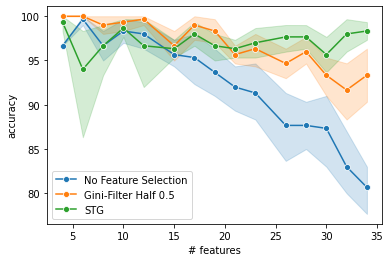

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.lineplot(data=nofs_results, x="# features", y="accuracy", 
label='No Feature Selection', marker='o')
sns.lineplot(data=gini_half_results, x="# features", y="accuracy",
label='Gini-Filter Half 0.5', marker='o')
sns.lineplot(data=stg_results, x="# features", y="accuracy", 
label='STG', marker='o')

In [12]:
import torch
from Gini import gini_filter
two_step_results = {
    '# features': [],
    "accuracy": []
}
for t in range(10):
    accs = []
    for i in range(len(num_normal)):
        X_train, X_test, Y_train, Y_test = insert_feature_noise(X, y, num_random_noise=num_normal[i],
            num_overwhelemed=num_overwhelmed[i], num_shortcut=num_shortcut[i])
        
        X_train, X_test, Y_train, Y_test = gini_filter(torch.tensor(X_train.values), torch.tensor(X_test.values), 
            torch.tensor(Y_train, dtype=torch.int64), 
            torch.tensor(Y_test, dtype=torch.int64), 
            left=0.5)
        X_train, X_test, Y_train, Y_test = X_train.numpy(), X_test.numpy(), Y_train.numpy(), Y_test.numpy()
        clf = STG(task_type='classification',
                input_dim=X_train.shape[1],
                output_dim=3,
                hidden_dims=(16, 16),
                activation='ReLU', optimizer='SGD', learning_rate=0.1,
                batch_size=X_train.shape[0], feature_selection=True, 
                sigma=0.5, lam=0.1, random_state=1, device="cpu")
        clf.fit(X_train, Y_train, nr_epochs=1000,
            print_interval=100, 
            valid_X=X_test, 
            valid_y=Y_test)
        
        acc = print_accuracy(clf.predict, X_test, Y_test)
        two_step_results["accuracy"].append(acc)
        total_feature = 2*num_normal[i] + num_overwhelmed[i] + num_shortcut[i]
        two_step_results['# features'].append(total_feature)
        num_gate = np.count_nonzero(clf.get_gates(mode='prob'))
        print(f"{acc}%, {num_gate}/{total_feature + 4} features")


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 100: loss=1.141661 valid_loss=1.082312
Epoch: 200: loss=0.632584 valid_loss=0.663396
Epoch: 300: loss=0.366413 valid_loss=0.330151
Epoch: 400: loss=0.318675 valid_loss=0.280543
Epoch: 500: loss=0.268238 valid_loss=0.097086
Epoch: 600: loss=0.211092 valid_loss=0.066301
Epoch: 700: loss=0.163787 valid_loss=0.052567
Epoch: 800: loss=0.156890 valid_loss=0.043926
Epoch: 900: loss=0.148733 valid_loss=0.039008
Epoch: 1000: loss=0.144540 valid_loss=0.035064
Accuracy = 100.0%
100.0%, 3/8 features
Epoch: 100: loss=1.136601 valid_loss=1.103121
Epoch: 200: loss=0.838451 valid_loss=0.798046



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 300: loss=0.458451 valid_loss=0.428312
Epoch: 400: loss=0.302189 valid_loss=0.247834
Epoch: 500: loss=0.359134 valid_loss=0.375282
Epoch: 600: loss=0.200712 valid_loss=0.130219
Epoch: 700: loss=0.179418 valid_loss=0.111047
Epoch: 800: loss=0.167611 valid_loss=0.100289
Epoch: 900: loss=0.159524 valid_loss=0.091248
Epoch: 1000: loss=0.156049 valid_loss=0.085459
Accuracy = 96.66666666666667%
96.66666666666667%, 3/10 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 100: loss=1.165314 valid_loss=1.105360
Epoch: 200: loss=0.990139 valid_loss=0.936128
Epoch: 300: loss=0.516025 valid_loss=0.490155
Epoch: 400: loss=0.417144 valid_loss=0.300483
Epoch: 500: loss=0.264698 valid_loss=0.177584
Epoch: 600: loss=0.195673 valid_loss=0.128410
Epoch: 700: loss=0.175315 valid_loss=0.101007
Epoch: 800: loss=0.158317 valid_loss=0.085804
Epoch: 900: loss=0.148803 valid_loss=0.076134
Epoch: 1000: loss=0.140717 valid_loss=0.070057
Accuracy = 100.0%
100.0%, 3/12 features
Epoch: 100: loss=1.169827 valid_loss=1.115293
Epoch: 200: loss=1.153981 valid_loss=1.073532



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 300: loss=0.678958 valid_loss=0.669510
Epoch: 400: loss=0.390109 valid_loss=0.351228
Epoch: 500: loss=0.285467 valid_loss=0.243468
Epoch: 600: loss=0.217596 valid_loss=0.171624
Epoch: 700: loss=0.242491 valid_loss=0.196763
Epoch: 800: loss=0.164518 valid_loss=0.100964
Epoch: 900: loss=0.153973 valid_loss=0.091622
Epoch: 1000: loss=0.145396 valid_loss=0.084162
Accuracy = 96.66666666666667%
96.66666666666667%, 3/14 features
Epoch: 100: loss=1.150971 valid_loss=1.090176



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 200: loss=0.640512 valid_loss=0.653050
Epoch: 300: loss=0.425651 valid_loss=0.448277
Epoch: 400: loss=0.352951 valid_loss=0.235550
Epoch: 500: loss=0.228491 valid_loss=0.166421
Epoch: 600: loss=0.195857 valid_loss=0.121913
Epoch: 700: loss=0.221882 valid_loss=0.094213
Epoch: 800: loss=0.262822 valid_loss=0.076712
Epoch: 900: loss=0.159349 valid_loss=0.076389
Epoch: 1000: loss=0.158700 valid_loss=0.060352
Accuracy = 100.0%
100.0%, 5/16 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 100: loss=1.130576 valid_loss=1.094030
Epoch: 200: loss=0.689021 valid_loss=0.620083
Epoch: 300: loss=0.372948 valid_loss=0.285194
Epoch: 400: loss=0.248812 valid_loss=0.153546
Epoch: 500: loss=0.221350 valid_loss=0.116643
Epoch: 600: loss=0.230428 valid_loss=0.095769
Epoch: 700: loss=0.382148 valid_loss=0.090872
Epoch: 800: loss=0.198326 valid_loss=0.085192
Epoch: 900: loss=0.208123 valid_loss=0.079467
Epoch: 1000: loss=0.186154 valid_loss=0.073160
Accuracy = 96.66666666666667%
96.66666666666667%, 7/19 features
Epoch: 100: loss=1.169577 valid_loss=1.116583
Epoch: 200: loss=1.109650 valid_loss=1.062959



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 300: loss=0.638135 valid_loss=0.606804
Epoch: 400: loss=0.489571 valid_loss=0.562990
Epoch: 500: loss=0.330166 valid_loss=0.415490
Epoch: 600: loss=0.227275 valid_loss=0.211852
Epoch: 700: loss=0.189455 valid_loss=0.125415
Epoch: 800: loss=0.187332 valid_loss=0.098414
Epoch: 900: loss=0.167332 valid_loss=0.080594
Epoch: 1000: loss=0.162225 valid_loss=0.069942
Accuracy = 100.0%
100.0%, 8/21 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 100: loss=1.171480 valid_loss=1.110558
Epoch: 200: loss=1.006621 valid_loss=0.999333
Epoch: 300: loss=0.497457 valid_loss=0.472022
Epoch: 400: loss=0.333285 valid_loss=0.343329
Epoch: 500: loss=0.260330 valid_loss=0.200705
Epoch: 600: loss=0.194871 valid_loss=0.122708
Epoch: 700: loss=0.175468 valid_loss=0.102553
Epoch: 800: loss=0.162342 valid_loss=0.093094
Epoch: 900: loss=0.148546 valid_loss=0.082230
Epoch: 1000: loss=0.140133 valid_loss=0.078220
Accuracy = 96.66666666666667%
96.66666666666667%, 4/23 features
Epoch: 100: loss=1.137998 valid_loss=1.081760
Epoch: 200: loss=0.850783 valid_loss=0.816167



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 300: loss=0.273570 valid_loss=0.280371
Epoch: 400: loss=0.215681 valid_loss=0.142325
Epoch: 500: loss=0.188988 valid_loss=0.103477
Epoch: 600: loss=0.202077 valid_loss=0.097718
Epoch: 700: loss=0.162598 valid_loss=0.068020
Epoch: 800: loss=0.170697 valid_loss=0.058920
Epoch: 900: loss=0.142034 valid_loss=0.091948
Epoch: 1000: loss=0.128000 valid_loss=0.051981
Accuracy = 96.66666666666667%
96.66666666666667%, 9/25 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 100: loss=1.165965 valid_loss=1.112613
Epoch: 200: loss=0.998463 valid_loss=0.990318
Epoch: 300: loss=0.631511 valid_loss=0.518496
Epoch: 400: loss=0.274078 valid_loss=0.183483
Epoch: 500: loss=0.204799 valid_loss=0.113300
Epoch: 600: loss=0.188662 valid_loss=0.091018
Epoch: 700: loss=0.169249 valid_loss=0.077572
Epoch: 800: loss=0.159889 valid_loss=0.068419
Epoch: 900: loss=0.151020 valid_loss=0.070704
Epoch: 1000: loss=0.141978 valid_loss=0.054749
Accuracy = 100.0%
100.0%, 12/27 features
Epoch: 100: loss=1.117110 valid_loss=1.085020
Epoch: 200: loss=0.611509 valid_loss=0.592014



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 300: loss=0.350688 valid_loss=0.334303
Epoch: 400: loss=0.237180 valid_loss=0.210265
Epoch: 500: loss=0.205686 valid_loss=0.116060
Epoch: 600: loss=0.175416 valid_loss=0.092289
Epoch: 700: loss=0.166075 valid_loss=0.078447
Epoch: 800: loss=0.165022 valid_loss=0.086598
Epoch: 900: loss=0.174718 valid_loss=0.055997
Epoch: 1000: loss=0.140430 valid_loss=0.054061
Accuracy = 96.66666666666667%
96.66666666666667%, 15/30 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 100: loss=1.169032 valid_loss=1.119179
Epoch: 200: loss=1.083634 valid_loss=1.070352
Epoch: 300: loss=0.621093 valid_loss=0.638922
Epoch: 400: loss=0.407322 valid_loss=0.482113
Epoch: 500: loss=0.285461 valid_loss=0.265911
Epoch: 600: loss=0.222762 valid_loss=0.140285
Epoch: 700: loss=0.192392 valid_loss=0.112927
Epoch: 800: loss=0.178621 valid_loss=0.091344
Epoch: 900: loss=0.188011 valid_loss=0.081081
Epoch: 1000: loss=0.167711 valid_loss=0.075753
Accuracy = 100.0%
100.0%, 16/32 features
Epoch: 100: loss=1.146063 valid_loss=1.099857



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 200: loss=0.857365 valid_loss=0.761503
Epoch: 300: loss=0.403870 valid_loss=0.366529
Epoch: 400: loss=0.286551 valid_loss=0.231761
Epoch: 500: loss=0.220680 valid_loss=0.183391
Epoch: 600: loss=0.206609 valid_loss=0.148925
Epoch: 700: loss=0.173733 valid_loss=0.129407
Epoch: 800: loss=0.164895 valid_loss=0.110614
Epoch: 900: loss=0.165796 valid_loss=0.139927
Epoch: 1000: loss=0.151012 valid_loss=0.105392
Accuracy = 96.66666666666667%
96.66666666666667%, 17/34 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 100: loss=1.156221 valid_loss=1.100620
Epoch: 200: loss=0.738645 valid_loss=0.709273
Epoch: 300: loss=0.380807 valid_loss=0.317276
Epoch: 400: loss=0.248177 valid_loss=0.202875
Epoch: 500: loss=0.212619 valid_loss=0.150964
Epoch: 600: loss=0.302202 valid_loss=0.091716
Epoch: 700: loss=0.164985 valid_loss=0.070844
Epoch: 800: loss=0.219451 valid_loss=0.075686
Epoch: 900: loss=0.206373 valid_loss=0.057743
Epoch: 1000: loss=0.146010 valid_loss=0.064335
Accuracy = 96.66666666666667%
96.66666666666667%, 18/36 features
Epoch: 100: loss=1.160379 valid_loss=1.094978
Epoch: 200: loss=0.662421 valid_loss=0.656187



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 300: loss=0.376207 valid_loss=0.398203
Epoch: 400: loss=0.252687 valid_loss=0.188046
Epoch: 500: loss=0.206033 valid_loss=0.145444
Epoch: 600: loss=0.169796 valid_loss=0.104535
Epoch: 700: loss=0.158248 valid_loss=0.072114
Epoch: 800: loss=0.451356 valid_loss=0.116503
Epoch: 900: loss=0.214949 valid_loss=0.084378
Epoch: 1000: loss=0.137710 valid_loss=0.051429
Accuracy = 100.0%
100.0%, 19/38 features
Epoch: 100: loss=1.148741 valid_loss=1.101250



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 200: loss=0.913612 valid_loss=0.879566
Epoch: 300: loss=0.475055 valid_loss=0.410747
Epoch: 400: loss=0.278070 valid_loss=0.171482
Epoch: 500: loss=0.223769 valid_loss=0.110451
Epoch: 600: loss=0.296587 valid_loss=0.201464
Epoch: 700: loss=0.191048 valid_loss=0.060976
Epoch: 800: loss=0.173869 valid_loss=0.049419
Epoch: 900: loss=0.172012 valid_loss=0.045972
Epoch: 1000: loss=0.164514 valid_loss=0.038047
Accuracy = 96.66666666666667%
96.66666666666667%, 4/8 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 100: loss=1.160322 valid_loss=1.114595
Epoch: 200: loss=1.109950 valid_loss=1.060278
Epoch: 300: loss=0.656910 valid_loss=0.654696
Epoch: 400: loss=0.526628 valid_loss=0.453993
Epoch: 500: loss=0.400509 valid_loss=0.365419
Epoch: 600: loss=0.305823 valid_loss=0.284503
Epoch: 700: loss=0.237866 valid_loss=0.184064
Epoch: 800: loss=0.205415 valid_loss=0.141083
Epoch: 900: loss=0.175804 valid_loss=0.113531
Epoch: 1000: loss=0.163021 valid_loss=0.099553
Accuracy = 100.0%
100.0%, 3/10 features
Epoch: 100: loss=1.174802 valid_loss=1.120909
Epoch: 200: loss=1.161477 valid_loss=1.118574



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 300: loss=1.116183 valid_loss=1.100645
Epoch: 400: loss=0.849061 valid_loss=0.866133
Epoch: 500: loss=0.614923 valid_loss=0.580472
Epoch: 600: loss=0.458507 valid_loss=0.437027
Epoch: 700: loss=0.386281 valid_loss=0.356578
Epoch: 800: loss=0.458858 valid_loss=0.373094
Epoch: 900: loss=0.228023 valid_loss=0.198721
Epoch: 1000: loss=0.183765 valid_loss=0.143205
Accuracy = 100.0%
100.0%, 2/12 features
Epoch: 100: loss=1.163721 valid_loss=1.114870



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 200: loss=1.094966 valid_loss=1.046445
Epoch: 300: loss=0.557871 valid_loss=0.572552
Epoch: 400: loss=0.375430 valid_loss=0.356369
Epoch: 500: loss=0.257094 valid_loss=0.201417
Epoch: 600: loss=0.216240 valid_loss=0.184453
Epoch: 700: loss=0.188735 valid_loss=0.099421
Epoch: 800: loss=0.178510 valid_loss=0.087376
Epoch: 900: loss=0.166980 valid_loss=0.085818
Epoch: 1000: loss=0.174697 valid_loss=0.081640
Accuracy = 96.66666666666667%
96.66666666666667%, 6/14 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 100: loss=1.167820 valid_loss=1.116716
Epoch: 200: loss=1.076776 valid_loss=1.064340
Epoch: 300: loss=0.719552 valid_loss=0.735394
Epoch: 400: loss=0.516193 valid_loss=0.506030
Epoch: 500: loss=0.437418 valid_loss=0.416502
Epoch: 600: loss=0.379006 valid_loss=0.369386
Epoch: 700: loss=0.385812 valid_loss=0.363476
Epoch: 800: loss=0.291066 valid_loss=0.268394
Epoch: 900: loss=0.254862 valid_loss=0.194281
Epoch: 1000: loss=0.202917 valid_loss=0.157159
Accuracy = 96.66666666666667%
96.66666666666667%, 4/16 features
Epoch: 100: loss=1.108747 valid_loss=1.069617
Epoch: 200: loss=0.584946 valid_loss=0.535617



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 300: loss=0.306111 valid_loss=0.219209
Epoch: 400: loss=0.230994 valid_loss=0.145492
Epoch: 500: loss=0.210112 valid_loss=0.101272
Epoch: 600: loss=0.231492 valid_loss=0.093823
Epoch: 700: loss=0.189954 valid_loss=0.081794
Epoch: 800: loss=0.184735 valid_loss=0.073372
Epoch: 900: loss=0.168394 valid_loss=0.064120
Epoch: 1000: loss=0.166029 valid_loss=0.068439
Accuracy = 96.66666666666667%
96.66666666666667%, 6/19 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 100: loss=1.121075 valid_loss=1.078900
Epoch: 200: loss=0.653992 valid_loss=0.659939
Epoch: 300: loss=0.473108 valid_loss=0.465872
Epoch: 400: loss=0.361902 valid_loss=0.393222
Epoch: 500: loss=0.340313 valid_loss=0.178132
Epoch: 600: loss=0.213503 valid_loss=0.171381
Epoch: 700: loss=0.267497 valid_loss=0.183505
Epoch: 800: loss=0.167249 valid_loss=0.094138
Epoch: 900: loss=0.172863 valid_loss=0.072665
Epoch: 1000: loss=0.151797 valid_loss=0.079101
Accuracy = 100.0%
100.0%, 7/21 features
Epoch: 100: loss=1.171235 valid_loss=1.113944
Epoch: 200: loss=1.141493 valid_loss=1.067620



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 300: loss=0.632746 valid_loss=0.537339
Epoch: 400: loss=0.341548 valid_loss=0.288745
Epoch: 500: loss=0.223964 valid_loss=0.144865
Epoch: 600: loss=0.182130 valid_loss=0.109983
Epoch: 700: loss=0.160782 valid_loss=0.079912
Epoch: 800: loss=0.157662 valid_loss=0.072598
Epoch: 900: loss=0.170357 valid_loss=0.074463
Epoch: 1000: loss=0.149620 valid_loss=0.054503
Accuracy = 100.0%
100.0%, 9/23 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 100: loss=1.134837 valid_loss=1.093909
Epoch: 200: loss=0.823029 valid_loss=0.834697
Epoch: 300: loss=0.578117 valid_loss=0.562641
Epoch: 400: loss=0.282256 valid_loss=0.247962
Epoch: 500: loss=0.200249 valid_loss=0.139169
Epoch: 600: loss=0.167296 valid_loss=0.114259
Epoch: 700: loss=0.169429 valid_loss=0.099222
Epoch: 800: loss=0.162904 valid_loss=0.095758
Epoch: 900: loss=0.138559 valid_loss=0.081281
Epoch: 1000: loss=0.183547 valid_loss=0.094645
Accuracy = 96.66666666666667%
96.66666666666667%, 8/25 features
Epoch: 100: loss=1.126223 valid_loss=1.095082



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 200: loss=0.733321 valid_loss=0.716907
Epoch: 300: loss=0.399318 valid_loss=0.369597
Epoch: 400: loss=0.278561 valid_loss=0.184625
Epoch: 500: loss=0.218515 valid_loss=0.161763
Epoch: 600: loss=0.210035 valid_loss=0.114110
Epoch: 700: loss=0.176556 valid_loss=0.074432
Epoch: 800: loss=0.157685 valid_loss=0.076252
Epoch: 900: loss=0.153204 valid_loss=0.055426
Epoch: 1000: loss=0.157170 valid_loss=0.081250
Accuracy = 93.33333333333333%
93.33333333333333%, 11/27 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 100: loss=1.164597 valid_loss=1.119551
Epoch: 200: loss=1.103758 valid_loss=1.062078
Epoch: 300: loss=0.588154 valid_loss=0.621518
Epoch: 400: loss=0.359994 valid_loss=0.312330
Epoch: 500: loss=0.246998 valid_loss=0.198827
Epoch: 600: loss=0.207442 valid_loss=0.136514
Epoch: 700: loss=0.212707 valid_loss=0.170338
Epoch: 800: loss=0.171084 valid_loss=0.099307
Epoch: 900: loss=0.157602 valid_loss=0.092012
Epoch: 1000: loss=0.173938 valid_loss=0.076856
Accuracy = 96.66666666666667%
96.66666666666667%, 15/30 features
Epoch: 100: loss=1.148337 valid_loss=1.101490



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 200: loss=0.806762 valid_loss=0.800404
Epoch: 300: loss=0.459360 valid_loss=0.436876
Epoch: 400: loss=0.314849 valid_loss=0.284264
Epoch: 500: loss=0.219786 valid_loss=0.150595
Epoch: 600: loss=0.188985 valid_loss=0.108842
Epoch: 700: loss=0.169103 valid_loss=0.096839
Epoch: 800: loss=0.161721 valid_loss=0.095813
Epoch: 900: loss=0.188281 valid_loss=0.090335
Epoch: 1000: loss=0.145988 valid_loss=0.073263
Accuracy = 96.66666666666667%
96.66666666666667%, 16/32 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 100: loss=1.168846 valid_loss=1.115656
Epoch: 200: loss=1.121580 valid_loss=1.054385
Epoch: 300: loss=0.934989 valid_loss=0.705117
Epoch: 400: loss=0.340834 valid_loss=0.289427
Epoch: 500: loss=0.235630 valid_loss=0.167650
Epoch: 600: loss=0.210853 valid_loss=0.082010
Epoch: 700: loss=0.198576 valid_loss=0.141575
Epoch: 800: loss=0.199221 valid_loss=0.060871
Epoch: 900: loss=0.169831 valid_loss=0.053535
Epoch: 1000: loss=0.160026 valid_loss=0.050120
Accuracy = 100.0%
100.0%, 17/34 features
Epoch: 100: loss=1.172033 valid_loss=1.118897



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 200: loss=1.073449 valid_loss=1.073672
Epoch: 300: loss=0.615623 valid_loss=0.675252
Epoch: 400: loss=0.426189 valid_loss=0.524419
Epoch: 500: loss=0.262001 valid_loss=0.212761
Epoch: 600: loss=0.241701 valid_loss=0.148880
Epoch: 700: loss=0.179036 valid_loss=0.112834
Epoch: 800: loss=0.166578 valid_loss=0.110756
Epoch: 900: loss=0.210972 valid_loss=0.081438
Epoch: 1000: loss=0.179807 valid_loss=0.103957
Accuracy = 100.0%
100.0%, 18/36 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 100: loss=1.168910 valid_loss=1.106216
Epoch: 200: loss=0.852542 valid_loss=0.824338
Epoch: 300: loss=0.446274 valid_loss=0.383174
Epoch: 400: loss=0.308811 valid_loss=0.211131
Epoch: 500: loss=0.227336 valid_loss=0.202616
Epoch: 600: loss=0.202316 valid_loss=0.099828
Epoch: 700: loss=0.205436 valid_loss=0.111018
Epoch: 800: loss=0.177806 valid_loss=0.078948
Epoch: 900: loss=0.147479 valid_loss=0.059984
Epoch: 1000: loss=0.159612 valid_loss=0.055001
Accuracy = 96.66666666666667%
96.66666666666667%, 19/38 features
Epoch: 100: loss=1.160202 valid_loss=1.112351
Epoch: 200: loss=1.119735 valid_loss=1.064991



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 300: loss=1.057397 valid_loss=0.709828
Epoch: 400: loss=0.392937 valid_loss=0.399677
Epoch: 500: loss=0.291221 valid_loss=0.144118
Epoch: 600: loss=0.231583 valid_loss=0.081486
Epoch: 700: loss=0.489085 valid_loss=0.104517
Epoch: 800: loss=0.185936 valid_loss=0.051243
Epoch: 900: loss=0.190293 valid_loss=0.051474
Epoch: 1000: loss=0.295321 valid_loss=0.037555
Accuracy = 100.0%
100.0%, 4/8 features
Epoch: 100: loss=1.173272 valid_loss=1.114903



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 200: loss=1.145976 valid_loss=1.076791
Epoch: 300: loss=0.614311 valid_loss=0.603547
Epoch: 400: loss=0.382711 valid_loss=0.342447
Epoch: 500: loss=0.257040 valid_loss=0.223497
Epoch: 600: loss=0.951070 valid_loss=0.319475
Epoch: 700: loss=0.181442 valid_loss=0.115589
Epoch: 800: loss=0.166975 valid_loss=0.094461
Epoch: 900: loss=0.157816 valid_loss=0.082009
Epoch: 1000: loss=0.152504 valid_loss=0.073770
Accuracy = 96.66666666666667%
96.66666666666667%, 3/10 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 100: loss=1.111070 valid_loss=1.084597
Epoch: 200: loss=0.637055 valid_loss=0.616876
Epoch: 300: loss=0.585986 valid_loss=0.595440
Epoch: 400: loss=0.307277 valid_loss=0.249220
Epoch: 500: loss=0.243405 valid_loss=0.197440
Epoch: 600: loss=0.204590 valid_loss=0.138474
Epoch: 700: loss=0.173051 valid_loss=0.101628
Epoch: 800: loss=0.160005 valid_loss=0.084573
Epoch: 900: loss=0.152865 valid_loss=0.079934
Epoch: 1000: loss=0.145049 valid_loss=0.075839
Accuracy = 100.0%
100.0%, 3/12 features
Epoch: 100: loss=1.161204 valid_loss=1.099842
Epoch: 200: loss=0.884818 valid_loss=0.846971



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 300: loss=0.847512 valid_loss=0.558645
Epoch: 400: loss=0.261597 valid_loss=0.201480
Epoch: 500: loss=0.203033 valid_loss=0.108506
Epoch: 600: loss=0.175239 valid_loss=0.084618
Epoch: 700: loss=0.174589 valid_loss=0.104513
Epoch: 800: loss=0.150599 valid_loss=0.061647
Epoch: 900: loss=0.141215 valid_loss=0.051095
Epoch: 1000: loss=0.183908 valid_loss=0.045307
Accuracy = 100.0%
100.0%, 4/14 features
Epoch: 100: loss=1.167265 valid_loss=1.113887



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 200: loss=1.111834 valid_loss=1.051617
Epoch: 300: loss=0.578426 valid_loss=0.594724
Epoch: 400: loss=0.370826 valid_loss=0.320928
Epoch: 500: loss=0.263630 valid_loss=0.199316
Epoch: 600: loss=0.214739 valid_loss=0.151785
Epoch: 700: loss=0.207640 valid_loss=0.228112
Epoch: 800: loss=0.170359 valid_loss=0.103417
Epoch: 900: loss=0.161027 valid_loss=0.092916
Epoch: 1000: loss=0.153239 valid_loss=0.084696
Accuracy = 96.66666666666667%
96.66666666666667%, 4/16 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 100: loss=1.145529 valid_loss=1.091182
Epoch: 200: loss=0.784868 valid_loss=0.701235
Epoch: 300: loss=0.434669 valid_loss=0.379926
Epoch: 400: loss=0.252601 valid_loss=0.152468
Epoch: 500: loss=0.396719 valid_loss=0.110573
Epoch: 600: loss=0.205800 valid_loss=0.081388
Epoch: 700: loss=0.221668 valid_loss=0.071668
Epoch: 800: loss=0.169236 valid_loss=0.075568
Epoch: 900: loss=0.186424 valid_loss=0.100022
Epoch: 1000: loss=0.159234 valid_loss=0.058084
Accuracy = 100.0%
100.0%, 6/19 features
Epoch: 100: loss=1.135841 valid_loss=1.089145
Epoch: 200: loss=0.712138 valid_loss=0.663302



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 300: loss=0.428556 valid_loss=0.383469
Epoch: 400: loss=0.301425 valid_loss=0.235568
Epoch: 500: loss=0.251774 valid_loss=0.149289
Epoch: 600: loss=0.199644 valid_loss=0.108900
Epoch: 700: loss=0.179124 valid_loss=0.089481
Epoch: 800: loss=0.167261 valid_loss=0.077200
Epoch: 900: loss=0.164981 valid_loss=0.071244
Epoch: 1000: loss=0.152340 valid_loss=0.067839
Accuracy = 96.66666666666667%
96.66666666666667%, 6/21 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 100: loss=1.171909 valid_loss=1.113985
Epoch: 200: loss=1.150685 valid_loss=1.085340
Epoch: 300: loss=0.639553 valid_loss=0.622143
Epoch: 400: loss=0.329358 valid_loss=0.290926
Epoch: 500: loss=0.217066 valid_loss=0.158289
Epoch: 600: loss=0.179963 valid_loss=0.098507
Epoch: 700: loss=0.172863 valid_loss=0.083385
Epoch: 800: loss=0.168714 valid_loss=0.086438
Epoch: 900: loss=0.154941 valid_loss=0.066432
Epoch: 1000: loss=0.139312 valid_loss=0.052235
Accuracy = 100.0%
100.0%, 6/23 features
Epoch: 100: loss=1.169280 valid_loss=1.116156
Epoch: 200: loss=1.075057 valid_loss=1.043379



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 300: loss=0.577499 valid_loss=0.529209
Epoch: 400: loss=0.360210 valid_loss=0.425911
Epoch: 500: loss=0.249585 valid_loss=0.161815
Epoch: 600: loss=0.190222 valid_loss=0.187177
Epoch: 700: loss=0.252368 valid_loss=0.106928
Epoch: 800: loss=0.166380 valid_loss=0.095422
Epoch: 900: loss=0.166327 valid_loss=0.082129
Epoch: 1000: loss=0.156697 valid_loss=0.091670
Accuracy = 100.0%
100.0%, 10/25 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 100: loss=1.173878 valid_loss=1.115256
Epoch: 200: loss=1.043750 valid_loss=1.013757
Epoch: 300: loss=0.622447 valid_loss=0.763888
Epoch: 400: loss=0.309049 valid_loss=0.261160
Epoch: 500: loss=0.243996 valid_loss=0.189595
Epoch: 600: loss=0.220024 valid_loss=0.129678
Epoch: 700: loss=0.166810 valid_loss=0.136659
Epoch: 800: loss=0.167610 valid_loss=0.108088
Epoch: 900: loss=0.214892 valid_loss=0.356471
Epoch: 1000: loss=0.147324 valid_loss=0.073283
Accuracy = 96.66666666666667%
96.66666666666667%, 13/27 features
Epoch: 100: loss=1.161571 valid_loss=1.117607



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 200: loss=1.002481 valid_loss=1.005652
Epoch: 300: loss=0.639620 valid_loss=0.618553
Epoch: 400: loss=0.407964 valid_loss=0.395016
Epoch: 500: loss=0.318754 valid_loss=0.305253
Epoch: 600: loss=0.252050 valid_loss=0.177038
Epoch: 700: loss=0.186290 valid_loss=0.140606
Epoch: 800: loss=0.172445 valid_loss=0.108811
Epoch: 900: loss=0.224039 valid_loss=0.088207
Epoch: 1000: loss=0.154298 valid_loss=0.083869
Accuracy = 100.0%
100.0%, 15/30 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 100: loss=1.173532 valid_loss=1.115160
Epoch: 200: loss=1.147815 valid_loss=1.092620
Epoch: 300: loss=0.840849 valid_loss=0.756924
Epoch: 400: loss=0.466145 valid_loss=0.437247
Epoch: 500: loss=0.291128 valid_loss=0.318741
Epoch: 600: loss=0.225428 valid_loss=0.160058
Epoch: 700: loss=0.196086 valid_loss=0.102338
Epoch: 800: loss=0.174753 valid_loss=0.107778
Epoch: 900: loss=0.146171 valid_loss=0.052832
Epoch: 1000: loss=0.140598 valid_loss=0.048949
Accuracy = 100.0%
100.0%, 16/32 features
Epoch: 100: loss=1.169475 valid_loss=1.112094
Epoch: 200: loss=1.098866 valid_loss=1.017379



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 300: loss=0.527156 valid_loss=0.544651
Epoch: 400: loss=0.367245 valid_loss=0.373637
Epoch: 500: loss=0.243674 valid_loss=0.241877
Epoch: 600: loss=0.264015 valid_loss=0.127850
Epoch: 700: loss=0.324036 valid_loss=0.225547
Epoch: 800: loss=0.186294 valid_loss=0.112734
Epoch: 900: loss=0.179126 valid_loss=0.100069
Epoch: 1000: loss=0.185348 valid_loss=0.117679
Accuracy = 93.33333333333333%
93.33333333333333%, 17/34 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 100: loss=1.160568 valid_loss=1.102400
Epoch: 200: loss=0.779350 valid_loss=0.788317
Epoch: 300: loss=0.462742 valid_loss=0.447115
Epoch: 400: loss=1.803307 valid_loss=1.681227
Epoch: 500: loss=0.211991 valid_loss=0.241651
Epoch: 600: loss=0.200916 valid_loss=0.115126
Epoch: 700: loss=0.175146 valid_loss=0.072873
Epoch: 800: loss=0.154309 valid_loss=0.063944
Epoch: 900: loss=0.146335 valid_loss=0.056115
Epoch: 1000: loss=0.156018 valid_loss=0.049566
Accuracy = 100.0%
100.0%, 18/36 features
Epoch: 100: loss=1.172437 valid_loss=1.106363



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 200: loss=1.032197 valid_loss=0.874343
Epoch: 300: loss=0.439825 valid_loss=0.331640
Epoch: 400: loss=0.269022 valid_loss=0.281285
Epoch: 500: loss=0.207550 valid_loss=0.148812
Epoch: 600: loss=0.188781 valid_loss=0.097854
Epoch: 700: loss=0.163674 valid_loss=0.095559
Epoch: 800: loss=0.145928 valid_loss=0.080385
Epoch: 900: loss=0.222393 valid_loss=0.074205
Epoch: 1000: loss=0.139509 valid_loss=0.091990
Accuracy = 93.33333333333333%
93.33333333333333%, 19/38 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 100: loss=1.158365 valid_loss=1.108061
Epoch: 200: loss=1.101067 valid_loss=0.945666
Epoch: 300: loss=0.687574 valid_loss=0.560849
Epoch: 400: loss=0.312204 valid_loss=0.425253
Epoch: 500: loss=0.223483 valid_loss=0.114914
Epoch: 600: loss=0.193639 valid_loss=0.075885
Epoch: 700: loss=0.177379 valid_loss=0.058329
Epoch: 800: loss=0.169124 valid_loss=0.046231
Epoch: 900: loss=0.162098 valid_loss=0.039417
Epoch: 1000: loss=0.175004 valid_loss=0.049004
Accuracy = 96.66666666666667%
96.66666666666667%, 4/8 features
Epoch: 100: loss=1.164311 valid_loss=1.117860
Epoch: 200: loss=1.055163 valid_loss=1.068359



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 300: loss=0.732488 valid_loss=0.732533
Epoch: 400: loss=0.600146 valid_loss=0.531196
Epoch: 500: loss=0.517205 valid_loss=0.484410
Epoch: 600: loss=0.362657 valid_loss=0.392751
Epoch: 700: loss=0.301853 valid_loss=0.258948
Epoch: 800: loss=0.234796 valid_loss=0.192697
Epoch: 900: loss=0.205044 valid_loss=0.159340
Epoch: 1000: loss=0.188412 valid_loss=0.140366
Accuracy = 96.66666666666667%
96.66666666666667%, 3/10 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 100: loss=1.171749 valid_loss=1.120156
Epoch: 200: loss=1.165177 valid_loss=1.117796
Epoch: 300: loss=1.149576 valid_loss=1.108509
Epoch: 400: loss=0.962916 valid_loss=0.982395
Epoch: 500: loss=0.530524 valid_loss=0.514042
Epoch: 600: loss=0.354725 valid_loss=0.307096
Epoch: 700: loss=0.258010 valid_loss=0.215052
Epoch: 800: loss=0.199296 valid_loss=0.155405
Epoch: 900: loss=0.175538 valid_loss=0.134735
Epoch: 1000: loss=0.174619 valid_loss=0.112935
Accuracy = 93.33333333333333%
93.33333333333333%, 2/12 features
Epoch: 100: loss=1.167660 valid_loss=1.105702
Epoch: 200: loss=1.075932 valid_loss=1.000893



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 300: loss=0.630846 valid_loss=0.546695
Epoch: 400: loss=0.682284 valid_loss=0.697021
Epoch: 500: loss=0.230774 valid_loss=0.161371
Epoch: 600: loss=0.190363 valid_loss=0.105843
Epoch: 700: loss=0.161807 valid_loss=0.074401
Epoch: 800: loss=0.150797 valid_loss=0.058615
Epoch: 900: loss=0.137006 valid_loss=0.047961
Epoch: 1000: loss=0.132543 valid_loss=0.047988
Accuracy = 100.0%
100.0%, 3/14 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 100: loss=1.168180 valid_loss=1.113378
Epoch: 200: loss=1.101756 valid_loss=1.070274
Epoch: 300: loss=1.086771 valid_loss=0.751861
Epoch: 400: loss=0.397548 valid_loss=0.261176
Epoch: 500: loss=0.285084 valid_loss=0.164925
Epoch: 600: loss=0.193812 valid_loss=0.128039
Epoch: 700: loss=0.177139 valid_loss=0.097062
Epoch: 800: loss=0.163165 valid_loss=0.087829
Epoch: 900: loss=0.154932 valid_loss=0.077385
Epoch: 1000: loss=0.156179 valid_loss=0.070587
Accuracy = 96.66666666666667%
96.66666666666667%, 4/16 features
Epoch: 100: loss=1.147527 valid_loss=1.100323
Epoch: 200: loss=0.725812 valid_loss=0.769019



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 300: loss=0.465448 valid_loss=0.327816
Epoch: 400: loss=0.274504 valid_loss=0.165875
Epoch: 500: loss=0.224704 valid_loss=0.115793
Epoch: 600: loss=0.305985 valid_loss=0.102365
Epoch: 700: loss=0.193737 valid_loss=0.110156
Epoch: 800: loss=0.184394 valid_loss=0.075171
Epoch: 900: loss=0.189095 valid_loss=0.077714
Epoch: 1000: loss=0.174336 valid_loss=0.067858
Accuracy = 100.0%
100.0%, 6/19 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 100: loss=1.169626 valid_loss=1.116627
Epoch: 200: loss=1.032638 valid_loss=1.014017
Epoch: 300: loss=0.542998 valid_loss=0.566593
Epoch: 400: loss=0.492058 valid_loss=0.571047
Epoch: 500: loss=0.378946 valid_loss=0.433488
Epoch: 600: loss=0.282256 valid_loss=0.131471
Epoch: 700: loss=0.202187 valid_loss=0.101638
Epoch: 800: loss=0.168663 valid_loss=0.118989
Epoch: 900: loss=0.163886 valid_loss=0.079747
Epoch: 1000: loss=0.163509 valid_loss=0.069087
Accuracy = 96.66666666666667%
96.66666666666667%, 7/21 features
Epoch: 100: loss=1.128518 valid_loss=1.087956
Epoch: 200: loss=0.725975 valid_loss=0.715833



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 300: loss=0.435025 valid_loss=0.398075
Epoch: 400: loss=0.305869 valid_loss=0.243894
Epoch: 500: loss=0.287597 valid_loss=0.250323
Epoch: 600: loss=0.181105 valid_loss=0.194553
Epoch: 700: loss=0.164231 valid_loss=0.116042
Epoch: 800: loss=0.198902 valid_loss=0.104406
Epoch: 900: loss=0.150955 valid_loss=0.093288
Epoch: 1000: loss=0.142198 valid_loss=0.087184
Accuracy = 96.66666666666667%
96.66666666666667%, 7/23 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 100: loss=1.149310 valid_loss=1.105734
Epoch: 200: loss=0.842419 valid_loss=0.824165
Epoch: 300: loss=0.520222 valid_loss=0.418710
Epoch: 400: loss=0.260847 valid_loss=0.188129
Epoch: 500: loss=0.205810 valid_loss=0.137435
Epoch: 600: loss=0.188064 valid_loss=0.124479
Epoch: 700: loss=0.154672 valid_loss=0.085092
Epoch: 800: loss=0.153928 valid_loss=0.085288
Epoch: 900: loss=0.145977 valid_loss=0.073665
Epoch: 1000: loss=0.184810 valid_loss=0.060676
Accuracy = 96.66666666666667%
96.66666666666667%, 10/25 features
Epoch: 100: loss=1.150729 valid_loss=1.095946
Epoch: 200: loss=0.857626 valid_loss=0.744811



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 300: loss=0.382858 valid_loss=0.335462
Epoch: 400: loss=0.258033 valid_loss=0.176096
Epoch: 500: loss=0.250343 valid_loss=0.118028
Epoch: 600: loss=0.181771 valid_loss=0.091592
Epoch: 700: loss=1.198259 valid_loss=0.271608
Epoch: 800: loss=0.166779 valid_loss=0.091577
Epoch: 900: loss=0.145695 valid_loss=0.058733
Epoch: 1000: loss=0.160519 valid_loss=0.051756
Accuracy = 100.0%
100.0%, 11/27 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 100: loss=1.171274 valid_loss=1.114805
Epoch: 200: loss=1.149671 valid_loss=1.091015
Epoch: 300: loss=0.709795 valid_loss=0.699904
Epoch: 400: loss=0.515685 valid_loss=0.338779
Epoch: 500: loss=0.264813 valid_loss=0.199489
Epoch: 600: loss=0.218508 valid_loss=0.128931
Epoch: 700: loss=0.166751 valid_loss=0.083397
Epoch: 800: loss=0.190070 valid_loss=0.066806
Epoch: 900: loss=0.154235 valid_loss=0.058387
Epoch: 1000: loss=0.143358 valid_loss=0.048385
Accuracy = 100.0%
100.0%, 15/30 features
Epoch: 100: loss=1.173810 valid_loss=1.112140



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 200: loss=1.045781 valid_loss=0.983555
Epoch: 300: loss=0.575819 valid_loss=0.521362
Epoch: 400: loss=0.338802 valid_loss=0.302211
Epoch: 500: loss=0.248187 valid_loss=0.243256
Epoch: 600: loss=0.214918 valid_loss=0.117904
Epoch: 700: loss=0.171963 valid_loss=0.088430
Epoch: 800: loss=0.162837 valid_loss=0.076658
Epoch: 900: loss=0.154035 valid_loss=0.066095
Epoch: 1000: loss=0.147230 valid_loss=0.057495
Accuracy = 100.0%
100.0%, 16/32 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 100: loss=1.177389 valid_loss=1.117928
Epoch: 200: loss=1.171264 valid_loss=1.109475
Epoch: 300: loss=1.069149 valid_loss=1.019731
Epoch: 400: loss=0.580525 valid_loss=0.494979
Epoch: 500: loss=0.339254 valid_loss=0.257949
Epoch: 600: loss=0.293762 valid_loss=0.217861
Epoch: 700: loss=0.188491 valid_loss=0.100308
Epoch: 800: loss=0.331054 valid_loss=0.107516
Epoch: 900: loss=0.157431 valid_loss=0.063297
Epoch: 1000: loss=0.169913 valid_loss=0.060760
Accuracy = 100.0%
100.0%, 17/34 features
Epoch: 100: loss=1.127148 valid_loss=1.083141
Epoch: 200: loss=0.750506 valid_loss=0.732951



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 300: loss=0.505491 valid_loss=0.483315
Epoch: 400: loss=0.381472 valid_loss=0.333416
Epoch: 500: loss=0.295447 valid_loss=0.247875
Epoch: 600: loss=0.233184 valid_loss=0.163507
Epoch: 700: loss=0.202791 valid_loss=0.128889
Epoch: 800: loss=0.181600 valid_loss=0.098164
Epoch: 900: loss=0.253471 valid_loss=0.137861
Epoch: 1000: loss=0.147869 valid_loss=0.065772
Accuracy = 100.0%
100.0%, 18/36 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 100: loss=1.155350 valid_loss=1.103094
Epoch: 200: loss=0.753427 valid_loss=0.764261
Epoch: 300: loss=0.459866 valid_loss=0.476262
Epoch: 400: loss=0.563626 valid_loss=0.670018
Epoch: 500: loss=0.290175 valid_loss=0.305618
Epoch: 600: loss=0.224254 valid_loss=0.148324
Epoch: 700: loss=0.435041 valid_loss=0.627469
Epoch: 800: loss=0.185362 valid_loss=0.106521
Epoch: 900: loss=0.172454 valid_loss=0.104311
Epoch: 1000: loss=0.210748 valid_loss=0.119789
Accuracy = 100.0%
100.0%, 19/38 features
Epoch: 100: loss=1.170905 valid_loss=1.113624
Epoch: 200: loss=1.115546 valid_loss=1.068305



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 300: loss=0.855785 valid_loss=0.622750
Epoch: 400: loss=0.325547 valid_loss=0.220492
Epoch: 500: loss=0.262868 valid_loss=0.103268
Epoch: 600: loss=0.228522 valid_loss=0.070358
Epoch: 700: loss=0.179549 valid_loss=0.046630
Epoch: 800: loss=0.173777 valid_loss=0.036958
Epoch: 900: loss=0.162546 valid_loss=0.032662
Epoch: 1000: loss=0.203013 valid_loss=0.029341
Accuracy = 100.0%
100.0%, 4/8 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 100: loss=1.165048 valid_loss=1.111481
Epoch: 200: loss=1.153022 valid_loss=1.059865
Epoch: 300: loss=0.624550 valid_loss=0.591588
Epoch: 400: loss=0.382030 valid_loss=0.387896
Epoch: 500: loss=0.257138 valid_loss=0.257976
Epoch: 600: loss=0.196181 valid_loss=0.130560
Epoch: 700: loss=0.174725 valid_loss=0.099792
Epoch: 800: loss=0.165228 valid_loss=0.089062
Epoch: 900: loss=0.157025 valid_loss=0.079515
Epoch: 1000: loss=0.151724 valid_loss=0.072418
Accuracy = 96.66666666666667%
96.66666666666667%, 3/10 features
Epoch: 100: loss=1.172763 valid_loss=1.102650
Epoch: 200: loss=0.871303 valid_loss=0.840070



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 300: loss=0.445084 valid_loss=0.399234
Epoch: 400: loss=0.350848 valid_loss=0.257734
Epoch: 500: loss=0.215572 valid_loss=0.144518
Epoch: 600: loss=0.181023 valid_loss=0.107241
Epoch: 700: loss=0.161690 valid_loss=0.089927
Epoch: 800: loss=0.150626 valid_loss=0.078147
Epoch: 900: loss=0.142737 valid_loss=0.071228
Epoch: 1000: loss=0.136389 valid_loss=0.068294
Accuracy = 100.0%
100.0%, 2/12 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 100: loss=1.134608 valid_loss=1.092474
Epoch: 200: loss=0.787606 valid_loss=0.773064
Epoch: 300: loss=1.273545 valid_loss=0.618637
Epoch: 400: loss=0.506535 valid_loss=0.509439
Epoch: 500: loss=0.346224 valid_loss=0.337507
Epoch: 600: loss=0.266081 valid_loss=0.274312
Epoch: 700: loss=0.220999 valid_loss=0.204189
Epoch: 800: loss=0.194555 valid_loss=0.147632
Epoch: 900: loss=0.191804 valid_loss=0.126034
Epoch: 1000: loss=0.160729 valid_loss=0.109886
Accuracy = 100.0%
100.0%, 3/14 features
Epoch: 100: loss=1.139843 valid_loss=1.089375
Epoch: 200: loss=0.651586 valid_loss=0.685254



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 300: loss=0.400919 valid_loss=0.394019
Epoch: 400: loss=0.282245 valid_loss=0.247657
Epoch: 500: loss=0.232953 valid_loss=0.241512
Epoch: 600: loss=0.193057 valid_loss=0.111458
Epoch: 700: loss=0.176538 valid_loss=0.099654
Epoch: 800: loss=0.219875 valid_loss=0.196699
Epoch: 900: loss=0.153724 valid_loss=0.087604
Epoch: 1000: loss=0.183928 valid_loss=0.067157
Accuracy = 100.0%
100.0%, 4/16 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 100: loss=1.166609 valid_loss=1.114663
Epoch: 200: loss=1.082491 valid_loss=1.054520
Epoch: 300: loss=0.629698 valid_loss=0.626291
Epoch: 400: loss=0.437334 valid_loss=0.436098
Epoch: 500: loss=0.327366 valid_loss=0.242380
Epoch: 600: loss=0.237475 valid_loss=0.168400
Epoch: 700: loss=0.238036 valid_loss=0.119447
Epoch: 800: loss=0.175952 valid_loss=0.093485
Epoch: 900: loss=0.159995 valid_loss=0.083106
Epoch: 1000: loss=0.252794 valid_loss=0.077176
Accuracy = 96.66666666666667%
96.66666666666667%, 5/19 features
Epoch: 100: loss=1.160635 valid_loss=1.107738
Epoch: 200: loss=0.979793 valid_loss=0.920540



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 300: loss=0.514083 valid_loss=0.456801
Epoch: 400: loss=0.318228 valid_loss=0.297675
Epoch: 500: loss=0.239702 valid_loss=0.168257
Epoch: 600: loss=0.270588 valid_loss=0.131116
Epoch: 700: loss=0.172153 valid_loss=0.096690
Epoch: 800: loss=0.160094 valid_loss=0.075662
Epoch: 900: loss=0.157767 valid_loss=0.070089
Epoch: 1000: loss=0.150140 valid_loss=0.069088
Accuracy = 100.0%
100.0%, 7/21 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 100: loss=1.164874 valid_loss=1.109923
Epoch: 200: loss=1.015440 valid_loss=0.993306
Epoch: 300: loss=0.529268 valid_loss=0.474532
Epoch: 400: loss=0.292382 valid_loss=0.204479
Epoch: 500: loss=0.208545 valid_loss=0.138589
Epoch: 600: loss=0.179540 valid_loss=0.109316
Epoch: 700: loss=0.170204 valid_loss=0.100679
Epoch: 800: loss=0.159847 valid_loss=0.076478
Epoch: 900: loss=0.149739 valid_loss=0.072731
Epoch: 1000: loss=0.144819 valid_loss=0.070386
Accuracy = 96.66666666666667%
96.66666666666667%, 8/23 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 100: loss=1.079845 valid_loss=1.038431
Epoch: 200: loss=0.544844 valid_loss=0.459269
Epoch: 300: loss=0.367047 valid_loss=0.202454
Epoch: 400: loss=0.216239 valid_loss=0.127163
Epoch: 500: loss=0.172120 valid_loss=0.098442
Epoch: 600: loss=0.264092 valid_loss=0.115666
Epoch: 700: loss=0.165732 valid_loss=0.069052
Epoch: 800: loss=0.170417 valid_loss=0.075836
Epoch: 900: loss=0.154637 valid_loss=0.060891
Epoch: 1000: loss=0.135799 valid_loss=0.035767
Accuracy = 100.0%
100.0%, 10/25 features
Epoch: 100: loss=1.171449 valid_loss=1.115630



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 200: loss=1.177076 valid_loss=1.075798
Epoch: 300: loss=0.686622 valid_loss=0.601364
Epoch: 400: loss=0.342431 valid_loss=0.257580
Epoch: 500: loss=0.228141 valid_loss=0.178255
Epoch: 600: loss=0.203606 valid_loss=0.119245
Epoch: 700: loss=0.185958 valid_loss=0.087320
Epoch: 800: loss=0.167728 valid_loss=0.074554
Epoch: 900: loss=0.153308 valid_loss=0.062462
Epoch: 1000: loss=0.156354 valid_loss=0.061766
Accuracy = 100.0%
100.0%, 13/27 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 100: loss=1.154365 valid_loss=1.108065
Epoch: 200: loss=0.904390 valid_loss=0.877045
Epoch: 300: loss=0.520926 valid_loss=0.537959
Epoch: 400: loss=0.358230 valid_loss=0.344305
Epoch: 500: loss=0.312392 valid_loss=0.228197
Epoch: 600: loss=0.218411 valid_loss=0.148532
Epoch: 700: loss=0.173543 valid_loss=0.111104
Epoch: 800: loss=0.193550 valid_loss=0.101979
Epoch: 900: loss=0.167413 valid_loss=0.084299
Epoch: 1000: loss=0.148818 valid_loss=0.079846
Accuracy = 100.0%
100.0%, 15/30 features
Epoch: 100: loss=1.171433 valid_loss=1.109751
Epoch: 200: loss=1.104826 valid_loss=1.006798



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 300: loss=0.474293 valid_loss=0.385524
Epoch: 400: loss=0.411788 valid_loss=0.226496
Epoch: 500: loss=0.199084 valid_loss=0.196292
Epoch: 600: loss=0.275333 valid_loss=0.254760
Epoch: 700: loss=0.181078 valid_loss=0.085828
Epoch: 800: loss=0.149322 valid_loss=0.084351
Epoch: 900: loss=0.138161 valid_loss=0.078594
Epoch: 1000: loss=0.134312 valid_loss=0.091815
Accuracy = 96.66666666666667%
96.66666666666667%, 16/32 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 100: loss=1.176477 valid_loss=1.119877
Epoch: 200: loss=1.172306 valid_loss=1.112399
Epoch: 300: loss=1.088994 valid_loss=0.995379
Epoch: 400: loss=0.662297 valid_loss=0.560744
Epoch: 500: loss=0.284140 valid_loss=0.278825
Epoch: 600: loss=0.257954 valid_loss=0.160893
Epoch: 700: loss=0.201881 valid_loss=0.131558
Epoch: 800: loss=0.208945 valid_loss=0.100029
Epoch: 900: loss=0.236156 valid_loss=0.089810
Epoch: 1000: loss=0.189291 valid_loss=0.096020
Accuracy = 100.0%
100.0%, 17/34 features
Epoch: 100: loss=1.177026 valid_loss=1.118798



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 200: loss=1.166377 valid_loss=1.104544
Epoch: 300: loss=0.852312 valid_loss=0.826259
Epoch: 400: loss=0.404935 valid_loss=0.361571
Epoch: 500: loss=0.220666 valid_loss=0.241761
Epoch: 600: loss=0.187054 valid_loss=0.113512
Epoch: 700: loss=0.168175 valid_loss=0.084312
Epoch: 800: loss=0.151513 valid_loss=0.063804
Epoch: 900: loss=0.148650 valid_loss=0.058400
Epoch: 1000: loss=0.158173 valid_loss=0.050679
Accuracy = 100.0%
100.0%, 18/36 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 100: loss=1.172625 valid_loss=1.117428
Epoch: 200: loss=1.150101 valid_loss=1.092042
Epoch: 300: loss=0.706013 valid_loss=0.704561
Epoch: 400: loss=0.399767 valid_loss=0.458358
Epoch: 500: loss=0.355116 valid_loss=0.749483
Epoch: 600: loss=0.210734 valid_loss=0.126261
Epoch: 700: loss=0.217770 valid_loss=0.099805
Epoch: 800: loss=0.203612 valid_loss=0.103988
Epoch: 900: loss=0.167336 valid_loss=0.066835
Epoch: 1000: loss=0.147855 valid_loss=0.100260
Accuracy = 93.33333333333333%
93.33333333333333%, 19/38 features
Epoch: 100: loss=1.151021 valid_loss=1.093453
Epoch: 200: loss=0.880004 valid_loss=0.794249



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 300: loss=0.403559 valid_loss=0.319821
Epoch: 400: loss=0.309180 valid_loss=0.309856
Epoch: 500: loss=0.190208 valid_loss=0.071442
Epoch: 600: loss=0.173889 valid_loss=0.048245
Epoch: 700: loss=0.546059 valid_loss=0.069825
Epoch: 800: loss=0.166917 valid_loss=0.034075
Epoch: 900: loss=0.160518 valid_loss=0.030273
Epoch: 1000: loss=0.158016 valid_loss=0.027632
Accuracy = 100.0%
100.0%, 4/8 features
Epoch: 100: loss=1.157967 valid_loss=1.102425



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 200: loss=0.833042 valid_loss=0.828506
Epoch: 300: loss=0.451835 valid_loss=0.439570
Epoch: 400: loss=0.294650 valid_loss=0.239816
Epoch: 500: loss=0.223236 valid_loss=0.164740
Epoch: 600: loss=0.191156 valid_loss=0.120213
Epoch: 700: loss=0.172745 valid_loss=0.099600
Epoch: 800: loss=0.166026 valid_loss=0.086265
Epoch: 900: loss=0.155931 valid_loss=0.078525
Epoch: 1000: loss=0.151526 valid_loss=0.073109
Accuracy = 96.66666666666667%
96.66666666666667%, 3/10 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 100: loss=1.174147 valid_loss=1.118274
Epoch: 200: loss=1.157824 valid_loss=1.111623
Epoch: 300: loss=1.084707 valid_loss=1.057246
Epoch: 400: loss=0.592458 valid_loss=0.600429
Epoch: 500: loss=0.394580 valid_loss=0.293308
Epoch: 600: loss=0.226705 valid_loss=0.162588
Epoch: 700: loss=0.184015 valid_loss=0.124079
Epoch: 800: loss=0.155379 valid_loss=0.100163
Epoch: 900: loss=0.145784 valid_loss=0.082907
Epoch: 1000: loss=0.138255 valid_loss=0.077198
Accuracy = 96.66666666666667%
96.66666666666667%, 2/12 features
Epoch: 100: loss=1.141726 valid_loss=1.095952
Epoch: 200: loss=0.787193 valid_loss=0.764572



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 300: loss=0.422241 valid_loss=0.384972
Epoch: 400: loss=0.308117 valid_loss=0.267536
Epoch: 500: loss=0.212648 valid_loss=0.143480
Epoch: 600: loss=0.183201 valid_loss=0.108278
Epoch: 700: loss=0.167367 valid_loss=0.089452
Epoch: 800: loss=0.174293 valid_loss=0.076792
Epoch: 900: loss=0.158164 valid_loss=0.079464
Epoch: 1000: loss=0.148183 valid_loss=0.066250
Accuracy = 96.66666666666667%
96.66666666666667%, 4/14 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 100: loss=1.163454 valid_loss=1.109482
Epoch: 200: loss=1.067598 valid_loss=1.015144
Epoch: 300: loss=0.552973 valid_loss=0.533504
Epoch: 400: loss=0.803626 valid_loss=0.812614
Epoch: 500: loss=0.231999 valid_loss=0.174760
Epoch: 600: loss=0.183060 valid_loss=0.128085
Epoch: 700: loss=0.160799 valid_loss=0.092123
Epoch: 800: loss=0.161873 valid_loss=0.080908
Epoch: 900: loss=0.153729 valid_loss=0.073215
Epoch: 1000: loss=0.138283 valid_loss=0.064970
Accuracy = 100.0%
100.0%, 4/16 features
Epoch: 100: loss=1.118710 valid_loss=1.084979
Epoch: 200: loss=0.618843 valid_loss=0.617955



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 300: loss=0.444234 valid_loss=0.370201
Epoch: 400: loss=0.267036 valid_loss=0.289831
Epoch: 500: loss=0.247338 valid_loss=0.147214
Epoch: 600: loss=0.187879 valid_loss=0.120556
Epoch: 700: loss=0.176866 valid_loss=0.105603
Epoch: 800: loss=0.174991 valid_loss=0.100471
Epoch: 900: loss=0.155502 valid_loss=0.090619
Epoch: 1000: loss=0.145628 valid_loss=0.081720
Accuracy = 96.66666666666667%
96.66666666666667%, 5/19 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 100: loss=1.131457 valid_loss=1.093253
Epoch: 200: loss=0.910540 valid_loss=0.732976
Epoch: 300: loss=0.539538 valid_loss=0.529145
Epoch: 400: loss=0.426337 valid_loss=0.440587
Epoch: 500: loss=0.377958 valid_loss=0.376414
Epoch: 600: loss=0.262846 valid_loss=0.186979
Epoch: 700: loss=0.216475 valid_loss=0.144645
Epoch: 800: loss=0.178888 valid_loss=0.122370
Epoch: 900: loss=0.181699 valid_loss=0.103753
Epoch: 1000: loss=0.166236 valid_loss=0.083376
Accuracy = 96.66666666666667%
96.66666666666667%, 7/21 features
Epoch: 100: loss=1.174115 valid_loss=1.105342
Epoch: 200: loss=0.847494 valid_loss=0.858654



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 300: loss=0.513383 valid_loss=0.475347
Epoch: 400: loss=0.375306 valid_loss=0.347593
Epoch: 500: loss=0.249122 valid_loss=0.237432
Epoch: 600: loss=0.241583 valid_loss=0.128530
Epoch: 700: loss=0.182707 valid_loss=0.098390
Epoch: 800: loss=0.162612 valid_loss=0.081691
Epoch: 900: loss=0.190732 valid_loss=0.120394
Epoch: 1000: loss=0.142605 valid_loss=0.070587
Accuracy = 100.0%
100.0%, 7/23 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 100: loss=1.163677 valid_loss=1.107645
Epoch: 200: loss=1.060979 valid_loss=1.012899
Epoch: 300: loss=0.585044 valid_loss=0.525984
Epoch: 400: loss=0.337664 valid_loss=0.249520
Epoch: 500: loss=0.248815 valid_loss=0.128859
Epoch: 600: loss=0.195075 valid_loss=0.111915
Epoch: 700: loss=0.175030 valid_loss=0.078743
Epoch: 800: loss=0.153192 valid_loss=0.062241
Epoch: 900: loss=0.193203 valid_loss=0.052347
Epoch: 1000: loss=0.161178 valid_loss=0.073135
Accuracy = 93.33333333333333%
93.33333333333333%, 9/25 features
Epoch: 100: loss=1.174795 valid_loss=1.113490
Epoch: 200: loss=1.130274 valid_loss=1.080508



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 300: loss=0.783770 valid_loss=0.686609
Epoch: 400: loss=0.425128 valid_loss=0.386717
Epoch: 500: loss=0.249061 valid_loss=0.233815
Epoch: 600: loss=0.197124 valid_loss=0.112743
Epoch: 700: loss=0.167324 valid_loss=0.095540
Epoch: 800: loss=0.165439 valid_loss=0.070694
Epoch: 900: loss=0.142871 valid_loss=0.057572
Epoch: 1000: loss=0.229093 valid_loss=0.051008
Accuracy = 100.0%
100.0%, 11/27 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 100: loss=1.154726 valid_loss=1.106143
Epoch: 200: loss=1.079257 valid_loss=0.888398
Epoch: 300: loss=0.571368 valid_loss=0.556805
Epoch: 400: loss=0.443521 valid_loss=0.453677
Epoch: 500: loss=0.338048 valid_loss=0.301801
Epoch: 600: loss=0.288916 valid_loss=0.245751
Epoch: 700: loss=0.214123 valid_loss=0.148537
Epoch: 800: loss=0.177316 valid_loss=0.127924
Epoch: 900: loss=0.186435 valid_loss=0.123442
Epoch: 1000: loss=0.154920 valid_loss=0.083147
Accuracy = 100.0%
100.0%, 15/30 features
Epoch: 100: loss=1.176311 valid_loss=1.121412



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 200: loss=1.172951 valid_loss=1.118113
Epoch: 300: loss=1.145638 valid_loss=1.099684
Epoch: 400: loss=0.874269 valid_loss=0.838992
Epoch: 500: loss=0.474612 valid_loss=0.416954
Epoch: 600: loss=0.294092 valid_loss=0.276350
Epoch: 700: loss=0.211628 valid_loss=0.165872
Epoch: 800: loss=0.188798 valid_loss=0.099017
Epoch: 900: loss=0.162278 valid_loss=0.077653
Epoch: 1000: loss=0.154561 valid_loss=0.060225
Accuracy = 100.0%
100.0%, 16/32 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 100: loss=1.177445 valid_loss=1.120436
Epoch: 200: loss=1.150485 valid_loss=1.112999
Epoch: 300: loss=0.848572 valid_loss=0.875688
Epoch: 400: loss=0.387883 valid_loss=0.393918
Epoch: 500: loss=0.272103 valid_loss=0.304757
Epoch: 600: loss=0.256992 valid_loss=0.163472
Epoch: 700: loss=0.362677 valid_loss=0.135177
Epoch: 800: loss=0.174250 valid_loss=0.121611
Epoch: 900: loss=0.156190 valid_loss=0.134231
Epoch: 1000: loss=0.199535 valid_loss=0.104027
Accuracy = 96.66666666666667%
96.66666666666667%, 17/34 features
Epoch: 100: loss=1.171095 valid_loss=1.118376



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 200: loss=1.112244 valid_loss=1.038034
Epoch: 300: loss=0.738141 valid_loss=0.795340
Epoch: 400: loss=0.446578 valid_loss=0.452516
Epoch: 500: loss=0.358224 valid_loss=0.332764
Epoch: 600: loss=0.263415 valid_loss=0.216092
Epoch: 700: loss=0.198210 valid_loss=0.166783
Epoch: 800: loss=0.182627 valid_loss=0.121214
Epoch: 900: loss=0.191770 valid_loss=0.093459
Epoch: 1000: loss=0.304905 valid_loss=0.084500
Accuracy = 96.66666666666667%
96.66666666666667%, 18/36 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 100: loss=1.121289 valid_loss=1.081388
Epoch: 200: loss=0.707976 valid_loss=0.624694
Epoch: 300: loss=0.423250 valid_loss=0.372910
Epoch: 400: loss=0.295125 valid_loss=0.243862
Epoch: 500: loss=0.236419 valid_loss=0.143583
Epoch: 600: loss=0.190176 valid_loss=0.120647
Epoch: 700: loss=0.198043 valid_loss=0.099676
Epoch: 800: loss=0.172273 valid_loss=0.083589
Epoch: 900: loss=0.175036 valid_loss=0.078705
Epoch: 1000: loss=0.163070 valid_loss=0.070701
Accuracy = 100.0%
100.0%, 19/38 features
Epoch: 100: loss=1.167887 valid_loss=1.108018
Epoch: 200: loss=1.110345 valid_loss=1.037773



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 300: loss=0.656452 valid_loss=0.605729
Epoch: 400: loss=0.351107 valid_loss=0.235906
Epoch: 500: loss=0.231637 valid_loss=0.092110
Epoch: 600: loss=0.181334 valid_loss=0.058550
Epoch: 700: loss=0.169761 valid_loss=0.042800
Epoch: 800: loss=0.165871 valid_loss=0.037395
Epoch: 900: loss=0.161620 valid_loss=0.032168
Epoch: 1000: loss=0.241038 valid_loss=0.030272
Accuracy = 100.0%
100.0%, 4/8 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 100: loss=1.170959 valid_loss=1.119647
Epoch: 200: loss=1.149960 valid_loss=1.111190
Epoch: 300: loss=1.052323 valid_loss=0.996358
Epoch: 400: loss=0.634658 valid_loss=0.615759
Epoch: 500: loss=0.505295 valid_loss=0.504724
Epoch: 600: loss=0.391658 valid_loss=0.372148
Epoch: 700: loss=0.320967 valid_loss=0.280978
Epoch: 800: loss=0.266909 valid_loss=0.233914
Epoch: 900: loss=0.289798 valid_loss=0.264844
Epoch: 1000: loss=0.205942 valid_loss=0.155972
Accuracy = 96.66666666666667%
96.66666666666667%, 3/10 features
Epoch: 100: loss=1.118714 valid_loss=1.073635
Epoch: 200: loss=0.856635 valid_loss=0.703369



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 300: loss=0.463102 valid_loss=0.430350
Epoch: 400: loss=0.336566 valid_loss=0.281086
Epoch: 500: loss=0.263474 valid_loss=0.358907
Epoch: 600: loss=0.204930 valid_loss=0.135906
Epoch: 700: loss=0.181254 valid_loss=0.114255
Epoch: 800: loss=0.166654 valid_loss=0.096092
Epoch: 900: loss=0.157228 valid_loss=0.084910
Epoch: 1000: loss=0.151283 valid_loss=0.077900
Accuracy = 96.66666666666667%
96.66666666666667%, 3/12 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 100: loss=1.158888 valid_loss=1.106116
Epoch: 200: loss=0.917600 valid_loss=0.920214
Epoch: 300: loss=0.471272 valid_loss=0.549810
Epoch: 400: loss=0.316266 valid_loss=0.293193
Epoch: 500: loss=0.255105 valid_loss=0.193173
Epoch: 600: loss=0.190750 valid_loss=0.133662
Epoch: 700: loss=0.204694 valid_loss=0.102666
Epoch: 800: loss=0.198543 valid_loss=0.094087
Epoch: 900: loss=0.179848 valid_loss=0.100199
Epoch: 1000: loss=0.151770 valid_loss=0.071944
Accuracy = 96.66666666666667%
96.66666666666667%, 5/14 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 100: loss=1.161981 valid_loss=1.115536
Epoch: 200: loss=0.936288 valid_loss=0.965335
Epoch: 300: loss=0.504326 valid_loss=0.500173
Epoch: 400: loss=0.485007 valid_loss=0.342070
Epoch: 500: loss=0.229475 valid_loss=0.168304
Epoch: 600: loss=0.197219 valid_loss=0.130418
Epoch: 700: loss=0.173393 valid_loss=0.104354
Epoch: 800: loss=0.165122 valid_loss=0.086794
Epoch: 900: loss=0.180714 valid_loss=0.136518
Epoch: 1000: loss=0.147151 valid_loss=0.074447
Accuracy = 100.0%
100.0%, 5/16 features
Epoch: 100: loss=1.155210 valid_loss=1.101195



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 200: loss=0.797758 valid_loss=0.775150
Epoch: 300: loss=0.439735 valid_loss=0.443767
Epoch: 400: loss=0.265523 valid_loss=0.154424
Epoch: 500: loss=0.233421 valid_loss=0.181892
Epoch: 600: loss=0.286102 valid_loss=0.100790
Epoch: 700: loss=0.198942 valid_loss=0.075881
Epoch: 800: loss=0.191814 valid_loss=0.074312
Epoch: 900: loss=0.183562 valid_loss=0.067144
Epoch: 1000: loss=0.179029 valid_loss=0.064162
Accuracy = 100.0%
100.0%, 7/19 features
Epoch: 100: loss=1.151268 valid_loss=1.098648



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 200: loss=0.760632 valid_loss=0.752752
Epoch: 300: loss=0.510708 valid_loss=0.402839
Epoch: 400: loss=0.277310 valid_loss=0.264708
Epoch: 500: loss=0.236859 valid_loss=0.140405
Epoch: 600: loss=0.197762 valid_loss=0.102903
Epoch: 700: loss=0.197671 valid_loss=0.088554
Epoch: 800: loss=0.177673 valid_loss=0.086736
Epoch: 900: loss=0.179091 valid_loss=0.069062
Epoch: 1000: loss=0.158450 valid_loss=0.055738
Accuracy = 100.0%
100.0%, 7/21 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 100: loss=1.168702 valid_loss=1.115776
Epoch: 200: loss=1.102728 valid_loss=1.043893
Epoch: 300: loss=0.552960 valid_loss=0.530739
Epoch: 400: loss=0.294355 valid_loss=0.247814
Epoch: 500: loss=0.217441 valid_loss=0.173806
Epoch: 600: loss=0.178830 valid_loss=0.114828
Epoch: 700: loss=0.165355 valid_loss=0.094453
Epoch: 800: loss=0.155645 valid_loss=0.086266
Epoch: 900: loss=0.144464 valid_loss=0.083744
Epoch: 1000: loss=0.153868 valid_loss=0.076910
Accuracy = 96.66666666666667%
96.66666666666667%, 6/23 features
Epoch: 100: loss=1.174762 valid_loss=1.119430
Epoch: 200: loss=1.152768 valid_loss=1.101564



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 300: loss=0.940149 valid_loss=0.837568
Epoch: 400: loss=0.394701 valid_loss=0.320996
Epoch: 500: loss=0.246036 valid_loss=0.166784
Epoch: 600: loss=0.213437 valid_loss=0.129508
Epoch: 700: loss=0.206639 valid_loss=0.116479
Epoch: 800: loss=0.175967 valid_loss=0.091966
Epoch: 900: loss=0.151680 valid_loss=0.080375
Epoch: 1000: loss=0.164733 valid_loss=0.075887
Accuracy = 96.66666666666667%
96.66666666666667%, 10/25 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 100: loss=1.173723 valid_loss=1.110121
Epoch: 200: loss=1.123142 valid_loss=1.050917
Epoch: 300: loss=0.595874 valid_loss=0.534899
Epoch: 400: loss=0.406478 valid_loss=0.228856
Epoch: 500: loss=0.211396 valid_loss=0.127159
Epoch: 600: loss=0.306575 valid_loss=0.090681
Epoch: 700: loss=0.172902 valid_loss=0.069367
Epoch: 800: loss=0.754384 valid_loss=0.082194
Epoch: 900: loss=0.157066 valid_loss=0.055241
Epoch: 1000: loss=0.140712 valid_loss=0.045590
Accuracy = 100.0%
100.0%, 13/27 features
Epoch: 100: loss=1.177146 valid_loss=1.112431



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 200: loss=1.091032 valid_loss=1.023413
Epoch: 300: loss=0.479717 valid_loss=0.445849
Epoch: 400: loss=0.290271 valid_loss=0.217249
Epoch: 500: loss=0.220341 valid_loss=0.136008
Epoch: 600: loss=0.199616 valid_loss=0.136706
Epoch: 700: loss=0.160715 valid_loss=0.075596
Epoch: 800: loss=0.155896 valid_loss=0.069943
Epoch: 900: loss=0.162602 valid_loss=0.058905
Epoch: 1000: loss=0.222505 valid_loss=0.051551
Accuracy = 100.0%
100.0%, 15/30 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 100: loss=1.133120 valid_loss=1.087970
Epoch: 200: loss=0.647190 valid_loss=0.581554
Epoch: 300: loss=0.319087 valid_loss=0.319529
Epoch: 400: loss=0.233074 valid_loss=0.203196
Epoch: 500: loss=0.201827 valid_loss=0.115002
Epoch: 600: loss=0.214379 valid_loss=0.087609
Epoch: 700: loss=0.198969 valid_loss=0.079451
Epoch: 800: loss=0.171179 valid_loss=0.096539
Epoch: 900: loss=0.194759 valid_loss=0.058965
Epoch: 1000: loss=0.182161 valid_loss=0.052441
Accuracy = 96.66666666666667%
96.66666666666667%, 16/32 features
Epoch: 100: loss=1.169637 valid_loss=1.119824



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 200: loss=1.129167 valid_loss=1.083767
Epoch: 300: loss=0.689096 valid_loss=0.641258
Epoch: 400: loss=0.334602 valid_loss=0.275035
Epoch: 500: loss=0.408025 valid_loss=0.195209
Epoch: 600: loss=0.235320 valid_loss=0.158658
Epoch: 700: loss=0.276405 valid_loss=0.152868
Epoch: 800: loss=0.175018 valid_loss=0.112340
Epoch: 900: loss=0.169716 valid_loss=0.096613
Epoch: 1000: loss=0.162212 valid_loss=0.089008
Accuracy = 96.66666666666667%
96.66666666666667%, 17/34 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 100: loss=1.091022 valid_loss=1.049179
Epoch: 200: loss=0.527949 valid_loss=0.521891
Epoch: 300: loss=0.308855 valid_loss=0.311844
Epoch: 400: loss=0.243114 valid_loss=0.156080
Epoch: 500: loss=0.224777 valid_loss=0.108796
Epoch: 600: loss=0.173266 valid_loss=0.099786
Epoch: 700: loss=0.158522 valid_loss=0.077156
Epoch: 800: loss=0.183946 valid_loss=0.078275
Epoch: 900: loss=0.162281 valid_loss=0.081382
Epoch: 1000: loss=0.217208 valid_loss=0.077461
Accuracy = 93.33333333333333%
93.33333333333333%, 18/36 features
Epoch: 100: loss=1.164022 valid_loss=1.098137



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 200: loss=0.737402 valid_loss=0.755090
Epoch: 300: loss=0.524524 valid_loss=0.600047
Epoch: 400: loss=0.374012 valid_loss=0.238180
Epoch: 500: loss=0.224404 valid_loss=0.311197
Epoch: 600: loss=0.219535 valid_loss=0.269167
Epoch: 700: loss=0.174526 valid_loss=0.156329
Epoch: 800: loss=0.152826 valid_loss=0.115013
Epoch: 900: loss=0.211364 valid_loss=0.117099
Epoch: 1000: loss=0.158176 valid_loss=0.104339
Accuracy = 100.0%
100.0%, 19/38 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 100: loss=1.148776 valid_loss=1.090432
Epoch: 200: loss=0.729832 valid_loss=0.664612
Epoch: 300: loss=0.469387 valid_loss=0.294329
Epoch: 400: loss=0.243939 valid_loss=0.173109
Epoch: 500: loss=0.221861 valid_loss=0.098297
Epoch: 600: loss=0.186348 valid_loss=0.063664
Epoch: 700: loss=0.175845 valid_loss=0.049664
Epoch: 800: loss=0.166901 valid_loss=0.041068
Epoch: 900: loss=0.167536 valid_loss=0.039559
Epoch: 1000: loss=0.162379 valid_loss=0.030933
Accuracy = 100.0%
100.0%, 4/8 features
Epoch: 100: loss=1.164061 valid_loss=1.116474
Epoch: 200: loss=1.137685 valid_loss=1.072321



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 300: loss=0.679398 valid_loss=0.671530
Epoch: 400: loss=0.460501 valid_loss=0.424452
Epoch: 500: loss=0.361039 valid_loss=0.316015
Epoch: 600: loss=0.273833 valid_loss=0.244699
Epoch: 700: loss=0.217898 valid_loss=0.179397
Epoch: 800: loss=0.184486 valid_loss=0.144559
Epoch: 900: loss=0.163392 valid_loss=0.119275
Epoch: 1000: loss=0.152771 valid_loss=0.103269
Accuracy = 96.66666666666667%
96.66666666666667%, 2/10 features
Epoch: 100: loss=1.166634 valid_loss=1.108230



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 200: loss=0.957396 valid_loss=0.950808
Epoch: 300: loss=0.525284 valid_loss=0.503920
Epoch: 400: loss=0.349718 valid_loss=0.291510
Epoch: 500: loss=0.242919 valid_loss=0.190486
Epoch: 600: loss=0.197217 valid_loss=0.141222
Epoch: 700: loss=0.168522 valid_loss=0.109550
Epoch: 800: loss=0.152380 valid_loss=0.094772
Epoch: 900: loss=0.143077 valid_loss=0.084905
Epoch: 1000: loss=0.135878 valid_loss=0.078667
Accuracy = 96.66666666666667%
96.66666666666667%, 2/12 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 100: loss=1.142722 valid_loss=1.105240
Epoch: 200: loss=0.954862 valid_loss=0.865782
Epoch: 300: loss=0.513887 valid_loss=0.484390
Epoch: 400: loss=0.370014 valid_loss=0.333046
Epoch: 500: loss=0.304923 valid_loss=0.310817
Epoch: 600: loss=0.231350 valid_loss=0.201391
Epoch: 700: loss=0.189838 valid_loss=0.116957
Epoch: 800: loss=0.175203 valid_loss=0.100351
Epoch: 900: loss=0.163901 valid_loss=0.089560
Epoch: 1000: loss=0.158733 valid_loss=0.081690
Accuracy = 96.66666666666667%
96.66666666666667%, 4/14 features
Epoch: 100: loss=1.166082 valid_loss=1.109075



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 200: loss=0.992505 valid_loss=0.991081
Epoch: 300: loss=0.576426 valid_loss=0.522431
Epoch: 400: loss=0.338070 valid_loss=0.315480
Epoch: 500: loss=0.242654 valid_loss=0.330622
Epoch: 600: loss=0.207025 valid_loss=0.115175
Epoch: 700: loss=0.187650 valid_loss=0.104137
Epoch: 800: loss=0.177427 valid_loss=0.080649
Epoch: 900: loss=0.160184 valid_loss=0.079323
Epoch: 1000: loss=0.141945 valid_loss=0.066039
Accuracy = 100.0%
100.0%, 5/16 features
Epoch: 100: loss=1.154233 valid_loss=1.098609



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 200: loss=0.923927 valid_loss=0.726081
Epoch: 300: loss=0.436609 valid_loss=0.306406
Epoch: 400: loss=0.269451 valid_loss=0.192136
Epoch: 500: loss=0.228102 valid_loss=0.109056
Epoch: 600: loss=0.226917 valid_loss=0.098189
Epoch: 700: loss=0.191264 valid_loss=0.080414
Epoch: 800: loss=0.180376 valid_loss=0.082682
Epoch: 900: loss=0.178210 valid_loss=0.081735
Epoch: 1000: loss=0.170388 valid_loss=0.075009
Accuracy = 96.66666666666667%
96.66666666666667%, 6/19 features
Epoch: 100: loss=1.174692 valid_loss=1.112145
Epoch: 200: loss=1.067605 valid_loss=1.031282



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 300: loss=0.537175 valid_loss=0.472753
Epoch: 400: loss=0.339865 valid_loss=0.393401
Epoch: 500: loss=0.301394 valid_loss=0.243820
Epoch: 600: loss=0.204604 valid_loss=0.149135
Epoch: 700: loss=0.184324 valid_loss=0.090704
Epoch: 800: loss=0.163763 valid_loss=0.074271
Epoch: 900: loss=0.165045 valid_loss=0.085772
Epoch: 1000: loss=0.143434 valid_loss=0.063681
Accuracy = 100.0%
100.0%, 5/21 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 100: loss=1.167822 valid_loss=1.077362
Epoch: 200: loss=0.688137 valid_loss=0.704438
Epoch: 300: loss=0.392823 valid_loss=0.316648
Epoch: 400: loss=0.366471 valid_loss=0.333924
Epoch: 500: loss=0.200054 valid_loss=0.131400
Epoch: 600: loss=0.171606 valid_loss=0.091608
Epoch: 700: loss=0.171955 valid_loss=0.083820
Epoch: 800: loss=0.191885 valid_loss=0.080404
Epoch: 900: loss=0.151718 valid_loss=0.053745
Epoch: 1000: loss=0.148785 valid_loss=0.059793
Accuracy = 96.66666666666667%
96.66666666666667%, 5/23 features
Epoch: 100: loss=1.155236 valid_loss=1.107379



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 200: loss=0.837401 valid_loss=0.843466
Epoch: 300: loss=0.480109 valid_loss=0.447462
Epoch: 400: loss=0.319902 valid_loss=0.241529
Epoch: 500: loss=0.228684 valid_loss=0.149895
Epoch: 600: loss=0.204697 valid_loss=0.117000
Epoch: 700: loss=0.168880 valid_loss=0.104819
Epoch: 800: loss=0.195039 valid_loss=0.091421
Epoch: 900: loss=0.182864 valid_loss=0.074129
Epoch: 1000: loss=0.169800 valid_loss=0.073590
Accuracy = 96.66666666666667%
96.66666666666667%, 10/25 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 100: loss=1.157126 valid_loss=1.105599
Epoch: 200: loss=1.060746 valid_loss=0.902679
Epoch: 300: loss=0.419525 valid_loss=0.388890
Epoch: 400: loss=0.292387 valid_loss=0.212703
Epoch: 500: loss=0.237238 valid_loss=0.177610
Epoch: 600: loss=0.181256 valid_loss=0.099718
Epoch: 700: loss=0.172627 valid_loss=0.087059
Epoch: 800: loss=0.155296 valid_loss=0.070913
Epoch: 900: loss=0.153828 valid_loss=0.063782
Epoch: 1000: loss=0.164333 valid_loss=0.071352
Accuracy = 96.66666666666667%
96.66666666666667%, 8/27 features
Epoch: 100: loss=1.104680 valid_loss=1.038217
Epoch: 200: loss=0.555026 valid_loss=0.550891



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 300: loss=0.306272 valid_loss=0.258093
Epoch: 400: loss=0.259889 valid_loss=0.146826
Epoch: 500: loss=0.228136 valid_loss=0.103738
Epoch: 600: loss=0.169852 valid_loss=0.088618
Epoch: 700: loss=0.153314 valid_loss=0.066568
Epoch: 800: loss=0.144148 valid_loss=0.053883
Epoch: 900: loss=0.152441 valid_loss=0.042125
Epoch: 1000: loss=0.172957 valid_loss=0.049626
Accuracy = 100.0%
100.0%, 15/30 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 100: loss=1.175012 valid_loss=1.116844
Epoch: 200: loss=1.155338 valid_loss=1.102709
Epoch: 300: loss=0.927224 valid_loss=0.909718
Epoch: 400: loss=0.506926 valid_loss=0.415785
Epoch: 500: loss=0.278585 valid_loss=0.181551
Epoch: 600: loss=0.201357 valid_loss=0.172579
Epoch: 700: loss=0.350449 valid_loss=0.378282
Epoch: 800: loss=0.168605 valid_loss=0.083306
Epoch: 900: loss=0.191474 valid_loss=0.095035
Epoch: 1000: loss=0.183809 valid_loss=0.072866
Accuracy = 96.66666666666667%
96.66666666666667%, 16/32 features
Epoch: 100: loss=1.118279 valid_loss=1.072720
Epoch: 200: loss=0.616830 valid_loss=0.589888



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 300: loss=0.367393 valid_loss=0.307686
Epoch: 400: loss=0.250513 valid_loss=0.188723
Epoch: 500: loss=0.284923 valid_loss=0.138371
Epoch: 600: loss=0.202368 valid_loss=0.101620
Epoch: 700: loss=0.163085 valid_loss=0.068608
Epoch: 800: loss=0.158825 valid_loss=0.056454
Epoch: 900: loss=0.167177 valid_loss=0.131869
Epoch: 1000: loss=0.163271 valid_loss=0.052610
Accuracy = 100.0%
100.0%, 17/34 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 100: loss=1.138973 valid_loss=1.094694
Epoch: 200: loss=0.758099 valid_loss=0.704675
Epoch: 300: loss=0.427300 valid_loss=0.475311
Epoch: 400: loss=0.334816 valid_loss=0.200033
Epoch: 500: loss=0.207990 valid_loss=0.141718
Epoch: 600: loss=0.301056 valid_loss=0.108265
Epoch: 700: loss=0.181304 valid_loss=0.088572
Epoch: 800: loss=0.151808 valid_loss=0.092944
Epoch: 900: loss=0.195209 valid_loss=0.088361
Epoch: 1000: loss=0.159029 valid_loss=0.075616
Accuracy = 96.66666666666667%
96.66666666666667%, 18/36 features
Epoch: 100: loss=1.100314 valid_loss=1.070372



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 200: loss=0.586603 valid_loss=0.570887
Epoch: 300: loss=0.373957 valid_loss=0.450305
Epoch: 400: loss=0.312500 valid_loss=0.324077
Epoch: 500: loss=0.200269 valid_loss=0.151366
Epoch: 600: loss=0.174421 valid_loss=0.115467
Epoch: 700: loss=0.159456 valid_loss=0.068404
Epoch: 800: loss=0.146969 valid_loss=0.064534
Epoch: 900: loss=0.150747 valid_loss=0.063809
Epoch: 1000: loss=0.136743 valid_loss=0.048236
Accuracy = 100.0%
100.0%, 19/38 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 100: loss=1.122956 valid_loss=1.096849
Epoch: 200: loss=0.991843 valid_loss=0.822193
Epoch: 300: loss=0.535311 valid_loss=0.438178
Epoch: 400: loss=0.238358 valid_loss=0.193067
Epoch: 500: loss=0.207772 valid_loss=0.111061
Epoch: 600: loss=0.189815 valid_loss=0.075550
Epoch: 700: loss=0.223749 valid_loss=0.070179
Epoch: 800: loss=0.166184 valid_loss=0.057327
Epoch: 900: loss=0.159626 valid_loss=0.050344
Epoch: 1000: loss=0.156203 valid_loss=0.044877
Accuracy = 100.0%
100.0%, 3/8 features
Epoch: 100: loss=1.152590 valid_loss=1.112423
Epoch: 200: loss=1.035737 valid_loss=0.993218



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 300: loss=0.568569 valid_loss=0.574723
Epoch: 400: loss=0.376705 valid_loss=0.330247
Epoch: 500: loss=0.256993 valid_loss=0.184232
Epoch: 600: loss=0.207376 valid_loss=0.143758
Epoch: 700: loss=0.179220 valid_loss=0.105461
Epoch: 800: loss=0.163759 valid_loss=0.088700
Epoch: 900: loss=0.153083 valid_loss=0.078660
Epoch: 1000: loss=0.145478 valid_loss=0.071879
Accuracy = 96.66666666666667%
96.66666666666667%, 3/10 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 100: loss=1.167280 valid_loss=1.115455
Epoch: 200: loss=1.122861 valid_loss=1.083014
Epoch: 300: loss=0.707981 valid_loss=0.699617
Epoch: 400: loss=0.402909 valid_loss=0.346617
Epoch: 500: loss=0.284032 valid_loss=0.209280
Epoch: 600: loss=0.201434 valid_loss=0.140970
Epoch: 700: loss=0.174991 valid_loss=0.110039
Epoch: 800: loss=0.161485 valid_loss=0.093400
Epoch: 900: loss=0.151602 valid_loss=0.080971
Epoch: 1000: loss=0.160095 valid_loss=0.089696
Accuracy = 100.0%
100.0%, 3/12 features
Epoch: 100: loss=1.168441 valid_loss=1.109212
Epoch: 200: loss=0.990047 valid_loss=0.972499



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 300: loss=0.755994 valid_loss=0.597534
Epoch: 400: loss=0.303713 valid_loss=0.236091
Epoch: 500: loss=0.222811 valid_loss=0.154166
Epoch: 600: loss=0.188703 valid_loss=0.109301
Epoch: 700: loss=0.176621 valid_loss=0.085930
Epoch: 800: loss=0.158196 valid_loss=0.079290
Epoch: 900: loss=0.148415 valid_loss=0.073833
Epoch: 1000: loss=0.143658 valid_loss=0.066947
Accuracy = 100.0%
100.0%, 4/14 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 100: loss=1.150493 valid_loss=1.108606
Epoch: 200: loss=0.907212 valid_loss=0.910102
Epoch: 300: loss=0.542693 valid_loss=0.545430
Epoch: 400: loss=0.341552 valid_loss=0.274914
Epoch: 500: loss=0.248924 valid_loss=0.179842
Epoch: 600: loss=0.202388 valid_loss=0.123712
Epoch: 700: loss=0.186305 valid_loss=0.109002
Epoch: 800: loss=0.164370 valid_loss=0.090498
Epoch: 900: loss=0.153599 valid_loss=0.080591
Epoch: 1000: loss=0.145915 valid_loss=0.071093
Accuracy = 100.0%
100.0%, 3/16 features
Epoch: 100: loss=1.173455 valid_loss=1.117132
Epoch: 200: loss=1.105497 valid_loss=1.080469



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 300: loss=0.884866 valid_loss=0.720136
Epoch: 400: loss=0.408213 valid_loss=0.375057
Epoch: 500: loss=0.288880 valid_loss=0.193394
Epoch: 600: loss=0.229255 valid_loss=0.196659
Epoch: 700: loss=0.233285 valid_loss=0.125335
Epoch: 800: loss=0.210983 valid_loss=0.101343
Epoch: 900: loss=0.163766 valid_loss=0.087801
Epoch: 1000: loss=0.157956 valid_loss=0.078265
Accuracy = 96.66666666666667%
96.66666666666667%, 5/19 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 100: loss=1.121469 valid_loss=1.102285
Epoch: 200: loss=0.756514 valid_loss=0.782725
Epoch: 300: loss=0.481530 valid_loss=0.471195
Epoch: 400: loss=0.337736 valid_loss=0.316274
Epoch: 500: loss=0.242987 valid_loss=0.193747
Epoch: 600: loss=0.225383 valid_loss=0.171156
Epoch: 700: loss=0.245412 valid_loss=0.199956
Epoch: 800: loss=0.180182 valid_loss=0.126450
Epoch: 900: loss=0.177003 valid_loss=0.071983
Epoch: 1000: loss=0.150219 valid_loss=0.066586
Accuracy = 100.0%
100.0%, 6/21 features
Epoch: 100: loss=1.170432 valid_loss=1.117410
Epoch: 200: loss=1.176789 valid_loss=1.090633



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 300: loss=0.804485 valid_loss=0.766169
Epoch: 400: loss=0.437984 valid_loss=0.346987
Epoch: 500: loss=0.296104 valid_loss=0.223205
Epoch: 600: loss=0.203381 valid_loss=0.138948
Epoch: 700: loss=0.242788 valid_loss=0.154875
Epoch: 800: loss=0.155286 valid_loss=0.080191
Epoch: 900: loss=0.144843 valid_loss=0.071710
Epoch: 1000: loss=0.149839 valid_loss=0.065357
Accuracy = 96.66666666666667%
96.66666666666667%, 6/23 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 100: loss=1.167454 valid_loss=1.107895
Epoch: 200: loss=0.890894 valid_loss=0.856276
Epoch: 300: loss=0.528273 valid_loss=0.460213
Epoch: 400: loss=0.322116 valid_loss=0.202144
Epoch: 500: loss=0.217011 valid_loss=0.140342
Epoch: 600: loss=0.178041 valid_loss=0.115773
Epoch: 700: loss=0.174260 valid_loss=0.085972
Epoch: 800: loss=0.153266 valid_loss=0.073441
Epoch: 900: loss=0.197254 valid_loss=0.073007
Epoch: 1000: loss=0.139492 valid_loss=0.055751
Accuracy = 100.0%
100.0%, 10/25 features
Epoch: 100: loss=1.168260 valid_loss=1.107732
Epoch: 200: loss=1.019086 valid_loss=0.978065



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 300: loss=0.476047 valid_loss=0.442223
Epoch: 400: loss=0.339638 valid_loss=0.318460
Epoch: 500: loss=0.235933 valid_loss=0.137890
Epoch: 600: loss=0.196310 valid_loss=0.099455
Epoch: 700: loss=0.167703 valid_loss=0.076162
Epoch: 800: loss=0.153823 valid_loss=0.060322
Epoch: 900: loss=0.148770 valid_loss=0.054787
Epoch: 1000: loss=0.140266 valid_loss=0.047654
Accuracy = 100.0%
100.0%, 11/27 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 100: loss=1.167022 valid_loss=1.112533
Epoch: 200: loss=1.026242 valid_loss=0.994811
Epoch: 300: loss=0.630603 valid_loss=0.572624
Epoch: 400: loss=0.296755 valid_loss=0.295016
Epoch: 500: loss=0.219767 valid_loss=0.140782
Epoch: 600: loss=0.207295 valid_loss=0.097161
Epoch: 700: loss=0.198143 valid_loss=0.076713
Epoch: 800: loss=0.168024 valid_loss=0.064813
Epoch: 900: loss=0.148011 valid_loss=0.053534
Epoch: 1000: loss=0.191292 valid_loss=0.058630
Accuracy = 96.66666666666667%
96.66666666666667%, 15/30 features
Epoch: 100: loss=1.163478 valid_loss=1.104679



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 200: loss=0.914707 valid_loss=0.793991
Epoch: 300: loss=0.442340 valid_loss=0.362516
Epoch: 400: loss=0.307987 valid_loss=0.175271
Epoch: 500: loss=0.208051 valid_loss=0.124407
Epoch: 600: loss=0.177807 valid_loss=0.102970
Epoch: 700: loss=0.164291 valid_loss=0.079571
Epoch: 800: loss=0.163304 valid_loss=0.090489
Epoch: 900: loss=0.161565 valid_loss=0.076038
Epoch: 1000: loss=0.169741 valid_loss=0.076983
Accuracy = 96.66666666666667%
96.66666666666667%, 16/32 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 100: loss=1.160752 valid_loss=1.105269
Epoch: 200: loss=0.860493 valid_loss=0.814043
Epoch: 300: loss=0.421102 valid_loss=0.399687
Epoch: 400: loss=0.283077 valid_loss=0.260616
Epoch: 500: loss=0.217074 valid_loss=0.149335
Epoch: 600: loss=0.172893 valid_loss=0.181584
Epoch: 700: loss=0.270273 valid_loss=0.090869
Epoch: 800: loss=0.147676 valid_loss=0.092609
Epoch: 900: loss=0.149039 valid_loss=0.066960
Epoch: 1000: loss=0.130323 valid_loss=0.069842
Accuracy = 100.0%
100.0%, 17/34 features
Epoch: 100: loss=1.175550 valid_loss=1.117970



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 200: loss=1.155314 valid_loss=1.104735
Epoch: 300: loss=1.072287 valid_loss=1.015521
Epoch: 400: loss=0.480327 valid_loss=0.485571
Epoch: 500: loss=0.300800 valid_loss=0.338174
Epoch: 600: loss=0.220393 valid_loss=0.099807
Epoch: 700: loss=0.177598 valid_loss=0.088252
Epoch: 800: loss=0.195708 valid_loss=0.049329
Epoch: 900: loss=0.201171 valid_loss=0.038042
Epoch: 1000: loss=0.146001 valid_loss=0.036081
Accuracy = 100.0%
100.0%, 18/36 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 100: loss=1.165121 valid_loss=1.113514
Epoch: 200: loss=0.920323 valid_loss=0.891940
Epoch: 300: loss=0.396396 valid_loss=0.373128
Epoch: 400: loss=0.262351 valid_loss=0.216505
Epoch: 500: loss=0.209406 valid_loss=0.133859
Epoch: 600: loss=0.176819 valid_loss=0.112439
Epoch: 700: loss=0.203125 valid_loss=0.161847
Epoch: 800: loss=0.144204 valid_loss=0.087677
Epoch: 900: loss=0.156921 valid_loss=0.103018
Epoch: 1000: loss=0.152441 valid_loss=0.083023
Accuracy = 96.66666666666667%
96.66666666666667%, 19/38 features
Epoch: 100: loss=1.156621 valid_loss=1.110111
Epoch: 200: loss=1.156990 valid_loss=1.047965



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 300: loss=0.612954 valid_loss=0.584937
Epoch: 400: loss=0.345956 valid_loss=0.288539
Epoch: 500: loss=0.394476 valid_loss=0.122354
Epoch: 600: loss=0.206916 valid_loss=0.075766
Epoch: 700: loss=0.180745 valid_loss=0.056899
Epoch: 800: loss=0.177660 valid_loss=0.046465
Epoch: 900: loss=0.176688 valid_loss=0.041624
Epoch: 1000: loss=0.168873 valid_loss=0.044109
Accuracy = 100.0%
100.0%, 4/8 features
Epoch: 100: loss=1.166508 valid_loss=1.104516



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 200: loss=0.880992 valid_loss=0.832874
Epoch: 300: loss=0.541006 valid_loss=0.504700
Epoch: 400: loss=0.409102 valid_loss=0.356311
Epoch: 500: loss=0.335492 valid_loss=0.250646
Epoch: 600: loss=0.256530 valid_loss=0.185309
Epoch: 700: loss=0.203152 valid_loss=0.133590
Epoch: 800: loss=0.185163 valid_loss=0.112594
Epoch: 900: loss=0.166742 valid_loss=0.094970
Epoch: 1000: loss=0.157109 valid_loss=0.084205
Accuracy = 96.66666666666667%
96.66666666666667%, 3/10 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 100: loss=1.084042 valid_loss=1.042452
Epoch: 200: loss=0.658897 valid_loss=0.682219
Epoch: 300: loss=0.512774 valid_loss=0.378929
Epoch: 400: loss=0.609876 valid_loss=0.447219
Epoch: 500: loss=0.312805 valid_loss=0.243015
Epoch: 600: loss=0.220591 valid_loss=0.153409
Epoch: 700: loss=0.192556 valid_loss=0.127008
Epoch: 800: loss=0.196046 valid_loss=0.111965
Epoch: 900: loss=0.165597 valid_loss=0.100483
Epoch: 1000: loss=0.156655 valid_loss=0.092699
Accuracy = 96.66666666666667%
96.66666666666667%, 3/12 features
Epoch: 100: loss=1.131042 valid_loss=1.081502
Epoch: 200: loss=0.754815 valid_loss=0.735526



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 300: loss=0.459170 valid_loss=0.556991
Epoch: 400: loss=0.313423 valid_loss=0.289985
Epoch: 500: loss=0.410908 valid_loss=0.179008
Epoch: 600: loss=0.200009 valid_loss=0.147294
Epoch: 700: loss=0.178321 valid_loss=0.122358
Epoch: 800: loss=0.158159 valid_loss=0.110650
Epoch: 900: loss=0.154191 valid_loss=0.098716
Epoch: 1000: loss=0.146217 valid_loss=0.091989
Accuracy = 96.66666666666667%
96.66666666666667%, 3/14 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 100: loss=1.161371 valid_loss=1.096380
Epoch: 200: loss=0.858827 valid_loss=0.793218
Epoch: 300: loss=0.454696 valid_loss=0.435538
Epoch: 400: loss=0.302324 valid_loss=0.271674
Epoch: 500: loss=0.301818 valid_loss=0.164784
Epoch: 600: loss=0.184170 valid_loss=0.102395
Epoch: 700: loss=0.196468 valid_loss=0.081169
Epoch: 800: loss=0.156940 valid_loss=0.058998
Epoch: 900: loss=0.151495 valid_loss=0.053571
Epoch: 1000: loss=0.142948 valid_loss=0.046247
Accuracy = 100.0%
100.0%, 4/16 features
Epoch: 100: loss=1.170071 valid_loss=1.112476
Epoch: 200: loss=1.053904 valid_loss=1.031468



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 300: loss=0.680892 valid_loss=0.631708
Epoch: 400: loss=0.482748 valid_loss=0.351033
Epoch: 500: loss=0.237084 valid_loss=0.170252
Epoch: 600: loss=0.195816 valid_loss=0.116780
Epoch: 700: loss=0.174818 valid_loss=0.092234
Epoch: 800: loss=0.168568 valid_loss=0.082770
Epoch: 900: loss=0.143819 valid_loss=0.064440
Epoch: 1000: loss=0.137518 valid_loss=0.055550
Accuracy = 96.66666666666667%
96.66666666666667%, 5/19 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 100: loss=1.172168 valid_loss=1.119146
Epoch: 200: loss=1.162958 valid_loss=1.112923
Epoch: 300: loss=1.087280 valid_loss=1.058004
Epoch: 400: loss=0.635421 valid_loss=0.589362
Epoch: 500: loss=0.387857 valid_loss=0.315814
Epoch: 600: loss=0.274802 valid_loss=0.262241
Epoch: 700: loss=0.245322 valid_loss=0.173747
Epoch: 800: loss=0.193206 valid_loss=0.119243
Epoch: 900: loss=0.179707 valid_loss=0.144088
Epoch: 1000: loss=0.159360 valid_loss=0.090310
Accuracy = 100.0%
100.0%, 7/21 features
Epoch: 100: loss=1.158283 valid_loss=1.111199
Epoch: 200: loss=0.990720 valid_loss=0.925669



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 300: loss=0.477689 valid_loss=0.412766
Epoch: 400: loss=0.276416 valid_loss=0.242968
Epoch: 500: loss=0.202987 valid_loss=0.155753
Epoch: 600: loss=0.181456 valid_loss=0.113236
Epoch: 700: loss=0.174053 valid_loss=0.103130
Epoch: 800: loss=0.189553 valid_loss=0.091985
Epoch: 900: loss=0.142118 valid_loss=0.074033
Epoch: 1000: loss=0.147406 valid_loss=0.072288
Accuracy = 96.66666666666667%
96.66666666666667%, 7/23 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 100: loss=1.174516 valid_loss=1.110288
Epoch: 200: loss=1.092900 valid_loss=1.054386
Epoch: 300: loss=0.616731 valid_loss=0.594036
Epoch: 400: loss=0.339854 valid_loss=0.345839
Epoch: 500: loss=0.275010 valid_loss=0.244887
Epoch: 600: loss=0.215500 valid_loss=0.119929
Epoch: 700: loss=0.220566 valid_loss=0.115705
Epoch: 800: loss=0.166410 valid_loss=0.077215
Epoch: 900: loss=0.198431 valid_loss=0.087581
Epoch: 1000: loss=0.150888 valid_loss=0.061870
Accuracy = 100.0%
100.0%, 9/25 features
Epoch: 100: loss=1.176830 valid_loss=1.112860
Epoch: 200: loss=1.053576 valid_loss=1.015869



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 300: loss=0.487121 valid_loss=0.430614
Epoch: 400: loss=0.284547 valid_loss=0.221019
Epoch: 500: loss=0.251396 valid_loss=0.137481
Epoch: 600: loss=0.197401 valid_loss=0.097140
Epoch: 700: loss=0.180474 valid_loss=0.079953
Epoch: 800: loss=0.226816 valid_loss=0.147189
Epoch: 900: loss=0.182615 valid_loss=0.072567
Epoch: 1000: loss=0.154039 valid_loss=0.057827
Accuracy = 96.66666666666667%
96.66666666666667%, 12/27 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 100: loss=1.151672 valid_loss=1.111381
Epoch: 200: loss=0.871860 valid_loss=0.862409
Epoch: 300: loss=0.390814 valid_loss=0.410229
Epoch: 400: loss=0.258873 valid_loss=0.290181
Epoch: 500: loss=0.204807 valid_loss=0.113227
Epoch: 600: loss=0.182628 valid_loss=0.109708
Epoch: 700: loss=0.363195 valid_loss=0.092005
Epoch: 800: loss=0.160007 valid_loss=0.074354
Epoch: 900: loss=0.156142 valid_loss=0.064694
Epoch: 1000: loss=0.152192 valid_loss=0.057645
Accuracy = 100.0%
100.0%, 15/30 features
Epoch: 100: loss=1.168996 valid_loss=1.115004
Epoch: 200: loss=1.032258 valid_loss=1.007952



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 300: loss=0.553983 valid_loss=0.474145
Epoch: 400: loss=0.300826 valid_loss=0.262737
Epoch: 500: loss=0.267743 valid_loss=0.153425
Epoch: 600: loss=0.192980 valid_loss=0.113031
Epoch: 700: loss=0.158093 valid_loss=0.144230
Epoch: 800: loss=0.143049 valid_loss=0.101167
Epoch: 900: loss=0.120573 valid_loss=0.099341
Epoch: 1000: loss=0.129050 valid_loss=0.105293
Accuracy = 96.66666666666667%
96.66666666666667%, 16/32 features
Epoch: 100: loss=1.166028 valid_loss=1.110480



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 200: loss=1.056945 valid_loss=1.008616
Epoch: 300: loss=0.471697 valid_loss=0.406105
Epoch: 400: loss=0.279642 valid_loss=0.177110
Epoch: 500: loss=0.192183 valid_loss=0.122863
Epoch: 600: loss=0.171529 valid_loss=0.085765
Epoch: 700: loss=0.166682 valid_loss=0.076429
Epoch: 800: loss=0.189701 valid_loss=0.069484
Epoch: 900: loss=0.160085 valid_loss=0.068290
Epoch: 1000: loss=0.147757 valid_loss=0.093086
Accuracy = 96.66666666666667%
96.66666666666667%, 17/34 features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 100: loss=1.159718 valid_loss=1.110284
Epoch: 200: loss=0.846136 valid_loss=0.871636
Epoch: 300: loss=0.481691 valid_loss=0.410432
Epoch: 400: loss=0.311565 valid_loss=0.280483
Epoch: 500: loss=0.227197 valid_loss=0.187196
Epoch: 600: loss=0.247858 valid_loss=0.135614
Epoch: 700: loss=0.173360 valid_loss=0.101052
Epoch: 800: loss=0.170498 valid_loss=0.080559
Epoch: 900: loss=0.147325 valid_loss=0.068700
Epoch: 1000: loss=0.239658 valid_loss=0.097724
Accuracy = 100.0%
100.0%, 18/36 features
Epoch: 100: loss=1.113377 valid_loss=1.091021
Epoch: 200: loss=0.729792 valid_loss=0.679947



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 300: loss=0.406395 valid_loss=0.353395
Epoch: 400: loss=0.286351 valid_loss=0.279409
Epoch: 500: loss=0.226028 valid_loss=0.185915
Epoch: 600: loss=0.199753 valid_loss=0.137269
Epoch: 700: loss=0.169023 valid_loss=0.106204
Epoch: 800: loss=0.170893 valid_loss=0.097495
Epoch: 900: loss=0.181257 valid_loss=0.125111
Epoch: 1000: loss=0.157185 valid_loss=0.077230
Accuracy = 100.0%
100.0%, 19/38 features


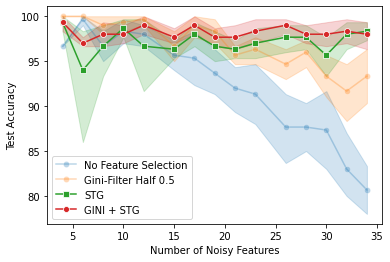

In [16]:
sns.lineplot(data=nofs_results, x="# features", y="accuracy", 
label='No Feature Selection', marker='o', alpha=0.3)
sns.lineplot(data=gini_half_results, x="# features", y="accuracy",
label='Gini-Filter Half 0.5', marker='o', alpha=0.3)
sns.lineplot(data=stg_results, x="# features", y="accuracy", 
label='STG', marker='s')
sns.lineplot(data=two_step_results, x="# features", y="accuracy",
label='GINI + STG', marker='o')
plt.xlabel('Number of Noisy Features')
plt.ylabel('Test Accuracy')
plt.show()

In [19]:
import pandas as pd
pd.DataFrame(nofs_results).to_csv('IrisMotivation/no_fs_results.csv')
pd.DataFrame(gini_half_results).to_csv('IrisMotivation/gini_half_results.csv')
pd.DataFrame(stg_results).to_csv('IrisMotivation/stg_results.csv')
pd.DataFrame(two_step_results).to_csv('IrisMotivation/two_step_results.csv')

# Convergence Speed Test

In [111]:
import ScikitWrapper as skw
import warnings
import importlib
importlib.reload(skw)
X, y = shap.datasets.iris()
accs = []
total_feature = []
warnings.simplefilter(action='ignore')
X_train, X_test, Y_train, Y_test = insert_feature_noise(X, y, 
            num_random_noise=num_normal[-1],
            num_overwhelemed=num_overwhelmed[-1], 
            num_shortcut=num_shortcut[-1])
X_train, y_train = X_train.to_numpy().astype(np.float32), Y_train.astype(np.int64)
X_test, y_test = X_test.to_numpy().astype(np.float32), Y_test.astype(np.int64)
clf = skw.ScikitClfWrapper(
        input_dim=X_train.shape[1],
        number_of_classes=3,
        hidden_dims=(16, 16), lam=0, epochs=1000, sigma=0.5,
        freeze_till=1000, lr=0.1, verbose=True,
        device='cpu')
clf.fit(X_train, Y_train)
acc = print_accuracy(clf.predict, X_test, Y_test)
total_feature = 2*num_normal[i] + num_overwhelmed[i] + num_shortcut[i]
print(f"{acc}%, {total_feature} features")

Epoch 1/1000 Loss: 1.088822841644287 num_feat: 38/38 Reg Loss: 0.0 Val Accuracy: 33.333333333333336
Epoch 2/1000 Loss: 1.0880446434020996 num_feat: 38/38 Reg Loss: 0.0 Val Accuracy: 33.333333333333336
Epoch 3/1000 Loss: 1.0865976810455322 num_feat: 38/38 Reg Loss: 0.0 Val Accuracy: 33.333333333333336
Epoch 4/1000 Loss: 1.0845359563827515 num_feat: 38/38 Reg Loss: 0.0 Val Accuracy: 33.333333333333336
Epoch 5/1000 Loss: 1.0818235874176025 num_feat: 38/38 Reg Loss: 0.0 Val Accuracy: 33.333333333333336
Epoch 6/1000 Loss: 1.078792691230774 num_feat: 38/38 Reg Loss: 0.0 Val Accuracy: 33.333333333333336
Epoch 7/1000 Loss: 1.0754834413528442 num_feat: 38/38 Reg Loss: 0.0 Val Accuracy: 33.333333333333336
Epoch 8/1000 Loss: 1.0718413591384888 num_feat: 38/38 Reg Loss: 0.0 Val Accuracy: 33.333333333333336
Epoch 9/1000 Loss: 1.0676801204681396 num_feat: 38/38 Reg Loss: 0.0 Val Accuracy: 36.111111111111114
Epoch 10/1000 Loss: 1.0628113746643066 num_feat: 38/38 Reg Loss: 0.0 Val Accuracy: 38.8888888

In [112]:
history = clf.get_history()
history.head()

,epoch,valid_acc,# feature
0,0,33.333333,38
1,1,33.333333,38
2,2,33.333333,38
3,3,33.333333,38
4,4,33.333333,38


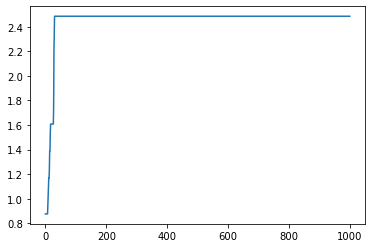

In [113]:
import matplotlib.pyplot as plt
# plt.plot(history['epoch'], history['valid_acc'], label="validation accuracy")
plt.plot(history['epoch'], history['valid_acc']/history['# feature'], 
    label="validation accuracy/# feature")

## STG

In [135]:
X, y = shap.datasets.iris()
accs = []
total_feature = []
warnings.simplefilter(action='ignore')
X_train, X_test, Y_train, Y_test = insert_feature_noise(X, y, 
            num_random_noise=num_normal[-1],
            num_overwhelemed=num_overwhelmed[-1], 
            num_shortcut=num_shortcut[-1])
X_train, y_train = X_train.to_numpy().astype(np.float32), Y_train.astype(np.int64)
X_test, y_test = X_test.to_numpy().astype(np.float32), Y_test.astype(np.int64)
clf = skw.ScikitClfWrapper(
        input_dim=X_train.shape[1],
        number_of_classes=3,
        hidden_dims=(16, 16), lam=0.1, epochs=1000, sigma=0.5,
        freeze_till=0, lr=0.1, verbose=True,
        device='cpu')
clf.fit(X_train, Y_train)
acc = print_accuracy(clf.predict, X_test, Y_test)
total_feature = 2*num_normal[i] + num_overwhelmed[i] + num_shortcut[i]
print(f"{acc}%, {total_feature} features")

Epoch 1/1000 Loss: 1.0930275917053223 num_feat: 38/38 Reg Loss: 0.08411549031734467 Val Accuracy: 27.77777777777778
Epoch 2/1000 Loss: 1.0937050580978394 num_feat: 38/38 Reg Loss: 0.0841103345155716 Val Accuracy: 27.77777777777778
Epoch 3/1000 Loss: 1.0919694900512695 num_feat: 38/38 Reg Loss: 0.08409985154867172 Val Accuracy: 27.77777777777778
Epoch 4/1000 Loss: 1.0868761539459229 num_feat: 38/38 Reg Loss: 0.0840834379196167 Val Accuracy: 27.77777777777778
Epoch 5/1000 Loss: 1.0882593393325806 num_feat: 38/38 Reg Loss: 0.08406230807304382 Val Accuracy: 27.77777777777778
Epoch 6/1000 Loss: 1.0843054056167603 num_feat: 38/38 Reg Loss: 0.08403841406106949 Val Accuracy: 27.77777777777778
Epoch 7/1000 Loss: 1.0849230289459229 num_feat: 38/38 Reg Loss: 0.08401001244783401 Val Accuracy: 27.77777777777778
Epoch 8/1000 Loss: 1.0837808847427368 num_feat: 38/38 Reg Loss: 0.08397892862558365 Val Accuracy: 27.77777777777778
Epoch 9/1000 Loss: 1.0865085124969482 num_feat: 38/38 Reg Loss: 0.08394590

In [136]:
stg_history = clf.get_history()
stg_history.head()

,epoch,valid_acc,# feature
0,0,27.777778,38
1,1,27.777778,38
2,2,27.777778,38
3,3,27.777778,38
4,4,27.777778,38


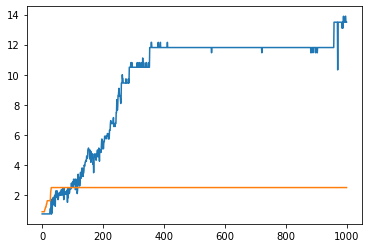

In [137]:
plt.plot(stg_history['epoch'], stg_history['valid_acc']/stg_history['# feature'], 
    label="STG")
plt.plot(history['epoch'], history['valid_acc']/history['# feature'], 
    label="No Feature Selection")

## Two Step

In [144]:
X, y = shap.datasets.iris()
accs = []
total_feature = []
warnings.simplefilter(action='ignore')
X_train, X_test, Y_train, Y_test = insert_feature_noise(X, y, 
            num_random_noise=num_normal[-1],
            num_overwhelemed=num_overwhelmed[-1], 
            num_shortcut=num_shortcut[-1])


X_train, X_test, Y_train, Y_test = gini_filter(torch.tensor(X_train.values), torch.tensor(X_test.values), 
            torch.tensor(Y_train, dtype=torch.int64), 
            torch.tensor(Y_test, dtype=torch.int64), 
            left=0.5)

X_train, X_test, Y_train, Y_test = X_train.numpy(), X_test.numpy(), Y_train.numpy(), Y_test.numpy()
X_train, Y_train = X_train.astype(np.float32), Y_train.astype(np.int64)
X_test, Y_test = X_test.astype(np.float32), Y_test.astype(np.int64)

clf = skw.ScikitClfWrapper(
        input_dim=X_train.shape[1],
        number_of_classes=3,
        hidden_dims=(16, 16), lam=0.1, epochs=1000, sigma=0.5,
        freeze_till=0, lr=0.1, verbose=True,
        device='cpu')
clf.fit(X_train, Y_train)
acc = print_accuracy(clf.predict, X_test, Y_test)
total_feature = 2*num_normal[i] + num_overwhelmed[i] + num_shortcut[i]
print(f"{acc}%, {total_feature} features")

Epoch 1/1000 Loss: 1.0924816131591797 num_feat: 19/19 Reg Loss: 0.08414222300052643 Val Accuracy: 27.77777777777778
Epoch 2/1000 Loss: 1.091377854347229 num_feat: 19/19 Reg Loss: 0.0841294601559639 Val Accuracy: 27.77777777777778
Epoch 3/1000 Loss: 1.0902191400527954 num_feat: 19/19 Reg Loss: 0.08410605043172836 Val Accuracy: 27.77777777777778
Epoch 4/1000 Loss: 1.0934693813323975 num_feat: 19/19 Reg Loss: 0.08407244086265564 Val Accuracy: 27.77777777777778
Epoch 5/1000 Loss: 1.088834524154663 num_feat: 19/19 Reg Loss: 0.0840277373790741 Val Accuracy: 27.77777777777778
Epoch 6/1000 Loss: 1.0932363271713257 num_feat: 19/19 Reg Loss: 0.08397557586431503 Val Accuracy: 27.77777777777778
Epoch 7/1000 Loss: 1.0914306640625 num_feat: 19/19 Reg Loss: 0.08391638845205307 Val Accuracy: 27.77777777777778
Epoch 8/1000 Loss: 1.0911245346069336 num_feat: 19/19 Reg Loss: 0.08385036885738373 Val Accuracy: 27.77777777777778
Epoch 9/1000 Loss: 1.0891772508621216 num_feat: 19/19 Reg Loss: 0.0837776809930

In [145]:
two_step_history = clf.get_history()
two_step_history.head()

,epoch,valid_acc,# feature
0,0,27.777778,19
1,1,27.777778,19
2,2,27.777778,19
3,3,27.777778,19
4,4,27.777778,19


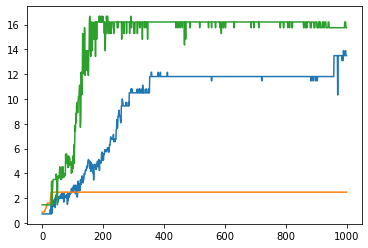

In [146]:
plt.plot(stg_history['epoch'], stg_history['valid_acc']/stg_history['# feature'], 
    label="STG")
plt.plot(history['epoch'], history['valid_acc']/history['# feature'], 
    label="No Feature Selection")
plt.plot(two_step_history['epoch'], two_step_history['valid_acc']/two_step_history['# feature'],
    label="GINI + STG")

In [170]:
stg_history = stg_history.iloc[:500, :]
two_step_history = two_step_history.iloc[:500, :]
history = history.iloc[:500, :]

In [147]:
stg_history.to_csv("STGandGINIMotivation/stg_history.csv")
history.to_csv("STGandGINIMotivation/nofs_history.csv")
two_step_history.to_csv("STGandGINIMotivation/gini_stg_history.csv")

In [171]:
def smooth(y, box_pts):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth[:-box_pts+1]
y = smooth(history['valid_acc']/history['# feature'], 8)
y_stg = smooth(stg_history['valid_acc']/stg_history['# feature'], 8)
y_two_step = smooth(two_step_history['valid_acc']/two_step_history['# feature'], 8)

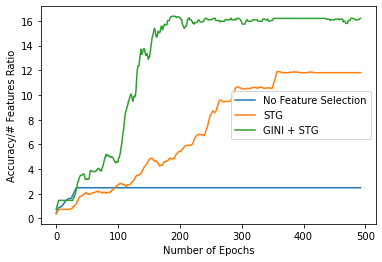

In [177]:
plt.plot(np.arange(len(y)), y, label="No Feature Selection")
plt.plot(np.arange(len(y_stg)), y_stg, label='STG')
plt.plot(np.arange(len(y_two_step)), y_two_step, label= 'GINI + STG')
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy/# Features Ratio")
plt.legend()
plt.show()
